## 1. Imports

In [1]:
import numpy as np
import pandas as pd
import regex as re

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
#content_df_raw = pd.read_pickle('content_df_features.pkl')
content_df_raw = pd.read_csv('content_df_features.csv', index_col=0)
content_df_raw.tail()

id  electoral_term  session first_name  \
966041  1075922              20      187     thomas   
966042  1075923              20      187      petra   
966043  1075924              20      187     thomas   
966044  1075925              20      187      petra   
966045  1075926              20      187   angelika   

                                             document_url last_name  \
966041  https://dip21.bundestag.de/dip21/btp/20/20187.pdf     seitz   
966042  https://dip21.bundestag.de/dip21/btp/20/20187.pdf       pau   
966043  https://dip21.bundestag.de/dip21/btp/20/20187.pdf     seitz   
966044  https://dip21.bundestag.de/dip21/btp/20/20187.pdf       pau   
966045  https://dip21.bundestag.de/dip21/btp/20/20187.pdf  glöckner   

        faction_id           position_short    position_long  politician_id  \
966041           0     Member of Parliament              NaN       11004891   
966042           7  Presidium of Parliament  Vizepräsidentin       11003206   
966043          18     Member of Parliament              NaN       11004891   
966044           7  Presidium of Parliament  Vizepräsidentin       11003206   
966045          25     Member of Parliament              NaN       11004614   

                    top_item  \
966041  Tagesordnungspunkt 6   
966042  Tagesordnungspunkt 6   
966043  Tagesordnungspunkt 6   
966044  Tagesordnungspunkt 6   
966045  Tagesordnungspunkt 6   

                                                top_title  \
966041  Antrag der Abgeordneten René Springer, Jürgen ...   
966042  Antrag der Abgeordneten René Springer, Jürgen ...   
966043  Antrag der Abgeordneten René Springer, Jürgen ...   
966044  Antrag der Abgeordneten René Springer, Jürgen ...   
966045  Antrag der Abgeordneten René Springer, Jürgen ...   

                                           speech_content        date  \
966041  Sehr geehrte Frau Präsidentin! Meine Damen und...  2024-09-25   
966042                                 Herr Abgeordneter.  2024-09-25   
966043                                       Vielen Dank.  2024-09-25   
966044  Für die SPD-Fraktion hat die Kollegin Angelika...  2024-09-25   
966045  Sehr geehrte Frau Präsidentin! Kolleginnen und...  2024-09-25   

             faction  year  speech_length   age    gender     tenure  
966041           AfD  2024           1799  57.0  männlich   6.594521  
966042    DIE LINKE.  2024             18  61.0  weiblich  25.887671  
966043  Fraktionslos  2024             12  57.0  männlich   6.594521  
966044    DIE LINKE.  2024             65  61.0  weiblich  25.887671  
966045           SPD  2024           2561  62.0  weiblich   9.780822

In [3]:
contributions_raw = pd.read_pickle('contributions_df.pkl')
contributions_raw

text_position                                            content  \
0               0                                           (Nellen)   
0               1  (Nrn. 1800, zu 1800, 3300, zu 3300 der Drucksa...   
1               0                              (Drucksache Nr. 3308)   
0               1                             (Zurufe: Wiederholen!)   
1               0                                  (Zurufe: Sofort!)   
..            ...                                                ...   
2               3   (Henning Otte [CDU/CSU]: Haben Sie auch gesagt!)   
3               2  (Beifall bei Abgeordneten der LINKEN Peter Bey...   
4               1             (Peter Beyer [CDU/CSU]: Ja, wie denn?)   
5               0  (Beifall bei Abgeordneten der LINKEN Peter Bey...   
0               0  (Beifall bei der CDU/CSU sowie bei Abgeordnete...   

    speech_id  
0           1  
0           2  
1           2  
0           4  
1           4  
..        ...  
2      846682  
3      846682  
4      846682  
5      846682  
0      846684  

[1966165 rows x 3 columns]

In [166]:
contributions_extended_raw = pd.read_csv('contributions_extended.csv', index_col=0)
contributions_extended_raw.head()

contributions_extended_raw.shape


(2864765, 9)

In [5]:
politicians_raw = pd.read_pickle('politicians_df.pkl')
politicians_raw.head()

ui  electoral_term  faction_id first_name last_name birth_place  \
0  11000001               5           5    manfred   abelein   Stuttgart   
1  11000001               6           5    manfred   abelein   Stuttgart   
2  11000001               7           5    manfred   abelein   Stuttgart   
3  11000001               8           5    manfred   abelein   Stuttgart   
4  11000001               9           5    manfred   abelein   Stuttgart   

  birth_country  birth_date  death_date    gender  \
0   Deutschland  20.10.1930  17.01.2008  männlich   
1   Deutschland  20.10.1930  17.01.2008  männlich   
2   Deutschland  20.10.1930  17.01.2008  männlich   
3   Deutschland  20.10.1930  17.01.2008  männlich   
4   Deutschland  20.10.1930  17.01.2008  männlich   

                                          profession constituency aristocracy  \
0  Rechtsanwalt, Wirtschaftsprüfer, Universitätsp...          NaN         NaN   
1  Rechtsanwalt, Wirtschaftsprüfer, Universitätsp...          NaN         NaN   
2  Rechtsanwalt, Wirtschaftsprüfer, Universitätsp...          NaN         NaN   
3  Rechtsanwalt, Wirtschaftsprüfer, Universitätsp...          NaN         NaN   
4  Rechtsanwalt, Wirtschaftsprüfer, Universitätsp...          NaN         NaN   

  academic_title institution_type  \
0      Prof. Dr.  Fraktion/Gruppe   
1      Prof. Dr.  Fraktion/Gruppe   
2      Prof. Dr.  Fraktion/Gruppe   
3      Prof. Dr.  Fraktion/Gruppe   
4      Prof. Dr.  Fraktion/Gruppe   

                                    institution_name  
0  Fraktion der Christlich Demokratischen Union/C...  
1  Fraktion der Christlich Demokratischen Union/C...  
2  Fraktion der Christlich Demokratischen Union/C...  
3  Fraktion der Christlich Demokratischen Union/C...  
4  Fraktion der Christlich Demokratischen Union/C...

In [6]:
factions_raw = pd.read_pickle('03_final/factions.pkl')
factions_raw.head()

id           abbreviation                          faction_name
0   0                    AfD  Fraktion Alternative für Deutschland
1   2                     BP                 Fraktion Bayernpartei
2   4  Bündnis 90/Die Grünen        Fraktion BÜNDNIS 90/DIE GRÜNEN
3   7             DIE LINKE.                   Fraktion DIE LINKE.
4   9                 DP/DPB                Fraktion DP/DPB (Gast)

In [7]:
cities_raw = pd.read_excel('German_cities.xlsx', )
cities_raw.head()

Stadt
0             Berlin
1            Hamburg
2            München
3               Köln
4  Frankfurt am Main

## 2. Categorization of Structure

This section categorizes the content of German parliamentary speeches and agenda points into structured categories based on keywords. The categorization process enables focused analysis by grouping similar agenda items and topics, allowing for easier identification of patterns in debates, statements, and procedural items.

### 2.1 Cateogization based on Agenda Poinnts

In [8]:
'''# download all unique top_title to examine in excel
unique_top_title = content_df['top_title'].unique()
unique_top_title = pd.DataFrame(unique_top_title)
unique_top_title.to_excel('03_final/unique_top_title.xlsx')
# get all unique top_title'''

"# download all unique top_title to examine in excel\nunique_top_title = content_df['top_title'].unique()\nunique_top_title = pd.DataFrame(unique_top_title)\nunique_top_title.to_excel('03_final/unique_top_title.xlsx')\n# get all unique top_title"

Prepare data to easy processing

In [9]:
#filter for electoral terms 18, 29, 20
content_subset = content_df_raw[content_df_raw['electoral_term'].isin([17, 18, 19, 20])]
content_subset

# change all nan values to ''
content_subset = content_subset.fillna('')
content_subset['date'] = pd.to_datetime(content_subset['date'])

In [10]:
# Show all lines where top_title is not classified
len(content_subset[content_subset['top_title'] == ''])

27374

Altohugh, there are still some undefined agenda points, we will continue the analysis and later fill them with "Other"

The categorization here uses predefined dictionaries to classify agenda points based on keywords in the top_title field. Each unique agenda item (or top_title) is matched to a category, such as "Organizational," "Debate," or "Government Statement." The function classify_top_title first checks for matches in the primary dictionary (keyword_categories) and then searches a secondary dictionary (keyword_categories_2) if no match is found. If no keyword is matched, it defaults to "Other." Agenda items are classified into broader main_category values based on the sub_category from the previous step. This higher-level categorization organizes data into overarching types like "Debate," "Statement," or "Questioning," which helps streamline the structural analysis.

In [11]:
# Dictionary to categorize texts based on keywords
keyword_categories = {
    "Wahl": "Organizational",
    "Festlegung": "Organizational",
    "Beschlussfassung": "Organizational",
    "Amtsübernahme": "Organizational",
    "Eidesleistung": "Organizational",
    "Ausschussüberweisung": "Organizational",

    "Regierungserklärung": "Government Statement",
    "Abgabe einer Erklärung": "Statement",
    "Erklärung durch den Bundeskanzler": "Statement",
    "Erklärung durch die Bundeskanzlerin": "Statement",
    "Unterrichtung durch die Bundesregierung": "Government Briefing",
    "Unterrichtung durch die Bundesregie-rung": "Government Briefing",
    "Erklärung nach § 31 GO": "Statement under § 31 Rules",
    "Erklärungen nach § 31 GO": "Statement under § 31 Rules",

    "Aktuelle Stunde": "Aktuelle Stunde",
    "Debatte": "Debate",
    "Große Anfrage": "Major Inquiry",

    "Befragung": "Questioning",
    "Fragestunde": "Questioning",

    "Beschlussempfehlung": "Recommendation for Resolution",

    "Bericht des Petitionsausschusses": "Report",
    "Bericht des Rechtsausschusses": "Report",
}

keyword_categories_2 = {
    "Bericht": "Report",
    "Antrag": "Request",
    "Beratung": "Debate",
    "Unterrichtung durch": "Briefing",
}


# Function to classify based on primary and secondary categories
def classify_top_title(text):
    # Limit to the first 100 characters
    text_snippet = text[:100].lower()
    
    # First attempt to classify with primary keyword categories
    for keyword, category in keyword_categories.items():
        if keyword.lower() in text_snippet:
            return category
    
    # If no match is found, attempt to classify with secondary keyword categories
    for keyword, category in keyword_categories_2.items():
        if keyword.lower() in text_snippet:
            return category

    # Default if no keywords are matched
    return "Other"

# Apply classification to the 'top_title' column
content_subset['sub_category'] = content_subset['top_title'].apply(classify_top_title)

Download data as Excel to cross-check

In [12]:
'''#download excel with unique top title and category other
content_subset_other = content_subset[content_subset['sub_category']=="Other"]
# filter for unique top_title
content_subset_other = content_subset_other.drop_duplicates(subset=['top_title'])
content_subset_other.to_excel('content_subset_other.xlsx')'''

'#download excel with unique top title and category other\ncontent_subset_other = content_subset[content_subset[\'sub_category\']=="Other"]\n# filter for unique top_title\ncontent_subset_other = content_subset_other.drop_duplicates(subset=[\'top_title\'])\ncontent_subset_other.to_excel(\'content_subset_other.xlsx\')'

In [13]:
# classify the sub_category into main_category
main_categories = {
    "Organizational": "Organizational",
    "Government Statement": "Statement",
    "Statement": "Statement",
    "Government Briefing": "Debate",
    "Statement under § 31 Rules": "Debate",
    "Aktuelle Stunde": "Debate",
    "Debate": "Debate",
    "Major Inquiry": "Debate",
    "Questioning": "Questioning",
    "Recommendation for Resolution": "Debate",
    "Report": "Debate",
    "Request": "Debate",
    "Debate": "Debate",
    "Briefing": "Debate",
    "Other": "Other",
}

# Function to classify based on primary and secondary categories
def classify_main_category(text):
    return main_categories[text]

# Apply classification to the 'sub_category' column
content_subset['main_category'] = content_subset['sub_category'].apply(classify_main_category)

In [14]:
# count main categories
content_subset['main_category'].value_counts()


Debate            138990
Questioning        47326
Other              37492
Organizational      6704
Statement           6558
Name: main_category, dtype: int64

Download a sample to verify

In [15]:
# get a sample of 10 complete sessions to verify
'''content_subset['session'].unique()
content_subset['session'].value_counts()
sample_sessions = content_subset['session'].sample(10, random_state=42)
sample_sessions

# download sample sessions
content_df_sample = content_subset[content_subset['session'].isin(sample_sessions)]
content_df_sample.to_excel('content_df_sample.xlsx')
'''

"content_subset['session'].unique()\ncontent_subset['session'].value_counts()\nsample_sessions = content_subset['session'].sample(10, random_state=42)\nsample_sessions\n\n# download sample sessions\ncontent_df_sample = content_subset[content_subset['session'].isin(sample_sessions)]\ncontent_df_sample.to_excel('content_df_sample.xlsx')\n"

### 2.2 Categorization based on content

This section categorizes content in the debates by analyzing text within each speech. Rather than focusing solely on agenda points (titles or predefined topics), this approach uses keyword matching to determine the type of content based on the speech content itself. By doing so, the classification is rooted in the actual discourse, making it more adaptable to capture diverse forms of interactions within parliamentary speeches. The logic has been developed by manually analyzing data and trying uot different approaches

#### 2.2.1 Keyword-based content classification

The extract_content_category function classifies speeches by looking for specific keywords related to categories like "Debate," "Questioning," or "Organizational." This approach involves scanning the speech content for words that indicate the type of interaction, such as phrases for introductions, statements, or questions.

In [16]:
new_tagesorgnungspunkt_length_threshold = 250


# Identify first entries in each session
first_entries = content_subset.groupby(['electoral_term', 'session']).head(1).index

# Create a new_tagesordnungspunkt column with different length conditions for first and other entries
content_subset['new_tagesordnungspunkt'] = (
    content_subset.index.isin(first_entries) |  # True for first entry of each session
    (
        (content_subset['position_short'] == 'Presidium of Parliament') &
        content_subset['speech_content'].str.contains(r'Tagesordnungspunkt|Zusatzpunkt|Tagesordnung|Tages- ordnungspunkt|Tagesord- nungspunkt') &
        (content_subset['speech_length'] > new_tagesorgnungspunkt_length_threshold)
    )
)

# Create a dictionary with types of Tagesordnungspunkt
tagesordnungspunkte_keywords = {
    "Statement": ["Regierungserklärung", "Erklärung der Bundesregierung"],
    "Questioning": ["Befragung der Bundesregierung", "Regierungsbefragung","Fragestunde", 
                    "Fragen an die Regierung", "Fragerunde", "Beantwortung", "Frage zu dem Themenbereich", 
                    "Fragen zu dem Themenbereich", "Nächste Frage", "nächste Frage", "Fragen zum Thema", 
                    "Fragen zum Thema", "Fragen zu dem Bericht"],
    "Debate": ["Debatte", "Aussprache", "Beratung", "debattieren", "Aussprache.", "Redeliste", 
               "Redner", "Rednerin", "Redebeitrag", "Rede", "Aktuelle Stunde", "Aktuellen Stunde", 
               "persönliche Erklärung", "Persönliche Erklärung", "Unterrichtung durch die Bundesregierung", 
               "Bericht der Bundesregierung", "Regierungsbericht"],
    "Organizational": ["Wahl des Präsidenten", "Wahl des Vizepräsidenten", "Wahl des Schriftführers", 
                       "Wahl des Stellvertretenden Schriftführers", "Wahl des Alterspräsidenten", 
                       "Wahl der Bundneskanzlerin", "Wahl de Bundeskanzlers", "Wahl eines Stellvertreters", 
                       "Wahl des Stellvertreters", "Wahl der Vizepräsidenten", "Wahl eines Vizepräsidenten", 
                       "Amtseinführung", "Vereidigung", "Amtsübernahme", "Übernahme des Amtes", "Eid", 
                       "Eidesleistung", "Geschäftsordnung", "Geschäftsordnungsdebatte", "Geschäftsordnungsantrag", 
                       "Geschäftsordnungsanträge", "Geschäftsordnungsanträgen"]
}

# Function to extract the type of Tagesordnungspunkt
def extract_content_category(row):
    latest_type = np.nan  # Initialize with NaN
    latest_position = -1  # Initialize to track the position

    if row['new_tagesordnungspunkt']:
        latest_type = 'Other'  # Set default to 'Other' if new_tagesordnungspunkt is True
        speech_content = row['speech_content']

        # Iterate over the dictionary of types and keywords
        for content_category, keywords in tagesordnungspunkte_keywords.items():
            for keyword in keywords:
                # Use regex to find the keyword, ignoring punctuation and case sensitivity
                pattern = r'\b' + re.escape(keyword) + r'[\b.,;:!?]*'
                matches = list(re.finditer(pattern, speech_content, re.IGNORECASE))  # Find all matches

                # If there are matches, update the latest position
                if matches:
                    last_match = matches[-1]  # Get the last occurrence of the match
                    position = last_match.start()  # Get the start position of the last match
                    if position > latest_position:  # Update only if the current position is later
                        latest_position = position
                        latest_type = content_category  # Store the latest type

    return latest_type

# Apply the function to the DataFrame
content_subset['content_category'] = content_subset.apply(extract_content_category, axis=1)


# Define keywords for detecting end of Regierungsbefragung
# Define regex patterns for detecting end of Regierungsbefragung, allowing punctuation after the phrase
end_regierungsbefragung_patterns = [
    # Original end patterns
    r"(?i)\bEnde\s*der\s*Regierungsbefragung\b[\s.,;:!?]*",
    r"(?i)\bIch\s*beende\s*die\s*Regierungsbefragung\b[\s.,;:!?]*",
    r"(?i)\bIch\s*schließe\s*die\s*Regierungsbefragung\b[\s.,;:!?]*",
    r"(?i)\bBefragung\s*der\s*Bundesregierung\s*ist\s*beendet\b[\s.,;:!?]*",
    r"(?i)\bIch\s*beende\s*die\s*Befragung\s*der\s*Bundesregierung\b[\s.,;:!?]*",
    r"(?i)\bDie\s*Regierungsbefragung\s*ist\s*nun\s*beendet\b[\s.,;:!?]*",
    r"(?i)\bDie\s*Fragestunde\s*ist\s*nun\s*beendet\b[\s.,;:!?]*",
    r"(?i)\bIch\s*erkläre\s*die\s*Fragestunde\s*für\s*beendet\b[\s.,;:!?]*",
    r"(?i)\bIch\s*beende\s*die\s*Befragung\b[\s.,;:!?]*",


    # Specific patterns for next speaker announcements
    r"(?i)\bNächster\s*Redner\b[\s:.,;!?-]*",
    r"(?i)\bNächste\s*Rednerin\b[\s:.,;!?-]*",

    # Additional transition patterns
    r"(?i)\bIch\s*eröffne\s*die\s*Debatte\b[\s.,;:!?]*",
    r"(?i)\bDer\s*nächste\s*Tagesordnungspunkt\b[\s.,;:!?]*",
    r"(?i)\bDas\s*Wort\s*zu\s*einer\s*Kurzintervention\b[\s.,;:!?]*",
]

begin_regierungsbefragung_patterns = [
    r"(?i)\bIch\s*eröffne\s*die\s*Regierungsbefragung\b[\s.,;:!?]*",
    r"(?i)\bBeginne\s*die\s*Regierungsbefragung\b[\s.,;:!?]*",
    r"(?i)\bWir\s*beginnen\s*die\s*Regierungsbefragung\b[\s.,;:!?]*",
    r"(?i)\bEröffnung\s*der\s*Regierungsbefragung\b[\s.,;:!?]*",
    r"(?i)\bIch\s*eröffne\s*die\s*Befragung\s*der\s*Bundesregierung\b[\s.,;:!?]*",
    r"(?i)\bBeginne\s*die\s*Befragung\s*der\s*Bundesregierung\b[\s.,;:!?]*",
    r"(?i)\bWir\s*beginnen\s*die\s*Befragung\s*des\s*Bundeskanzlers\b[\s.,;:!?]*",
    r"(?i)\bWir\s*beginnen\s*die\s*Befragung\s*der\s*Bundeskanzlerin\b[\s.,;:!?]*",
    r"(?i)\bBefragung\s*beginnen\b[\s.,;:!?]*",
]

# Function to reclassify "Debatte" after extract_content_category
def reclassify_regierungsbefragung(df):
    for i in range(1, len(df)):  # Start from 1 to have a previous row to check
        # 1. Check for End of Regierungsbefragung to reclassify as "Debatte"
        if (
            df.iloc[i - 1]['content_category'] == 'Questioning' and
            df.iloc[i]['position_short'] == 'Presidium of Parliament'
        ):
            if any(re.search(pattern, df.iloc[i]['speech_content']) for pattern in end_regierungsbefragung_patterns):
                df.at[df.index[i], 'content_category'] = 'Debate'
        
        # 2. Check for Beginning of Regierungsbefragung to classify as "Regierungsbefragung"
        elif (
            df.iloc[i]['position_short'] == 'Presidium of Parliament' and
            any(re.search(pattern, df.iloc[i]['speech_content']) for pattern in begin_regierungsbefragung_patterns)
        ):
            df.at[df.index[i], 'content_category'] = 'Questioning'
    
    return df

# Apply the function to reclassify rows as "Debatte" if the conditions are met
content_subset = reclassify_regierungsbefragung(content_subset)



# Function to mark the last as "Sitzungsende"
def assign_sitzungsanfang_und_ende(df):
    # Group by electoral term and session to identify the first and last rows in each session
    last_entries = df.groupby(['electoral_term', 'session']).tail(1).index

    # Mark the last entry in each session as "Sitzungsende" regardless of its current type
    df.loc[last_entries, 'content_category'] = 'Sitzungsende'
    
    return df

# Apply the function to mark the first and last rows
content_subset = assign_sitzungsanfang_und_ende(content_subset)

#### 2.2.2 Re-classification of questioning

Following the initial content classification, reclassification rules are applied to differentiate between questioning and debating segments. The reclassify_regierungsbefragung function adjusts entries initially labeled as "Questioning" based on the position of the previous row and specific patterns (like the end of a question session). This ensures that discourse structures unique to questioning are accurately captured.

In [17]:
# Function to reclassify "Debatte" after extract_content_category
def reclassify_regierungsbefragung(df):
    for i in range(1, len(df)):  # Start from 1 to have a previous row to check
        # 1. Check for End of Regierungsbefragung to reclassify as "Debatte"
        if (
            df.iloc[i - 1]['content_category'] == 'Questioning' and
            df.iloc[i]['position_short'] == 'Presidium of Parliament'
        ):
            # Ensure speech_content is a string before applying regex
            if isinstance(df.iloc[i]['speech_content'], str):
                if any(re.search(pattern, df.iloc[i]['speech_content']) for pattern in end_regierungsbefragung_patterns):
                    df.at[df.index[i], 'content_category'] = 'Debate'
        
        # 2. Check for Beginning of Regierungsbefragung to classify as "Regierungsbefragung"
        elif (
            df.iloc[i]['position_short'] == 'Presidium of Parliament' and
            isinstance(df.iloc[i]['speech_content'], str) and
            any(re.search(pattern, df.iloc[i]['speech_content']) for pattern in begin_regierungsbefragung_patterns)
        ):
            df.at[df.index[i], 'content_category'] = 'Questioning'
    
    return df

# Apply the function to reclassify rows as "Debatte" if the conditions are met
content_subset = reclassify_regierungsbefragung(content_subset)


#### 2.2.3 Final Adjustments

Assigning "Sitzungsende" and Forward-Filling Categories

To ensure data continuity, the final entry in each session is labeled "Sitzungsende," marking it as the session’s conclusion. This step, along with forward-filling, addresses any gaps in categorization caused by sequential changes or undefined categories.

In [18]:
# Shift the speech_content column to get the next row's content for comparison
content_subset['next_speech_content'] = content_subset['speech_content'].shift(-1)

# Function to classify "Other" entries based on the next row's content
def classify_other(row):
    if (
        row['new_tagesordnungspunkt'] and
        row['position_short'] != 'Presidium of Parliament' and
        row['content_category'] == 'Other'
    ):
        if pd.notna(row['next_speech_content']):
            # Check for "Frage" in the next row's speech content
            if 'Frage' in row['next_speech_content']:
                return 'Questioning'
            # Check for "Rede", "Redner", or "Rednerin" in the next row's speech content
            elif any(word in row['next_speech_content'] for word in ['Rede', 'Redner', 'Rednerin']):
                return 'Debate'
    # Return the existing type if no conditions are met
    return row['content_category']

# Apply the function to the DataFrame
content_subset['content_category'] = content_subset.apply(classify_other, axis=1)

# Drop the auxiliary next_speech_content column
content_subset = content_subset.drop(columns=['next_speech_content'])

In [19]:
# Changes all content_category "Sitzungsende" with the content_category before
content_subset['content_category'] = content_subset['content_category'].replace('Sitzungsende', np.nan)
 
# Fill missing entries with the previous value
content_subset['content_category'] = content_subset['content_category'].ffill()

# delete all unneccessary columns
content_subset.head()

id  electoral_term  session first_name  \
728976  729470              17        1      heinz   
728977  729471              17        1     volker   
728978  729472              17        1      heinz   
728979  729473              17        1      heinz   
728980  729474              17        1    norbert   

                                             document_url    last_name  \
728976  https://dip21.bundestag.de/dip21/btp/17/17001.pdf  riesenhuber   
728977  https://dip21.bundestag.de/dip21/btp/17/17001.pdf       kauder   
728978  https://dip21.bundestag.de/dip21/btp/17/17001.pdf  riesenhuber   
728979  https://dip21.bundestag.de/dip21/btp/17/17001.pdf  riesenhuber   
728980  https://dip21.bundestag.de/dip21/btp/17/17001.pdf      lammert   

        faction_id           position_short    position_long  politician_id  \
728976           5  Presidium of Parliament  alterspräsident       11001849   
728977           5     Member of Parliament                        11001074   
728978           5  Presidium of Parliament  alterspräsident       11001849   
728979           5  Presidium of Parliament  alterspräsident       11001849   
728980           5     Member of Parliament                        11001274   

        ...  faction  year speech_length   age    gender     tenure  \
728976  ...  CDU/CSU  2009         19875  74.0  männlich  32.391781   
728977  ...  CDU/CSU  2009           105  60.0  männlich  18.616438   
728978  ...  CDU/CSU  2009          4235  74.0  männlich  32.391781   
728979  ...  CDU/CSU  2009           760  74.0  männlich  32.391781   
728980  ...  CDU/CSU  2009            44  60.0  männlich  28.627397   

          sub_category   main_category new_tagesordnungspunkt  \
728976           Other           Other                   True   
728977  Organizational  Organizational                  False   
728978  Organizational  Organizational                  False   
728979  Organizational  Organizational                  False   
728980  Organizational  Organizational                  False   

        content_category  
728976    Organizational  
728977    Organizational  
728978    Organizational  
728979    Organizational  
728980    Organizational  

[5 rows x 24 columns]

## 3. Classification of Single Entries

This section classifies entries within debates, differentiating between various forms of contributions like speeches, short interventions, and procedural guidance. This classification provides more detailed insights into the structure of debates, allowing for an analysis of speaking patterns, interruptions, and interactions between speakers.

### 3.1 Classification of Debate Items

This part identifies and classifies specific debate elements such as speeches, short interventions, and procedural guidance within the debate sessions. Key steps include filtering for debate sessions, marking transitions (e.g., session openings), and detecting speech intros, short interventions, and conclusions based on predefined keywords.

In [20]:
# Step 1: Filter for relevant sessions
debate_content_subset = content_subset[(content_subset['main_category'] == 'Debate') | (content_subset['main_category'] == 'Other')]

# Step 2: Create columns for previous and next speaker positions
debate_content_subset['previous_position'] = debate_content_subset['position_short'].shift()
debate_content_subset['next_position'] = debate_content_subset['position_short'].shift(-1)

# Step 3: Mark the opening of each session
debate_content_subset['opening'] = debate_content_subset['session'] != debate_content_subset['session'].shift(1)

# Step 4: Define lists for identifying speech intros, short interventions, beginnings, and endings
guidance_before_speech = ['das Wort', 'Das Wort', 'spricht', 'Sprecherin', 'Sprecher', 'Redner', 'Rednerin', 'das Wort', 'Rede ']
guidance_before_short_intervention = ['Kurzintervention', 'Kurzinterventionen']
speech_beginnings = [
    'Ich danke Ihnen', 'Damen und Herren', 'Präsident', 'Präsidentin',
    'Sehr geehrte Damen und Herren', 'Sehr geehrter Herr Präsident',
    'Sehr geehrte Frau Präsidentin', 'Meine Damen und Herren', 'Guten Morgen', 'Kollegen', 'Kolleginnen'
]
speech_ending_phrases = ['Dank']

# Step 5: Identify speech intros and short interventions
debate_content_subset['speech_intro'] = (
    debate_content_subset['speech_content'].apply(lambda x: any(word in x for word in guidance_before_speech)) 
    & (debate_content_subset['position_short'] == 'Presidium of Parliament')
)
debate_content_subset['row_before_speech_intro'] = debate_content_subset['speech_intro'].shift(1)

debate_content_subset['short_intervention_intro'] = (
    debate_content_subset['speech_content'].apply(lambda x: any(word in x for word in guidance_before_short_intervention)) 
    & (debate_content_subset['position_short'] == 'Presidium of Parliament')
    & (debate_content_subset['speech_length'] < 200)
    & (~debate_content_subset['speech_content'].str.contains(r'\?'))
)
debate_content_subset['row_before_short_intervention_intro'] = debate_content_subset['short_intervention_intro'].shift(1)

# Step 6: Detect the beginning and end of speeches
debate_content_subset['speech_beginning'] = (
    debate_content_subset['speech_content'].apply(lambda x: any(word in x for word in speech_beginnings))
    & (debate_content_subset['position_short'] != 'Presidium of Parliament')
)
debate_content_subset['speech_ending'] = (
    debate_content_subset['speech_content'].apply(lambda x: any(word in x for word in speech_ending_phrases))
    & (debate_content_subset['position_short'] != 'Presidium of Parliament')
)

# Step 7: Classify each row as "Speech" or "Short Intervention"
def classify_entry(row):
    short_intervention_conditions = [
        row['speech_length'] > 200,
        row['row_before_short_intervention_intro']
    ]
    speech_conditions = [
        row['speech_length'] > 2500,
        row['speech_beginning'],
        row['row_before_speech_intro'],
        row['next_position'] == 'Presidium of Parliament'
    ]
    
    if sum(short_intervention_conditions) >= 2:
        return "Short Intervention"
    elif sum(speech_conditions) >= 3:
        return "Speech"
    elif row['speech_length'] > 3500 and isinstance(row['position_short'], str) and 'Presidium of Parliament' not in row['position_short']:
        return "Speech"
    else:
        return ""

debate_content_subset['entry_classification_0'] = debate_content_subset.apply(classify_entry, axis=1)

# Step 8: Initialize a column for "Speech Beginning" and a variable to track the last politician who spoke
debate_content_subset['Speech_Beginning_Final'] = False

# Initialize a variable to keep track of the last speaker with a "Speech" classification
last_speaker_id = None

# Iterate over the DataFrame rows to mark "Speech Beginning" based on the last different "Speech" speaker
for index, row in debate_content_subset.iterrows():
    if row['entry_classification_0'] == 'Speech':  # Only consider rows classified as "Speech"
        if row['politician_id'] != last_speaker_id:  # Check if the current speaker is different from the last speaker with a "Speech" classification
            debate_content_subset.at[index, 'Speech_Beginning_Final'] = True  # Mark as "Speech Beginning"
            last_speaker_id = row['politician_id']  # Update the last speaker to the current politician_id

# Step 9: Create "speech_politician" and "speech_politician_faction" columns based on "Speech_Beginning_Final"
# Forward-fill based on "Speech Beginning" being True
debate_content_subset['speech_politician'] = debate_content_subset['politician_id'].where(debate_content_subset['Speech_Beginning_Final']).ffill()
debate_content_subset['speech_politician_faction'] = debate_content_subset['faction'].where(debate_content_subset['Speech_Beginning_Final']).ffill()

# Step 10: Finalize entry classification with various categories using "Speech_Beginning_Final" instead of "Speech_Beginning"
def classify_final_entry(row):
    if row['short_intervention_intro']:
        return "Short Intervention Intro"
    elif row['speech_intro']:
        return "Speech Intro"
    elif row['speech_length'] > 200 and row['row_before_short_intervention_intro']:
        return "Short Intervention"
    elif row['Speech_Beginning_Final']:
        return "Speech Beginning"
    elif row['position_short'] == 'Presidium of Parliament':
        return "Guidance"
    elif row['politician_id'] == row['speech_politician']:
        return "Speech Contribution or Answer"
    elif row['politician_id'] != row['speech_politician']:
        return "Question or Comment"
    else:
        return "Other"

debate_content_subset['entry_classification'] = debate_content_subset.apply(classify_final_entry, axis=1)


debate_content_subset.tail()

id  electoral_term  session first_name  \
966041  1075922              20      187     thomas   
966042  1075923              20      187      petra   
966043  1075924              20      187     thomas   
966044  1075925              20      187      petra   
966045  1075926              20      187   angelika   

                                             document_url last_name  \
966041  https://dip21.bundestag.de/dip21/btp/20/20187.pdf     seitz   
966042  https://dip21.bundestag.de/dip21/btp/20/20187.pdf       pau   
966043  https://dip21.bundestag.de/dip21/btp/20/20187.pdf     seitz   
966044  https://dip21.bundestag.de/dip21/btp/20/20187.pdf       pau   
966045  https://dip21.bundestag.de/dip21/btp/20/20187.pdf  glöckner   

        faction_id           position_short    position_long  politician_id  \
966041           0     Member of Parliament                        11004891   
966042           7  Presidium of Parliament  Vizepräsidentin       11003206   
966043          18     Member of Parliament                        11004891   
966044           7  Presidium of Parliament  Vizepräsidentin       11003206   
966045          25     Member of Parliament                        11004614   

        ... row_before_speech_intro short_intervention_intro  \
966041  ...                    True                    False   
966042  ...                   False                    False   
966043  ...                   False                    False   
966044  ...                   False                    False   
966045  ...                    True                    False   

       row_before_short_intervention_intro speech_beginning speech_ending  \
966041                               False             True         False   
966042                               False            False         False   
966043                               False            False          True   
966044                               False            False         False   
966045                               False             True          True   

        entry_classification_0  Speech_Beginning_Final speech_politician  \
966041                  Speech                    True        11004891.0   
966042                                           False        11004891.0   
966043                                           False        11004891.0   
966044                                           False        11004891.0   
966045                  Speech                    True        11004614.0   

       speech_politician_faction           entry_classification  
966041                       AfD               Speech Beginning  
966042                       AfD                       Guidance  
966043                       AfD  Speech Contribution or Answer  
966044                       AfD                   Speech Intro  
966045                       SPD               Speech Beginning  

[5 rows x 38 columns]

In [21]:
# download debate_content_subset as excel
#debate_content_subset.to_excel('debate_content_subset.xlsx')

### 3.2 Classification of Questioning

This segment categorizes interactions that involve questioning, marking exchanges between the parliament and government. Such classification further differentiates regular speeches from direct questions or interventions, allowing insights into parliamentary questioning behavior.

In [22]:
# Step 1: Filter for Questioning sessions
questioning_content_subset = content_subset[content_subset['main_category'] == 'Questioning'].copy()

# Step 2: Define the default classification for presidium
questioning_content_subset['entry_classification'] = questioning_content_subset.apply(
    lambda row: "Guidance" if row['position_short'] == 'Presidium of Parliament' else "", axis=1)

# Step 3: Calculate total speech lengths by speaker within each session and electoral term
# Group to get total lengths per speaker in each session and electoral term
speaker_total_lengths = questioning_content_subset.groupby(['session', 'electoral_term', 'politician_id'])['speech_length'].sum().reset_index()

# Merge total lengths back while preserving the original order using merge with 'left' join
questioning_content_subset = questioning_content_subset.merge(
    speaker_total_lengths,
    on=['session', 'electoral_term', 'politician_id'],
    how='left',
    suffixes=('', '_total')
)

# Step 4: Classify as "Response" for the speaker with the highest total speech length in each session and electoral term, 
# or for those over 5000 characters, only if they are not "Guidance"
# Get the maximum speaker length for each session and electoral term
max_speaker_per_session = speaker_total_lengths.loc[speaker_total_lengths.groupby(['session', 'electoral_term'])['speech_length'].idxmax()]

# Apply "Response" classification without changing the order, but only if the current classification is not "Guidance"
questioning_content_subset['entry_classification'] = questioning_content_subset.apply(
    lambda row: "Response" if (row['entry_classification'] != "Guidance" 
                               and ((row['politician_id'] in max_speaker_per_session['politician_id'].values) 
                                    or isinstance(row['position_long'], str) and 'minister' in row['position_long']))                            
                            else row['entry_classification'],
    axis=1
)

# Step 5: Default any remaining empty classifications to "Question or Comment"
questioning_content_subset['entry_classification'] = questioning_content_subset['entry_classification'].replace("", "Question or Comment")

questioning_content_subset.head()

id  electoral_term  session   first_name  \
0  729931              17        6  franz josef   
1  729932              17        6        petra   
2  729933              17        6       roland   
3  729934              17        6  franz josef   
4  729935              17        6        petra   

                                        document_url last_name  faction_id  \
0  https://dip21.bundestag.de/dip21/btp/17/17006.pdf      jung           5   
1  https://dip21.bundestag.de/dip21/btp/17/17006.pdf       pau           7   
2  https://dip21.bundestag.de/dip21/btp/17/17006.pdf     claus           7   
3  https://dip21.bundestag.de/dip21/btp/17/17006.pdf      jung           5   
4  https://dip21.bundestag.de/dip21/btp/17/17006.pdf       pau           7   

            position_short                           position_long  \
0                 Minister  bundesminister für arbeit und soziales   
1  Presidium of Parliament                         vizepräsidentin   
2     Member of Parliament                                           
3                 Minister  bundesminister für arbeit und soziales   
4  Presidium of Parliament                         vizepräsidentin   

   politician_id  ... speech_length   age    gender     tenure sub_category  \
0       11003781  ...          3148  60.0  männlich   4.010959  Questioning   
1       11003206  ...            88  46.0  weiblich  11.043836  Questioning   
2       11003065  ...           633  54.0  männlich  11.090411  Questioning   
3       11003781  ...          1244  60.0  männlich   4.010959  Questioning   
4       11003206  ...            48  46.0  weiblich  11.043836  Questioning   

   main_category  new_tagesordnungspunkt content_category  \
0    Questioning                   False      Questioning   
1    Questioning                   False      Questioning   
2    Questioning                   False      Questioning   
3    Questioning                   False      Questioning   
4    Questioning                   False      Questioning   

  entry_classification  speech_length_total  
0             Response                16658  
1             Guidance                13019  
2  Question or Comment                  633  
3             Response                16658  
4             Guidance                13019  

[5 rows x 26 columns]

### 3.3 Merge DFs

Merge the classification of questionings and debates back to the originanl content subset dataframe wo obtain one complete dataframe. Fill all unclassified entries as other

In [23]:
# Ensure each subset only contains the columns needed for the merge (id and Classification)
questioning_classification = questioning_content_subset[['id', 'entry_classification']]
debate_classification = debate_content_subset[['id', 'entry_classification', 'speech_politician', 'speech_politician_faction']]

# Concatenate the classification data from both subsets
combined_classification = pd.concat([questioning_classification, debate_classification])

# Merge the classifications back into the original content_subset on the 'id' column
content_subset_with_classification = content_subset.merge(
    combined_classification,
    on='id',
    how='left',
    suffixes=('', '_new')
)

# Display or analyze the resulting DataFrame with the added Classification column
content_subset_with_classification

# fill all nans in Classification with "Other"
content_subset_with_classification['entry_classification'] = content_subset_with_classification['entry_classification'].fillna('Other')

# rename speech beginning and speech contribution to speech
content_subset_with_classification['entry_classification'] = content_subset_with_classification['entry_classification'].replace('Speech Beginning', 'Speech')
content_subset_with_classification['entry_classification'] = content_subset_with_classification['entry_classification'].replace('Speech Contribution or Answer', 'Speech')

# rename short intervention intro to short intervention
content_subset_with_classification['entry_classification'] = content_subset_with_classification['entry_classification'].replace('Short Intervention Intro', 'Short Intervention')

# rename speech intro to Guidance
content_subset_with_classification['entry_classification'] = content_subset_with_classification['entry_classification'].replace('Speech Intro', 'Guidance')

# rename short intervention to Guidance
content_subset_with_classification['entry_classification'] = content_subset_with_classification['entry_classification'].replace('Short Intervention Intro', 'Guidance')

# drop column new_tagesordnungspunkt
content_subset_with_classification = content_subset_with_classification.drop(columns=['new_tagesordnungspunkt'])


content_subset_with_classification

id  electoral_term  session first_name  \
0        729470              17        1      heinz   
1        729471              17        1     volker   
2        729472              17        1      heinz   
3        729473              17        1      heinz   
4        729474              17        1    norbert   
...         ...             ...      ...        ...   
237065  1075922              20      187     thomas   
237066  1075923              20      187      petra   
237067  1075924              20      187     thomas   
237068  1075925              20      187      petra   
237069  1075926              20      187   angelika   

                                             document_url    last_name  \
0       https://dip21.bundestag.de/dip21/btp/17/17001.pdf  riesenhuber   
1       https://dip21.bundestag.de/dip21/btp/17/17001.pdf       kauder   
2       https://dip21.bundestag.de/dip21/btp/17/17001.pdf  riesenhuber   
3       https://dip21.bundestag.de/dip21/btp/17/17001.pdf  riesenhuber   
4       https://dip21.bundestag.de/dip21/btp/17/17001.pdf      lammert   
...                                                   ...          ...   
237065  https://dip21.bundestag.de/dip21/btp/20/20187.pdf        seitz   
237066  https://dip21.bundestag.de/dip21/btp/20/20187.pdf          pau   
237067  https://dip21.bundestag.de/dip21/btp/20/20187.pdf        seitz   
237068  https://dip21.bundestag.de/dip21/btp/20/20187.pdf          pau   
237069  https://dip21.bundestag.de/dip21/btp/20/20187.pdf     glöckner   

        faction_id           position_short    position_long  politician_id  \
0                5  Presidium of Parliament  alterspräsident       11001849   
1                5     Member of Parliament                        11001074   
2                5  Presidium of Parliament  alterspräsident       11001849   
3                5  Presidium of Parliament  alterspräsident       11001849   
4                5     Member of Parliament                        11001274   
...            ...                      ...              ...            ...   
237065           0     Member of Parliament                        11004891   
237066           7  Presidium of Parliament  Vizepräsidentin       11003206   
237067          18     Member of Parliament                        11004891   
237068           7  Presidium of Parliament  Vizepräsidentin       11003206   
237069          25     Member of Parliament                        11004614   

        ... speech_length   age    gender     tenure    sub_category  \
0       ...         19875  74.0  männlich  32.391781           Other   
1       ...           105  60.0  männlich  18.616438  Organizational   
2       ...          4235  74.0  männlich  32.391781  Organizational   
3       ...           760  74.0  männlich  32.391781  Organizational   
4       ...            44  60.0  männlich  28.627397  Organizational   
...     ...           ...   ...       ...        ...             ...   
237065  ...          1799  57.0  männlich   6.594521         Request   
237066  ...            18  61.0  weiblich  25.887671         Request   
237067  ...            12  57.0  männlich   6.594521         Request   
237068  ...            65  61.0  weiblich  25.887671         Request   
237069  ...          2561  62.0  weiblich   9.780822         Request   

         main_category  content_category entry_classification  \
0                Other    Organizational             Guidance   
1       Organizational    Organizational                Other   
2       Organizational    Organizational                Other   
3       Organizational    Organizational                Other   
4       Organizational    Organizational                Other   
...                ...               ...                  ...   
237065          Debate             Other               Speech   
237066          Debate             Other             Guidance   
237067          Debate             Other               Speech   

Downloads to verify correct classifications

In [24]:
'''# download sample of 6 sessionns to verify
content_subset_with_classification['session'].unique()
content_subset_with_classification['session'].value_counts()
sample_sessions = content_subset_with_classification['session'].sample(6, random_state=42)
sample_sessions

# download sample sessions
content_df_sample = content_subset_with_classification[content_subset_with_classification['session'].isin(sample_sessions)]
content_df_sample.to_excel('content_df_sample.xlsx')
'''

"# download sample of 6 sessionns to verify\ncontent_subset_with_classification['session'].unique()\ncontent_subset_with_classification['session'].value_counts()\nsample_sessions = content_subset_with_classification['session'].sample(6, random_state=42)\nsample_sessions\n\n# download sample sessions\ncontent_df_sample = content_subset_with_classification[content_subset_with_classification['session'].isin(sample_sessions)]\ncontent_df_sample.to_excel('content_df_sample.xlsx')\n"

In [25]:
'''# download a sample with questionings
questionings = content_subset_with_classification[content_subset_with_classification['main_category'] == 'Questioning']
questionings.to_excel('questionings.xlsx')
'''

"# download a sample with questionings\nquestionings = content_subset_with_classification[content_subset_with_classification['main_category'] == 'Questioning']\nquestionings.to_excel('questionings.xlsx')\n"

### 3.4 Comparison of Main_category and Content_Category

Compare how often the categories are the same

In [26]:
# compare main-category and content_category on how often they are the same
# Check how often 'main_category' and 'content_category' are the same considering that all "other" are debate

# Calculate the percentage of similarity between 'main_category' and 'content_category'
comp_category = content_subset.copy()
comp_category['content_category'] = comp_category['content_category'].replace('Other', 'Debate')
comp_category['main_category'] = comp_category['main_category'].replace('Other', 'Debate')
comparison_results = comp_category['main_category'] == comp_category['content_category']
similarity_percentage = comparison_results.mean() * 100  # Calculate the percentage of similarity

# Display the result as a percentage
print(f"The percentage of entries where 'main_category' matches 'content_category': {similarity_percentage:.2f}%")


# Identify rows where 'main_category' and 'content_category' differ
mismatches = comp_category[comp_category['main_category'] != comp_category['content_category']]

# Group by 'main_category' and 'content_category' to count mismatches per category
mismatch_summary = mismatches.groupby(['main_category', 'content_category']).size().reset_index(name='count')

# Sort the results to highlight the most frequent mismatches
mismatch_summary = mismatch_summary.sort_values(by='count', ascending=False)

# Display the mismatch summary
print(mismatch_summary)

The percentage of entries where 'main_category' matches 'content_category': 84.73%
     main_category content_category  count
6      Questioning           Debate  14084
3   Organizational           Debate   6199
1           Debate      Questioning   5355
9        Statement           Debate   3750
0           Debate   Organizational   3373
2           Debate        Statement   1821
7      Questioning   Organizational    700
8      Questioning        Statement    355
10       Statement      Questioning    307
5   Organizational        Statement    143
4   Organizational      Questioning    121


Analysing the two different classification methods, we decided to use the first method. As it seems to be more accurate

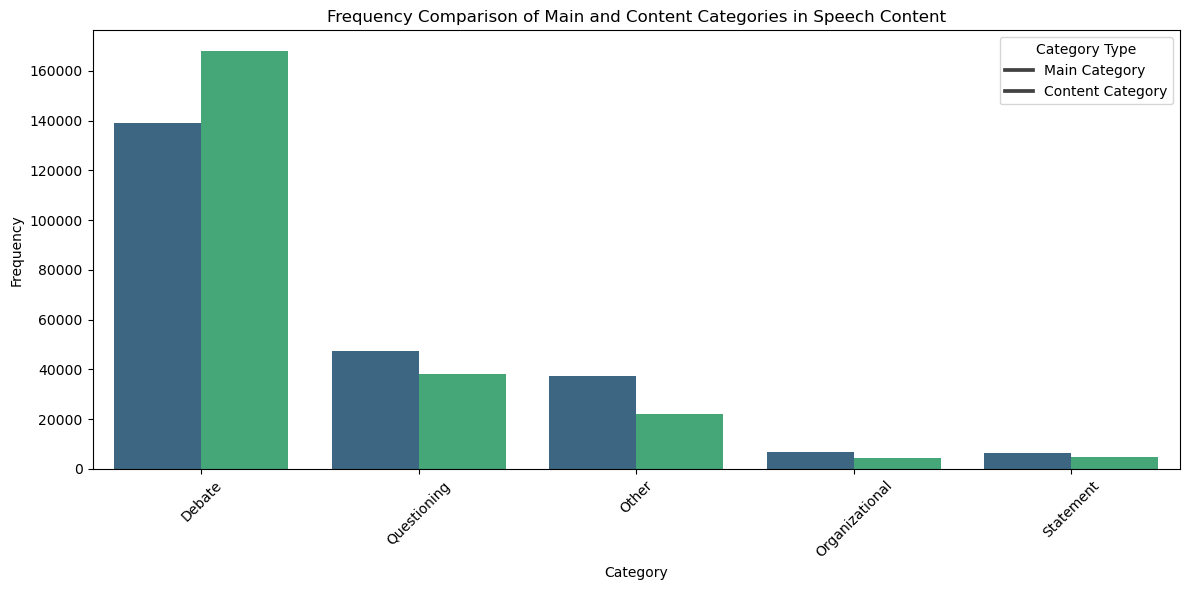

In [27]:
# Count the frequencies for main_category and content_category
main_category_counts = content_subset_with_classification['main_category'].value_counts().reset_index()
content_category_counts = content_subset_with_classification['content_category'].value_counts().reset_index()

# Rename columns for easy merging
main_category_counts.columns = ['category', 'main_category_count']
content_category_counts.columns = ['category', 'content_category_count']

# Merge the two counts on 'category' for side-by-side comparison
category_counts = pd.merge(main_category_counts, content_category_counts, on='category', how='outer').fillna(0)

# Plot the combined bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=category_counts.melt(id_vars='category', 
                                      value_vars=['main_category_count', 'content_category_count'], 
                                      var_name='Category Type', 
                                      value_name='Frequency'),
            x='category', y='Frequency', hue='Category Type', palette='viridis')

# Customize plot appearance
plt.title('Frequency Comparison of Main and Content Categories in Speech Content')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Category Type', labels=['Main Category', 'Content Category'])
plt.tight_layout()
plt.show()

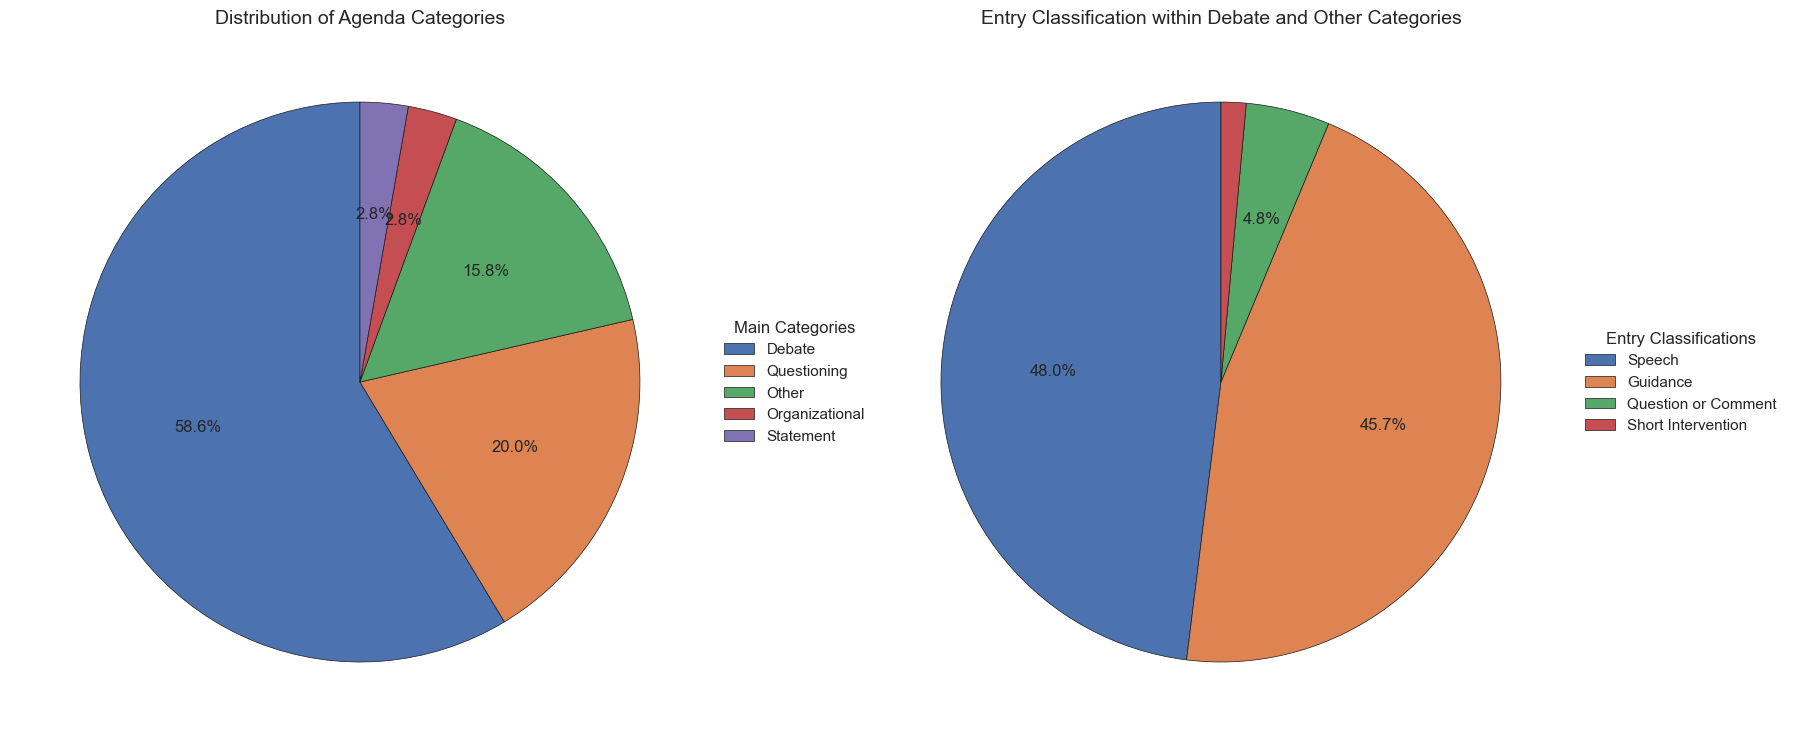

In [233]:
# Define a basic color palette for consistency
sns.set_theme(style="whitegrid")

# Create a figure with two subplots for side-by-side pie charts
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Define a function for percentage display with thresholds
def autopct_func(pct):
    return f'{pct:.1f}%' if pct > 2 else ''

# Pie chart for Main Categories
main_sizes = content_subset_with_classification['main_category'].value_counts()
axes[0].pie(
    main_sizes,
    labels=None,  # Use the legend instead of labels
    autopct=lambda pct: autopct_func(pct),
    startangle=90,
    wedgeprops=dict(edgecolor='k', linewidth=0.5)
)
axes[0].set_title('Distribution of Agenda Categories', fontsize=14)

# Legend for the first chart
axes[0].legend(
    main_sizes.index,
    title="Main Categories",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    frameon=False
)

# Filter for Debate and Other main categories
debates = content_subset_with_classification[
    (content_subset_with_classification['main_category'] == 'Debate') | 
    (content_subset_with_classification['main_category'] == 'Other')
]

# Pie chart for Entry Classification within Debate and Other categories
entry_sizes = debates['entry_classification'].value_counts()
axes[1].pie(
    entry_sizes,
    labels=None,  # Use the legend instead of labels
    autopct=lambda pct: autopct_func(pct),
    startangle=90,
    wedgeprops=dict(edgecolor='k', linewidth=0.5)
)
axes[1].set_title('Entry Classification within Debate and Other Categories', fontsize=14)

# Legend for the second chart
axes[1].legend(
    entry_sizes.index,
    title="Entry Classifications",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    frameon=False
)

# Adjust layout for readability
plt.tight_layout()

# Save the plot as a PNG file for your thesis
plt.savefig('main_and_entry_classification_pie_charts_basic_colors.png', format='png', dpi=300)

# Display the plot
plt.show()

In [29]:
# add column month for further analysis
content_subset_with_classification['month_year'] = content_subset_with_classification['date'].dt.to_period('M')

## 4. Classification of Contributions

In this section, contributions within parliamentary debates are classified based on the faction contributing and the type of contribution. This classification helps differentiate types of parliamentary contributions.

### 4.1 Allocation of contributions to parties

In this section, contributions are allocated to specific parties (factions) based on text content. The process involves mapping recognized party names and abbreviations to faction IDs, filtering contributions by faction, and identifying the presence and position of faction names within the text content. This ensures that each contribution is associated with a specific faction, which is essential for further analyses of inter-party discourse and reactions.

In [30]:
#make contributions dataframe with the last 100000 rows to ease computation time
contributions = contributions_raw.sort_values(by='speech_id').tail(100000)
# out of column content, check which faction is in there
# Step 1: Create a mapping of faction name/abbreviation to faction_id
faction_mapping = {row['abbreviation']: row['id'] for _, row in factions_raw.iterrows()}

# add Linken to mapping with number 7
faction_mapping['Linken'] = 7
faction_mapping['DIE Linke'] = 7
faction_mapping['GRÜNEN'] = 4
faction_mapping['CDU'] = 5
faction_mapping['F.D.P.'] = 15
faction_mapping['GRÜNE'] = 4
faction_mapping['BÜNDNISSES 90/DIE GRÜNEN'] = 4


# keep only rows in dictionary where faction id is 25, 5, 7
faction_mapping = {key: value for key, value in faction_mapping.items() if value in [25, 5, 7, 15, 0, 4,3, 20, 18]}
print(faction_mapping)


def extract_factions_with_positions(content):
    matched_factions = []
    positions = []
    for faction, faction_id in faction_mapping.items():
        # Use regex to ensure exact matching without duplicates
        for match in re.finditer(r'\b' + re.escape(faction) + r'\b', content, re.IGNORECASE):
            if faction_id not in matched_factions:  # Ensure uniqueness per faction_id
                matched_factions.append(faction_id)
                positions.append(match.start())  # Capture position
    return matched_factions, positions if matched_factions else ([], [])



# Step 4: Apply the function to the content of the last 40 rows
contributions[['faction_ids', 'faction_positions']] = contributions['content'].apply(
    lambda x: pd.Series(extract_factions_with_positions(x))
)

{'AfD': 0, 'Bündnis 90/Die Grünen': 4, 'DIE LINKE.': 7, 'CDU/CSU': 5, 'FDP': 15, 'SPD': 25, 'Fraktionslos': 18, 'BSW': 3, 'Gast': 20, 'Linken': 7, 'DIE Linke': 7, 'GRÜNEN': 4, 'CDU': 5, 'F.D.P.': 15, 'GRÜNE': 4, 'BÜNDNISSES 90/DIE GRÜNEN': 4}


### 4.2 Allocation of contribution types

This section categorizes contributions based on their content and textual cues. It first excludes contributions that are city names, as they do not contribute to meaningful discourse. Then, reaction types are categorized, with comments being labeled when the content includes an exclamation mark. This process refines the contributions dataset to include only relevant interactions, which is crucial for assessing reaction types and inter-party responses.

In [31]:
# Dictionary with the reaction types found in the data
reaction_types = {
    "Beifall": "Applause",
    "Zuruf": "Interjection",
    "Heiterkeit": "Cheerfulness",
    "Widerspruch": "Objection",
    "Lachen": "Laughter",
    "Unruhe": "Disturbance",
    "Zustimmung": "Agreement",
    "]:" : "Comment",
    "] :" : "Comment",
    "Abg.:": "Comment",
    "Zwischenfrage": "Question Request",
}

def extract_reactions_with_positions(content):
    matched_reactions = []
    positions = []
    for reaction, reaction_type in reaction_types.items():
        for match in re.finditer(re.escape(reaction), content, re.IGNORECASE):
            matched_reactions.append(reaction_type)
            positions.append(match.start())  # Capture the position of each match
    # Ensure two empty lists are returned if no reactions are found
    return (matched_reactions, positions) if matched_reactions else ([], [])

# Apply the function and expand the result into two separate columns
contributions[['reaction_types', 'reaction_positions']] = contributions['content'].apply(
    lambda x: pd.Series(extract_reactions_with_positions(x))
)
# Display the updated DataFrame
contributions


text_position                                            content  \
4               0                           (Beifall bei der LINKEN)   
0               1  (Dr . Petra Sitte [DIE LINKE]: Ach, das war es...   
1               0  (Albert Stegemann [CDU/CSU]: Ganz offensichtli...   
1               0  (Klaus Ernst [DIE LINKE]: Das ist ein anderes ...   
0               1  (Beifall bei der CDU/CSU - Bernhard Kaster [CD...   
..            ...                                                ...   
5               0  (Beifall bei Abgeordneten der LINKEN Peter Bey...   
1               4                                             (2014)   
0               5  (Beifall bei der LINKEN - Henning Otte [CDU/ C...   
2               3   (Henning Otte [CDU/CSU]: Haben Sie auch gesagt!)   
0               0  (Beifall bei der CDU/CSU sowie bei Abgeordnete...   

    speech_id faction_ids faction_positions                reaction_types  \
4      812792         [7]              [17]                    [Applause]   
0      812793         [7]              [19]                     [Comment]   
1      812793         [5]              [19]                     [Comment]   
1      812794         [7]              [14]                     [Comment]   
0      812794      [5, 7]         [17, 111]  [Applause, Comment, Comment]   
..        ...         ...               ...                           ...   
5      846682      [5, 7]          [50, 30]           [Applause, Comment]   
1      846682          []          ([], [])                            []   
0      846682      [7, 5]          [17, 40]           [Applause, Comment]   
2      846682         [5]              [15]                     [Comment]   
0      846684     [5, 25]          [17, 52]                    [Applause]   

   reaction_positions  
4                 [1]  
0                [28]  
1                [26]  
1                [23]  
0        [1, 51, 120]  
..                ...  
5             [1, 57]  
1                  []  
0             [1, 48]  
2                [22]  
0                 [1]  

[100000 rows x 7 columns]

It is striking that a lot of "contributions" are just names of cites. We will need to filter them out as it mistakenly extracted as a contribution


In [32]:
# create list of cities
cities = cities_raw['Stadt'].tolist()

# check whether the contribution is just a city name
def contains_city_in_parentheses(content):
    for city in cities:
        if f"({city})" in content:
            return True
    return False

# Apply the function to the content column
contributions['city_mentions'] = contributions['content'].apply(contains_city_in_parentheses)

#show contributions where city mentions is true
contributions[contributions['city_mentions'] == True].sample(40)

text_position                                            content  \
11              2                                      (Emmendingen)   
10             31                                      (Wolmirstedt)   
18             23                                           (Minden)   
4              35                                          (Potsdam)   
13             29                                          (Wetzlar)   
13            147                                            (Peine)   
11             27                                           (Minden)   
4              43                                         (Augsburg)   
23             21                                       (Heidelberg)   
17             27                                           (Minden)   
7              75                                          (Wetzlar)   
27             15                                          (Hamburg)   
21             16                                       (St. Wendel)   
19             22                                         (Backnang)   
5               2  (Lothar Binding (Heidelberg) [SPD]: Das haben ...   
13              2                                             (Köln)   
56            104                                         (Duisburg)   
37            123                                             (Köln)   
4               8                                           (Erfurt)   
61             75                                            (Peine)   
12             29                                           (Erfurt)   
14             29                                           (Berlin)   
11              1  (Claudia Roth (Augsburg) [BÜNDNIS 90/ DIE GRÜN...   
14             33                                           (Bremen)   
38              5                                              (Hof)   
59             15                                      (Emmendingen)   
5              36                                             (Köln)   
45             35                                           (Aachen)   
18             20                                       (Heidelberg)   
3              36                                         (Tübingen)   
44             40                                         (Chemnitz)   
14             35                                           (Berlin)   
4               8                                            (Peine)   
15             67                                            (Peine)   
14             25                                       (Heidelberg)   
30             19                                    (Weil am Rhein)   
5               0                                         (Augsburg)   
11              3  (Hubertus Heil (Peine) [SPD]: Ja, für Maßnahmen!)   
6              30                                          (Wetzlar)   
37              2                                              (Hof)   

    speech_id faction_ids faction_positions reaction_types reaction_positions  \
11     831922          []          ([], [])             []                 []   
10     824630          []          ([], [])             []                 []   
18     824630          []          ([], [])             []                 []   
4      812902          []          ([], [])             []                 []   
13     826394          []          ([], [])             []                 []   
13     816571          []          ([], [])             []                 []   
11     845450          []          ([], [])             []                 []   
4      833341          []          ([], [])             []                 []   
23     819926          []          ([], [])             []                 []   
17     834859          []          ([], [])             []                 []   
7      826390          []          ([], [])             []                 []   
27     822920          []          ([], [])             []                 []  

In [33]:
# Filter out all contributions that are just city names
contributions_without_cities = contributions[~(contributions['city_mentions'] & contributions['reaction_types'].apply(lambda x: x == []))]

contributions_without_cities

# Step 1: Check for rows where reaction could not get classified
empty_reactions_df = contributions_without_cities[
    (contributions_without_cities['reaction_types'].apply(lambda x: x == [])) &
    (contributions_without_cities['reaction_positions'].apply(lambda x: x == []))
]

empty_reactions_df

text_position                                            content  \
7               1  (Klaus Ernst [DIE LINKE], an die CDU/CSU gewan...   
11              7                                    (2 . Ausschuss)   
18              0                                                (f)   
17              1                                               (EU)   
15              3                                                (f)   
..            ...                                                ...   
4               0                                        (EUFOR RCA)   
3               1                                             (2013)   
1               3                                                (f)   
2               2                                             (2014)   
1               4                                             (2014)   

    speech_id faction_ids faction_positions reaction_types reaction_positions  \
7      812802      [5, 7]          [33, 14]             []                 []   
11     812826          []          ([], [])             []                 []   
18     812826          []          ([], [])             []                 []   
17     812826          []          ([], [])             []                 []   
15     812826          []          ([], [])             []                 []   
..        ...         ...               ...            ...                ...   
4      846665          []          ([], [])             []                 []   
3      846665          []          ([], [])             []                 []   
1      846665          []          ([], [])             []                 []   
2      846665          []          ([], [])             []                 []   
1      846682          []          ([], [])             []                 []   

    city_mentions  
7           False  
11          False  
18          False  
17          False  
15          False  
..            ...  
4           False  
3           False  
1           False  
2           False  
1           False  

[5743 rows x 8 columns]

By analyzing the remaining reactions that could not yet get classified, we find that there are some comments left. We will classify everythinng with an exclamaiton mark and no reaction type as comment

In [34]:
# Function to classify as "Comment" if content contains "!" and reaction_types is empty
def classify_as_comment(row):
    if "!" in row['content'] and row['reaction_types'] == []:
        return ["Comment"]  # Classify as "Comment"
    return row['reaction_types']  # Keep the original list if condition not met

# Apply the function to the DataFrame
contributions_without_cities['reaction_types'] = contributions_without_cities.apply(classify_as_comment, axis=1)

# Display the updated DataFrame to check changes
contributions_without_cities

text_position                                            content  \
4               0                           (Beifall bei der LINKEN)   
0               1  (Dr . Petra Sitte [DIE LINKE]: Ach, das war es...   
1               0  (Albert Stegemann [CDU/CSU]: Ganz offensichtli...   
1               0  (Klaus Ernst [DIE LINKE]: Das ist ein anderes ...   
0               1  (Beifall bei der CDU/CSU - Bernhard Kaster [CD...   
..            ...                                                ...   
5               0  (Beifall bei Abgeordneten der LINKEN Peter Bey...   
1               4                                             (2014)   
0               5  (Beifall bei der LINKEN - Henning Otte [CDU/ C...   
2               3   (Henning Otte [CDU/CSU]: Haben Sie auch gesagt!)   
0               0  (Beifall bei der CDU/CSU sowie bei Abgeordnete...   

    speech_id faction_ids faction_positions                reaction_types  \
4      812792         [7]              [17]                    [Applause]   
0      812793         [7]              [19]                     [Comment]   
1      812793         [5]              [19]                     [Comment]   
1      812794         [7]              [14]                     [Comment]   
0      812794      [5, 7]         [17, 111]  [Applause, Comment, Comment]   
..        ...         ...               ...                           ...   
5      846682      [5, 7]          [50, 30]           [Applause, Comment]   
1      846682          []          ([], [])                            []   
0      846682      [7, 5]          [17, 40]           [Applause, Comment]   
2      846682         [5]              [15]                     [Comment]   
0      846684     [5, 25]          [17, 52]                    [Applause]   

   reaction_positions  city_mentions  
4                 [1]          False  
0                [28]          False  
1                [26]          False  
1                [23]          False  
0        [1, 51, 120]          False  
..                ...            ...  
5             [1, 57]          False  
1                  []          False  
0             [1, 48]          False  
2                [22]          False  
0                 [1]          False  

[95075 rows x 8 columns]

Clean data and filter out all remaining contributions that have not yet been classified as by inspection it is just mistakes in data

In [35]:
#Filter out all contributions and safe in contributions_df only if reaction type empty and drop them from the data frame
contributions_df = contributions_without_cities[~contributions_without_cities['reaction_types'].apply(lambda x: x == [])]

#drop column city mentions
contributions_df.drop(columns=['city_mentions'], inplace=True)
contributions_df

text_position                                            content  \
4               0                           (Beifall bei der LINKEN)   
0               1  (Dr . Petra Sitte [DIE LINKE]: Ach, das war es...   
1               0  (Albert Stegemann [CDU/CSU]: Ganz offensichtli...   
1               0  (Klaus Ernst [DIE LINKE]: Das ist ein anderes ...   
0               1  (Beifall bei der CDU/CSU - Bernhard Kaster [CD...   
..            ...                                                ...   
3               2  (Beifall bei Abgeordneten der LINKEN Peter Bey...   
5               0  (Beifall bei Abgeordneten der LINKEN Peter Bey...   
0               5  (Beifall bei der LINKEN - Henning Otte [CDU/ C...   
2               3   (Henning Otte [CDU/CSU]: Haben Sie auch gesagt!)   
0               0  (Beifall bei der CDU/CSU sowie bei Abgeordnete...   

    speech_id faction_ids faction_positions                reaction_types  \
4      812792         [7]              [17]                    [Applause]   
0      812793         [7]              [19]                     [Comment]   
1      812793         [5]              [19]                     [Comment]   
1      812794         [7]              [14]                     [Comment]   
0      812794      [5, 7]         [17, 111]  [Applause, Comment, Comment]   
..        ...         ...               ...                           ...   
3      846682      [5, 7]          [50, 30]           [Applause, Comment]   
5      846682      [5, 7]          [50, 30]           [Applause, Comment]   
0      846682      [7, 5]          [17, 40]           [Applause, Comment]   
2      846682         [5]              [15]                     [Comment]   
0      846684     [5, 25]          [17, 52]                    [Applause]   

   reaction_positions  
4                 [1]  
0                [28]  
1                [26]  
1                [23]  
0        [1, 51, 120]  
..                ...  
3             [1, 57]  
5             [1, 57]  
0             [1, 48]  
2                [22]  
0                 [1]  

[89458 rows x 7 columns]

In [36]:
# show percentage of reaction types
# Step 1: Flatten the list of reaction types
flat_reaction_types = contributions_df['reaction_types'].explode()

# Step 2: Calculate the percentage of each reaction type
reaction_type_percentages = flat_reaction_types.value_counts(normalize=True) * 100
reaction_type_percentages

Applause            59.038624
Comment             34.330560
Interjection         3.251827
Cheerfulness         1.921005
Laughter             0.648424
Objection            0.572710
Question Request     0.125220
Disturbance          0.076685
Agreement            0.034945
Name: reaction_types, dtype: float64

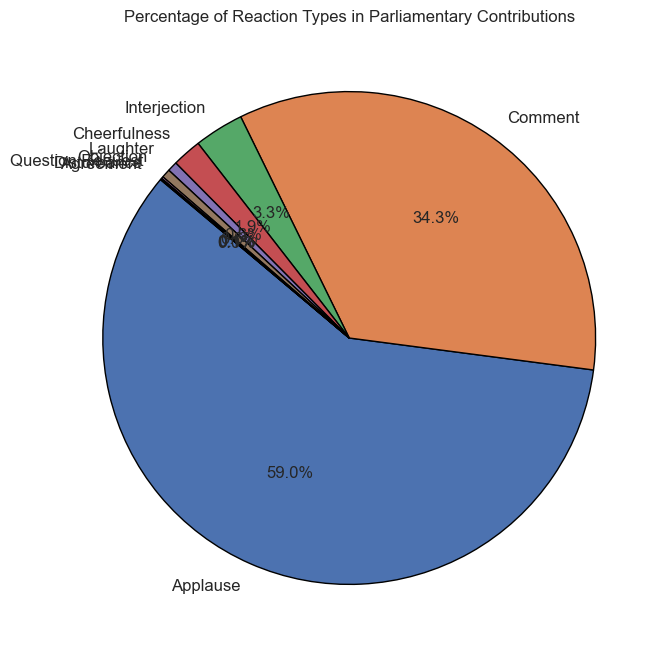

In [37]:
plt.figure(figsize=(8, 8))
plt.pie(
    reaction_type_percentages.values,          # Values (percentages)
    labels=reaction_type_percentages.index,    # Labels (reaction types)
    autopct='%1.1f%%',                         # Show percentages with one decimal place
    startangle=140,                            # Starting angle for first slice
    wedgeprops={'edgecolor': 'black'},         # Edge color for clear separation
    textprops={'fontsize': 12}                 # Text size for readability
)
plt.title("Percentage of Reaction Types in Parliamentary Contributions")
plt.show()

In [38]:
# calculate how many contributions were classified
len(contributions_df)/len(contributions)

0.89458

There is a large imbalance in classes. However, we will continue analyzing everything to inspect if some of the classes reveal interesting insights

### 4.3 Allocation of faction to reaction type

In this section, each reaction type within a contribution is aligned with the relevant faction, based on positional information. Reactions labeled as "Comment" are paired with the closest preceding faction in the text, ensuring meaningful associations. Other reaction types are paired with faction IDs sequentially, preserving their order. This structured alignment provides a basis for analyzing faction-specific reactions, revealing interaction patterns in parliamentary discourse.

In [39]:
def match_factions_to_reactions(row):
    # Sort factions and reactions by their positions
    faction_positions = row['faction_positions']
    reaction_positions = row['reaction_positions']

    # Flatten lists if they are nested and sort them along with faction_ids and reaction_types
    if any(isinstance(i, list) for i in faction_positions):
        faction_positions = [item for sublist in faction_positions for item in sublist]
    if any(isinstance(i, list) for i in reaction_positions):
        reaction_positions = [item for sublist in reaction_positions for item in sublist]

    sorted_factions = [x for _, x in sorted(zip(faction_positions, row['faction_ids']))]
    sorted_reactions = [x for _, x in sorted(zip(reaction_positions, row['reaction_types']))]
    sorted_faction_positions = sorted(faction_positions)
    sorted_reaction_positions = sorted(reaction_positions)
    
    matched_factions = []
    matched_reactions = []
    used_for_comment = set()  # Track factions already assigned to "Comment"

    # If there are reactions but no factions, assign "All" to each reaction
    if not sorted_factions and sorted_reactions:
        matched_factions = ["All"] * len(sorted_reactions)
        matched_reactions = sorted_reactions
        return matched_factions, matched_reactions

    # Step 1: Match "Comment" reactions
    for reaction_idx, reaction in enumerate(sorted_reactions):
        if reaction == "Comment":
            # Find the faction immediately before the comment position
            comment_position = sorted_reaction_positions[reaction_idx]
            closest_faction_idx = None
            for idx, faction_position in enumerate(sorted_faction_positions):
                if faction_position < comment_position and sorted_factions[idx] not in used_for_comment:
                    closest_faction_idx = idx
                elif faction_position >= comment_position:
                    break

            if closest_faction_idx is not None:
                faction = sorted_factions[closest_faction_idx]
                matched_factions.append(faction)
                matched_reactions.append("Comment")
                used_for_comment.add(faction)  # Mark this faction as used
            else:
                # If no valid faction found, skip this comment
                continue

    # Step 2: Match remaining reactions
    faction_idx = 0
    for reaction_idx, reaction in enumerate(sorted_reactions):
        if reaction == "Comment":
            continue  # Skip comments, already matched

        while faction_idx < len(sorted_factions):
            faction = sorted_factions[faction_idx]
            faction_position = sorted_faction_positions[faction_idx]

            if faction not in used_for_comment:
                matched_factions.append(faction)
                matched_reactions.append(reaction)
                faction_idx += 1
                break  # Move to the next reaction after finding a match
            faction_idx += 1

    # Handle unmatched factions by appending remaining factions, if needed
    if len(matched_factions) < len(sorted_factions):
        unmatched_factions = [f for f in sorted_factions if f not in used_for_comment and f not in matched_factions]
        matched_factions.extend(unmatched_factions)
        # Extend matched_reactions with the last known reaction type or leave as blank
        if matched_reactions:
            matched_reactions.extend([matched_reactions[-1]] * (len(matched_factions) - len(matched_reactions)))

    return matched_factions, matched_reactions

# Apply the function to each row in contributions DataFrame
contributions_df[['matched_factions', 'matched_reactions']] = contributions_df.apply(
    lambda row: pd.Series(match_factions_to_reactions(row)),
    axis=1
)

# Display the updated DataFrame
contributions_df.sample(10)


text_position                                            content  \
6               3                                       (Heiterkeit)   
0               0               (Beifall beim BÜNDNIS 90/DIE GRÜNEN)   
6               4                           (Beifall bei der LINKEN)   
7               4               (Beifall beim BÜNDNIS 90/DIE GRÜNEN)   
12              1              (Beifall bei der SPD und der CDU/CSU)   
6               2     (Beifall des Abg. Charles M. Huber [CDU/ CSU])   
0               9  (Beifall bei der CDU/CSU sowie bei Abgeordnete...   
6               2  (Dr. Rolf Mützenich [SPD]: Was ist denn mit Ih...   
4               1                              (Beifall bei der SPD)   
0              16              (Beifall bei der CDU/CSU und der SPD)   

    speech_id faction_ids faction_positions  reaction_types  \
6      830614          []          ([], [])  [Cheerfulness]   
0      835523         [4]              [14]      [Applause]   
6      822536         [7]              [17]      [Applause]   
7      825373         [4]              [14]      [Applause]   
12     824363     [5, 25]          [29, 17]      [Applause]   
6      820847         [5]              [36]      [Applause]   
0      821006     [5, 25]          [17, 52]      [Applause]   
6      817681        [25]              [21]       [Comment]   
4      820633        [25]              [17]      [Applause]   
0      826411     [5, 25]          [17, 33]      [Applause]   

   reaction_positions matched_factions     matched_reactions  
6                 [1]            [All]        [Cheerfulness]  
0                 [1]              [4]            [Applause]  
6                 [1]              [7]            [Applause]  
7                 [1]              [4]            [Applause]  
12                [1]          [25, 5]  [Applause, Applause]  
6                 [1]              [5]            [Applause]  
0                 [1]          [5, 25]  [Applause, Applause]  
6                [24]             [25]             [Comment]  
4                 [1]             [25]            [Applause]  
0                 [1]          [5, 25]  [Applause, Applause]

In [40]:
# show where leghth of lists are not the same for faction_ids and reaction_types
inspection_df= (contributions_df[contributions_df['faction_ids'].str.len() != contributions_df['reaction_types'].str.len()])

# filter away all where reaction type is other and faction ids is nan
inspection_df = inspection_df[~(inspection_df['reaction_types'].apply(lambda x: 'Other' in x) & inspection_df['faction_ids'].isna())]

# filter away all faction ids nan
inspection_df = inspection_df[~inspection_df['faction_ids'].isna()]

# show where length of list of faction_ids is not the same as reaction_types
inspection_df = inspection_df[inspection_df['faction_ids'].str.len() != inspection_df['reaction_types'].str.len()]

# show where length of faction id is more than 1 and length of reaction type is more than 1
inspection_df = inspection_df[(inspection_df['faction_ids'].str.len() > 1)]
inspection_df = inspection_df[(inspection_df['reaction_types'].str.len() > 1)]

# increase columnn with for content
pd.set_option('display.max_colwidth', None)

print(len(inspection_df))
inspection_df.sample()

3338


text_position  \
0              9   

                                                                                                                                                         content  \
0  (Beifall bei der SPD und dem BÜNDNIS 90/ DIE GRÜNEN sowie bei Abgeordneten der LINKEN - Özcan Mutlu [BÜNDNIS 90/DIE GRÜNEN]: Manche schlafen die ganze Zeit!)   

   speech_id faction_ids faction_positions       reaction_types  \
0     844794  [4, 25, 7]     [101, 17, 79]  [Applause, Comment]   

  reaction_positions matched_factions              matched_reactions  
0           [1, 122]       [4, 25, 7]  [Comment, Applause, Applause]

In [41]:
# show where matched_factions is not the same length as matched_reaactins
inspection_df2 = contributions_df[contributions_df['matched_factions'].str.len() != contributions_df['matched_reactions'].str.len()]
print(len(inspection_df2))
inspection_df2.sample(10)

62


text_position  \
9               3   
11              4   
11              6   
14              1   
2               5   
2               2   
2               9   
40             13   
9               4   
0               0   

                                                                                                                                                         content  \
9                                                                                                 (Dr. Georg Nüßlein (CDU/CSU): Sagen Sie mal was zu Morsleben!)   
11                                                                                                         (Volker Kauder (CDU/CSU): Das stimmt doch gar nicht!)   
11                                                                                              (Volker Kauder [CDU/CSU], an die LINKE gewandt: Ihr Mauerbauer!)   
14                                        (Renate Künast [BÜNDNIS 90/DIE GRÜNEN], auf den Redner zeigend: Der ist doch gar nicht Law and Order, der tut nur so!)   
2                                                                   (Hubert Hüppe [CDU/CSU], an BÜNDNIS 90/DIE GRÜNEN gewandt: Da war der Vorsitzende nicht da!)   
2                                                                              (Peter Beyer [CDU/CSU], an die LINKE gewandt: Sie haben Angst vor Veränderungen!)   
2   (Dr . Volker Ullrich [CDU/CSU], an den Abg . Özcan Mutlu [BÜNDNIS 90/DIE GRÜNEN] gewandt: Kommen Sie einmal in den Rechtsausschuss und diskutieren Sie mit!)   
40                           (Volker Kauder [CDU/CSU], an die Abg. Katrin Göring-Eckardt [BÜNDNIS 90/DIE GRÜNEN] gewandt: Dann gibt es eine richtige Abreibung!)   
9                                                                                   (Michael Grosse-Brömer [CDU/CSU], an die LINKE gewandt: Das war nicht fair!)   
0                                           (Volker Kauder [CDU/CSU], an den Abg .  Özcan Mutlu [BÜNDNIS 90/DIE GRÜNEN] gewandt: Sie haben doch nicht zugehört!)   

    speech_id faction_ids faction_positions reaction_types reaction_positions  \
9      826740         [5]              [20]      [Comment]                 []   
11     824567         [5]              [16]      [Comment]                 []   
11     842523      [5, 7]          [16, 29]      [Comment]                 []   
14     837500         [4]              [16]      [Comment]                 []   
2      823204      [4, 5]          [28, 15]      [Comment]                 []   
2      835464      [5, 7]          [14, 27]      [Comment]                 []   
2      815758      [4, 5]          [58, 22]      [Comment]                 []   
40     846540      [4, 5]          [61, 16]      [Comment]                 []   
9      842033      [5, 7]          [24, 37]      [Comment]                 []   
0      821938      [4, 5]          [53, 16]      [Comment]                 []   

   matched_factions matched_reactions  
9               [5]                []  
11              [5]                []  
11           [5, 7]                []  
14              [4]                []  
2            [5, 4]                []  
2            [5, 7]                []  
2            [5, 4]                []  
40           [5, 4]                []  
9            [5, 7]                []  
0            [5, 4]                []

In [42]:
# If reaction types is only comment, take the first matched_factions and place comment in matched reactions
def classify_comment_only(row):
    # Check if reaction_types is only "Comment" and matched_factions is not empty
    if row['reaction_types'] == ['Comment'] and row['matched_factions']:
        return [row['matched_factions'][0]], ['Comment']
    return row['matched_factions'], row['matched_reactions']

# Apply the function to update matched_factions and matched_reactions
contributions_df[['matched_factions', 'matched_reactions']] = contributions_df.apply(classify_comment_only, axis=1, result_type='expand')

# Show where matched_factions is not the same length as matched_reactions
inspection_df3 = contributions_df[contributions_df['matched_factions'].str.len() != contributions_df['matched_reactions'].str.len()]
print(len(inspection_df3))
inspection_df3

0


Empty DataFrame
Columns: [text_position, content, speech_id, faction_ids, faction_positions, reaction_types, reaction_positions, matched_factions, matched_reactions]
Index: []

In [43]:
#equalize row lengths
def equalize_lists(row):
    matched_factions = row['matched_factions']
    matched_reactions = row['matched_reactions']

    # If matched_reactions is shorter, fill empty slots with "Other"
    if len(matched_reactions) < len(matched_factions):
        missing_count = len(matched_factions) - len(matched_reactions)
        matched_reactions.extend(["Other"] * missing_count)

    # Return the modified lists
    return pd.Series([matched_factions, matched_reactions])

# Apply the equalize_lists function to each row
contributions_df[['matched_factions', 'matched_reactions']] = contributions_df.apply(equalize_lists, axis=1)

contributions_df.sample(10)

text_position  \
8              11   
6               1   
3               1   
2              10   
0               6   
14             23   
0               0   
0               1   
5               8   
3              13   

                                                                                                                                                   content  \
8   (Beifall bei der CDU/CSU - Lachen beim BÜNDNIS 90/DIE GRÜNEN und bei der LINKEN - Katrin Göring-Eckardt [BÜNDNIS 90/DIE GRÜNEN]: Das machen Sie doch!)   
6                                                                                                              (Tankred Schipanski [CDU/CSU]: Hört! Hört!)   
3                                            (Beifall bei Abgeordneten der LINKEN Sabine Leidig [DIE LINKE]: Das ist auch prima! Das klingt nicht nur so!)   
2                                                                                                                     (Beifall beim BÜNDNIS 90/DIE GRÜNEN)   
0                                                                                                 (Beifall bei der CDU/CSU sowie bei Abgeordneten der SPD)   
14                                                           (Beifall bei der SPD - Volker Kauder [CDU/ CSU]: Herr Schneider, jetzt kommen Sie ins Spiel!)   
0                                                                                                 (Beifall bei der SPD sowie bei Abgeordneten der CDU/CSU)   
0                                                                                                 (Beifall bei der CDU/CSU sowie bei Abgeordneten der SPD)   
5                                                                              (Maria Klein-Schmeink [BÜNDNIS 90/DIE GRÜNEN]: Da kommt ihr gar nicht hin!)   
3                                                                     (Katja Mast [SPD]: Wer keine Pläne hat, braucht keine anderen Pläne zu kritisieren!)   

    speech_id faction_ids faction_positions                 reaction_types  \
8      832490   [4, 5, 7]      [39, 17, 73]  [Applause, Laughter, Comment]   
6      830835         [5]              [21]                      [Comment]   
3      814637         [7]              [30]            [Applause, Comment]   
2      822572         [4]              [14]                     [Applause]   
0      825836     [5, 25]          [17, 52]                     [Applause]   
14     846132     [25, 5]          [17, 38]            [Applause, Comment]   
0      821682     [5, 25]          [48, 17]                     [Applause]   
0      845756     [5, 25]          [17, 52]                     [Applause]   
5      820433         [4]              [23]                      [Comment]   
3      818098        [25]              [13]                      [Comment]   

   reaction_positions matched_factions              matched_reactions  
8        [1, 27, 126]        [7, 5, 4]  [Comment, Applause, Laughter]  
6                [28]              [5]                      [Comment]  
3             [1, 61]              [7]                      [Comment]  
2                 [1]              [4]                     [Applause]  
0                 [1]          [5, 25]           [Applause, Applause]  
14            [1, 46]          [5, 25]            [Comment, Applause]  
0                 [1]          [25, 5]           [Applause, Applause]  
0                 [1]          [5, 25]           [Applause, Applause]  
5                [44]              [4]                      [Comment]  
3                [16]             [25]                      [Comment]

Explode the dataframe to have one reaction and factio per row

In [44]:
# Now explode the DataFrame to have each reaction in its own row
contributions_exploded = contributions_df.explode(['matched_factions', 'matched_reactions'], ignore_index=True)

# Display the resulting DataFrame
contributions_exploded.sample(10)

text_position  \
73855              12   
6211                0   
33483               8   
123307              1   
128245              8   
36639              19   
30583               6   
50646               9   
40644               4   
117163              0   

                                                                                                                                                                                  content  \
73855                                                                                                      (Özcan Mutlu [BÜNDNIS 90/DIE GRÜNEN]: Wieder auf die Ehrenamtlichen schieben!)   
6211                                                                                                                                                             (Beifall bei der LINKEN)   
33483                                                                                                                     (Anja Hajduk [BÜNDNIS 90/DIE GRÜNEN]: Nicht übertreiben jetzt!)   
123307                                                                                                             (Beifall beim BÜNDNIS 90/DIE GRÜNEN sowie bei Abgeordneten der LINKEN)   
128245                                                                                                       (Dr. Rosemarie Hein [DIE LINKE]: Dass die Bedingungen nicht gestimmt haben!)   
36639                                                                                                               (Volker Kauder [CDU/CSU]: Aber dass wir nur zahlen, geht auch nicht!)   
30583                                                                                                                                                  (Beifall bei Abgeordneten der SPD)   
50646                                                                                                                (Beifall des Abg. Christian Kühn [Tübingen] [BÜNDNIS 90/DIE GRÜNEN])   
40644   (Beifall bei Abgeordneten der CDU/CSU Widerspruch beim BÜNDNIS 90/DIE GRÜNEN - Manfred Grund [CDU/CSU], an BÜNDNIS 90/DIE GRÜNEN gewandt: Jetzt müssen wir richtig protestieren!)   
117163                                                                           (Max Straubinger [CDU/CSU]: Oje, oje! Alexander Ulrich [DIE LINKE]: Das war sehr klug von der Kollegin!)   

        speech_id faction_ids faction_positions         reaction_types  \
73855      830542         [4]              [14]              [Comment]   
6211       814511         [7]              [17]             [Applause]   
33483      820702         [4]              [14]              [Comment]   
123307     843428      [4, 7]          [14, 63]             [Applause]   
128245     844537         [7]              [21]              [Comment]   
36639      821304         [5]              [16]              [Comment]   
30583      819985        [25]              [30]             [Applause]   
50646      824677         [4]              [45]             [Applause]   
40644      822077      [4, 5]          [55, 30]  [Applause, Objection]   
117163     841630      [5, 7]          [18, 56]     [Comment, Comment]   

       reaction_positions matched_factions matched_reactions  
73855                [35]                4           Comment  
6211                  [1]                7          Applause  
33483                [35]                4           Comment  
123307                [1]                7          Applause  
128245               [30]                7           Comment  
36639                [23]                5           Comment  
30583                 [1]               25          Applause  
50646                 [1]                4          Applause  
40644             [1, 38]                5          Applause  
117163           [25, 65]                5           Comment

## 5. Content Dataframe Statistics

### 5.1 Total Interruptions (Question or Comment) per Party

This section analyzes the frequency of interruptions (marked as "Question or Comment") directed at each faction over time, as recorded in parliamentary debate sessions. First, the dataset is filtered to include only relevant sessions and entries classified as interruptions. Then, interruptions are counted per faction for each month, pivoted to a matrix format, and smoothed with a 12-month rolling average. Finally, we visualize the results to observe trends in interruptions over time for each faction and the total interruptions across all factions.

In [45]:
# Step 1: Filter the DataFrame to exclude "Debate" and "Other" in "main_category"
debate_df = content_subset_with_classification[
    content_subset_with_classification['main_category'].isin(['Debate', 'Other'])
]

# Step 2: Filter for "Question or Comment" entries and group by speech_politician to count only one per speech
# We'll consider only unique pairs of (speech_politician, faction) for "Question or Comment"
comments_df = debate_df[
    (debate_df['entry_classification'] == 'Question or Comment')
].drop_duplicates(subset=['electoral_term','session', 'politician_id', 'speech_politician'])

comments_df.columns

Index(['id', 'electoral_term', 'session', 'first_name', 'document_url',
       'last_name', 'faction_id', 'position_short', 'position_long',
       'politician_id', 'top_item', 'top_title', 'speech_content', 'date',
       'faction', 'year', 'speech_length', 'age', 'gender', 'tenure',
       'sub_category', 'main_category', 'content_category',
       'entry_classification', 'speech_politician',
       'speech_politician_faction', 'month_year'],
      dtype='object')

We want to count one interruption by a politician as one interruption. A potentially evolving dialouge is not counted

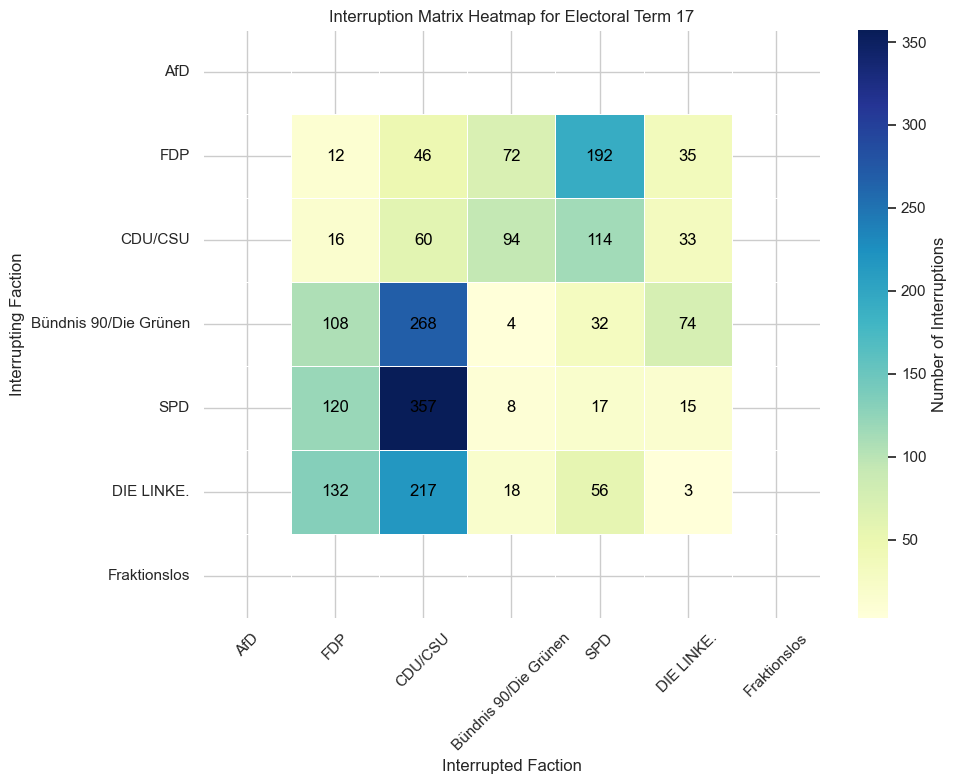

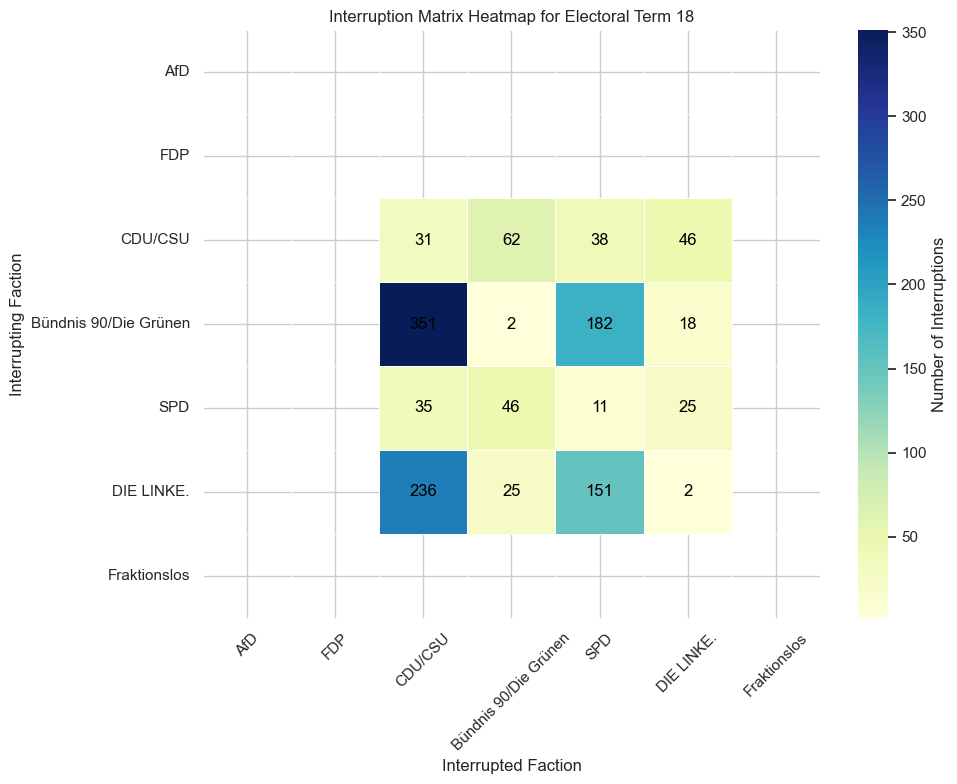

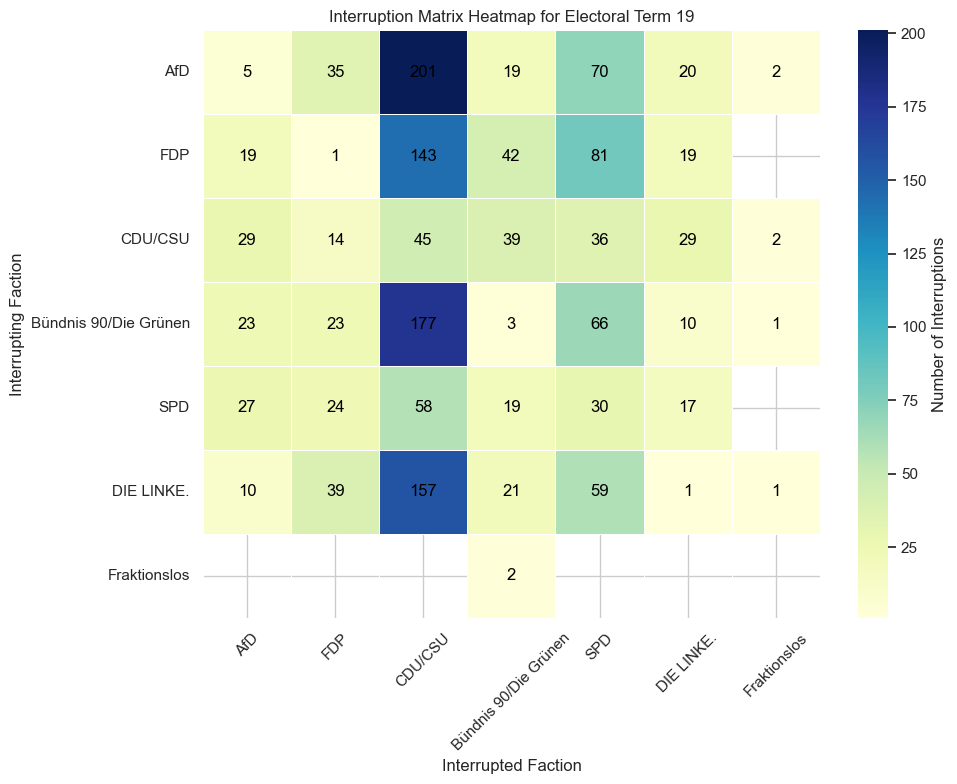

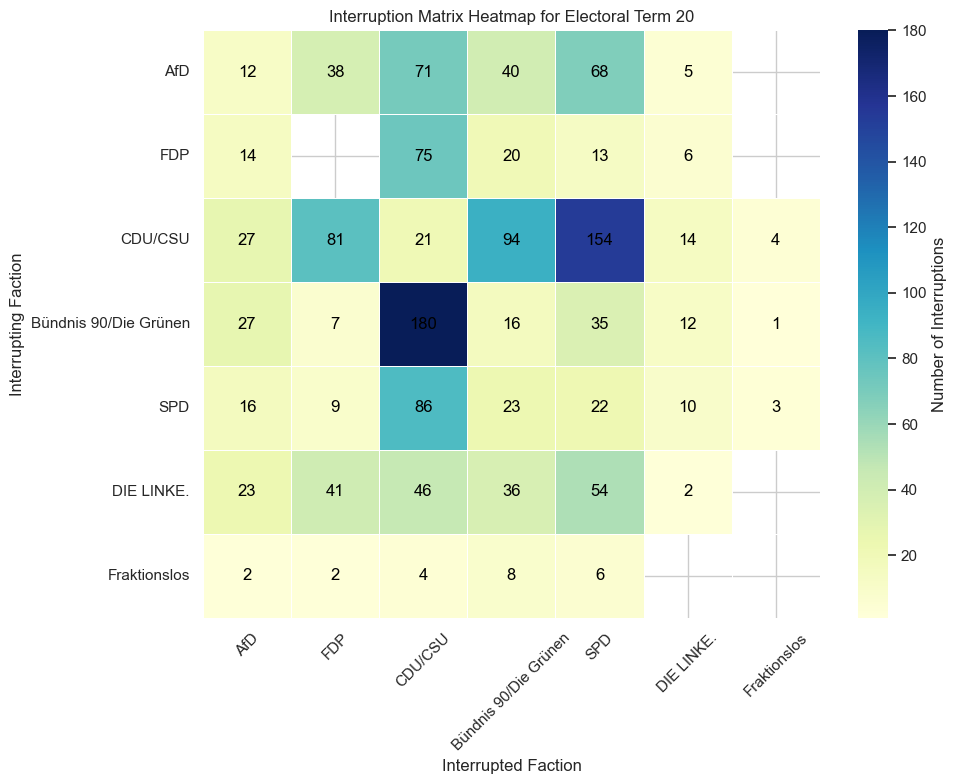

In [46]:
faction_order = ['AfD', 'FDP', 'CDU/CSU', 'Bündnis 90/Die Grünen', 'SPD', 'DIE LINKE.', 'Fraktionslos']


for term in comments_df['electoral_term'].unique():
    # Filter data for the current electoral term
    term_data = comments_df[comments_df['electoral_term'] == term]
    
    # Create a cross-tabulation to count occurrences of each reaction relationship
    reaction_matrix = pd.crosstab(term_data['faction'], term_data['speech_politician_faction'])
    
    # Reindex to ensure the correct order of rows and columns
    reaction_matrix = reaction_matrix.reindex(index=faction_order, columns=faction_order, fill_value=0)
    
    # Create a mask for cells with zero values
    mask = reaction_matrix == 0
    
    # Plot heatmap for the current electoral term with custom settings
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        reaction_matrix, 
        annot=True, 
        cmap=sns.color_palette("YlGnBu", as_cmap=True),  # Use a color palette with white as the lowest value
        fmt="d", 
        linewidths=0.5, 
        cbar_kws={'label': 'Number of Interruptions'}, 
        mask=mask,  # Apply the mask to hide zeros
        annot_kws={"color": "black"}  # Set annotation color for non-zero values
    )
    plt.title(f'Interruption Matrix Heatmap for Electoral Term {term}')
    plt.xlabel('Interrupted Faction')
    plt.ylabel('Interrupting Faction')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

### 5.2 Total Interruptions over time

This section investigates which factions interrupt other factions by electoral term, creating a matrix to capture inter-faction interactions. For each electoral term, a cross-tabulation of interruptions is performed, where rows represent the "interrupting faction" and columns represent the "interrupted faction." The resulting matrix is reindexed to ensure a consistent faction order and visualized using a heatmap to illustrate the frequency and distribution of interruptions among factions for each term.


#### 5.2.1 Interruptions over time - politicians interrupting

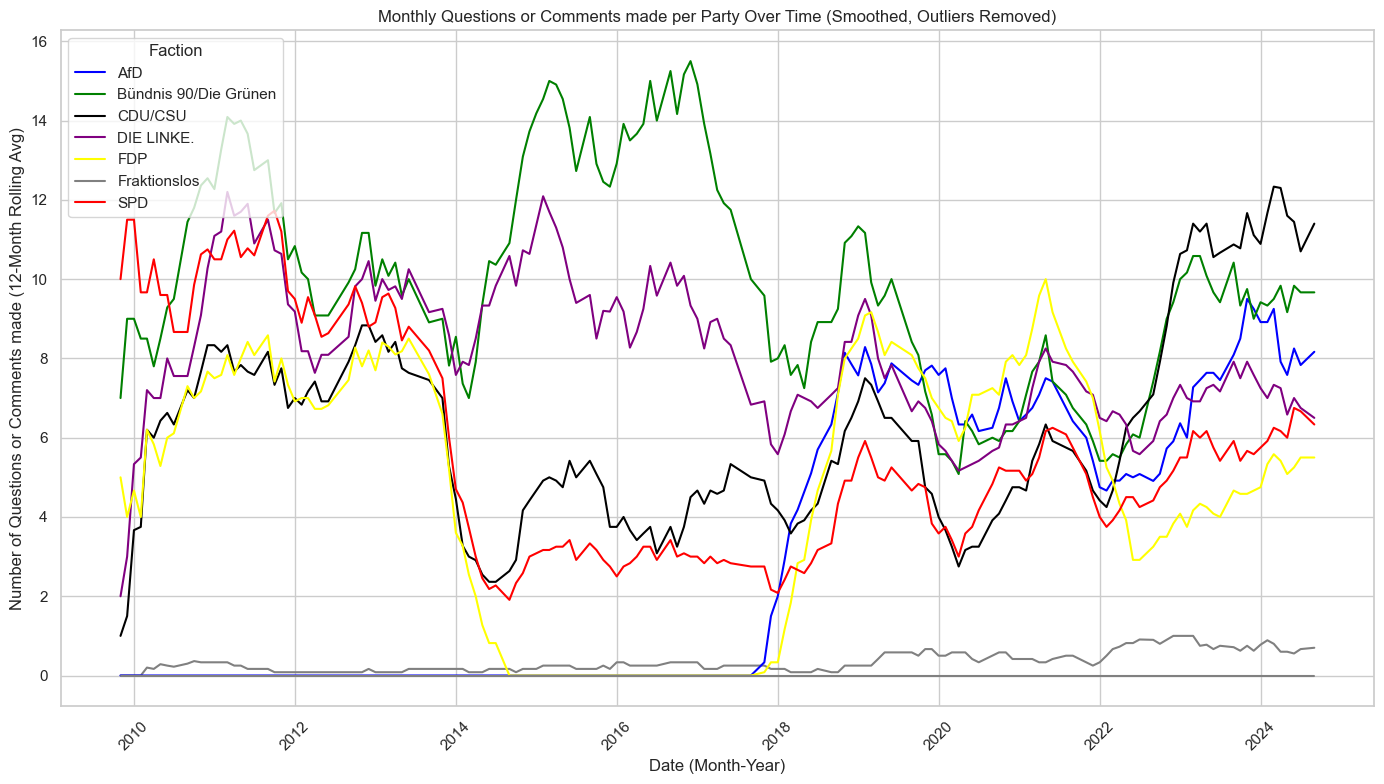

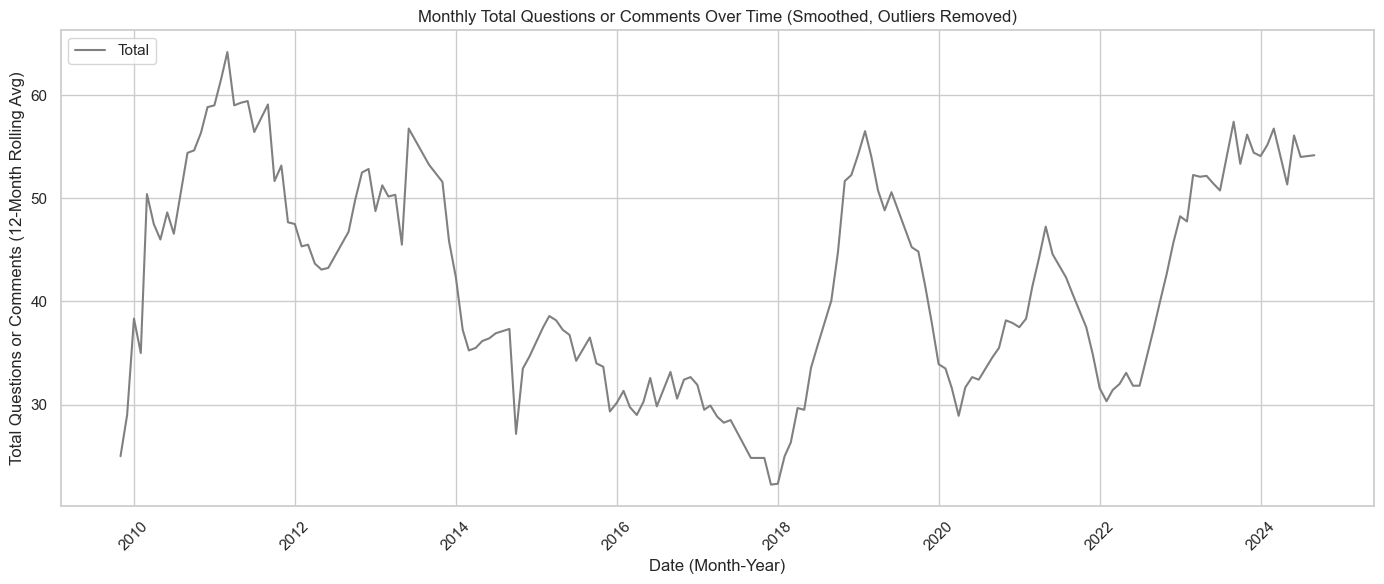

In [47]:
# Define color map for factions
color_map = {
    'CDU/CSU': 'black',
    'SPD': 'red',
    'FDP': 'yellow',
    'Bündnis 90/Die Grünen': 'green',
    'DIE LINKE.': 'purple',
    'AfD': 'blue'
}

# Group by 'month_year' and 'faction' to count the number of "Question or Comment" entries per faction per month
monthly_counts = comments_df.groupby(['month_year', 'faction']).size().reset_index(name='count')

# Pivot the data to have factions as columns, filling any missing values with 0
monthly_counts_pivot = monthly_counts.pivot(index='month_year', columns='faction', values='count').fillna(0)

# Add a "Total" column to represent the sum across all factions for each month
monthly_counts_pivot['Total'] = monthly_counts_pivot.sum(axis=1)

# Step 5: Outlier Detection and Removal (IQR Method) for each faction
def remove_outliers(df):
    """Applies IQR-based outlier removal on each column in the dataframe."""
    for column in df.columns[:-1]:  # Exclude 'Total' column
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outliers = (df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))
        df.loc[outliers, column] = np.nan  # Replace outliers with NaN
    return df

monthly_counts_no_outliers = remove_outliers(monthly_counts_pivot)

# Step 6: Apply a 12-month rolling average after removing outliers
monthly_counts_smoothed = monthly_counts_no_outliers.rolling(window=12, min_periods=1).mean()

# Step 7: Plot each faction in one chart with rolling average
plt.figure(figsize=(14, 8))
for faction in monthly_counts_smoothed.columns[:-1]:  # Exclude the 'Total' column
    color = color_map.get(faction, 'gray')
    plt.plot(
        monthly_counts_smoothed.index.to_timestamp(), 
        monthly_counts_smoothed[faction], 
        label=faction, 
        color=color
    )

# Customize plot appearance for faction-specific chart
plt.xlabel('Date (Month-Year)')
plt.ylabel('Number of Questions or Comments made (12-Month Rolling Avg)')
plt.title('Monthly Questions or Comments made per Party Over Time (Smoothed, Outliers Removed)')
plt.legend(title='Faction', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 8: Plot the 'Total' line in a separate chart with rolling average
plt.figure(figsize=(14, 6))
plt.plot(
    monthly_counts_smoothed.index.to_timestamp(), 
    monthly_counts_smoothed['Total'], 
    label='Total', 
    color='gray'
)

# Customize plot appearance for the total line chart
plt.xlabel('Date (Month-Year)')
plt.ylabel('Total Questions or Comments (12-Month Rolling Avg)')
plt.title('Monthly Total Questions or Comments Over Time (Smoothed, Outliers Removed)')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Wee can see that opposition always makes more comments. We will inspect that further classifying the parties by governing parties and opposition

In [48]:
# show month with the highest amounnt of reactions
monthly_counts_pivot['Total'].idxmax()


Period('2013-06', 'M')

#### 5.2.2. Interruptions over time - speeches interrupted

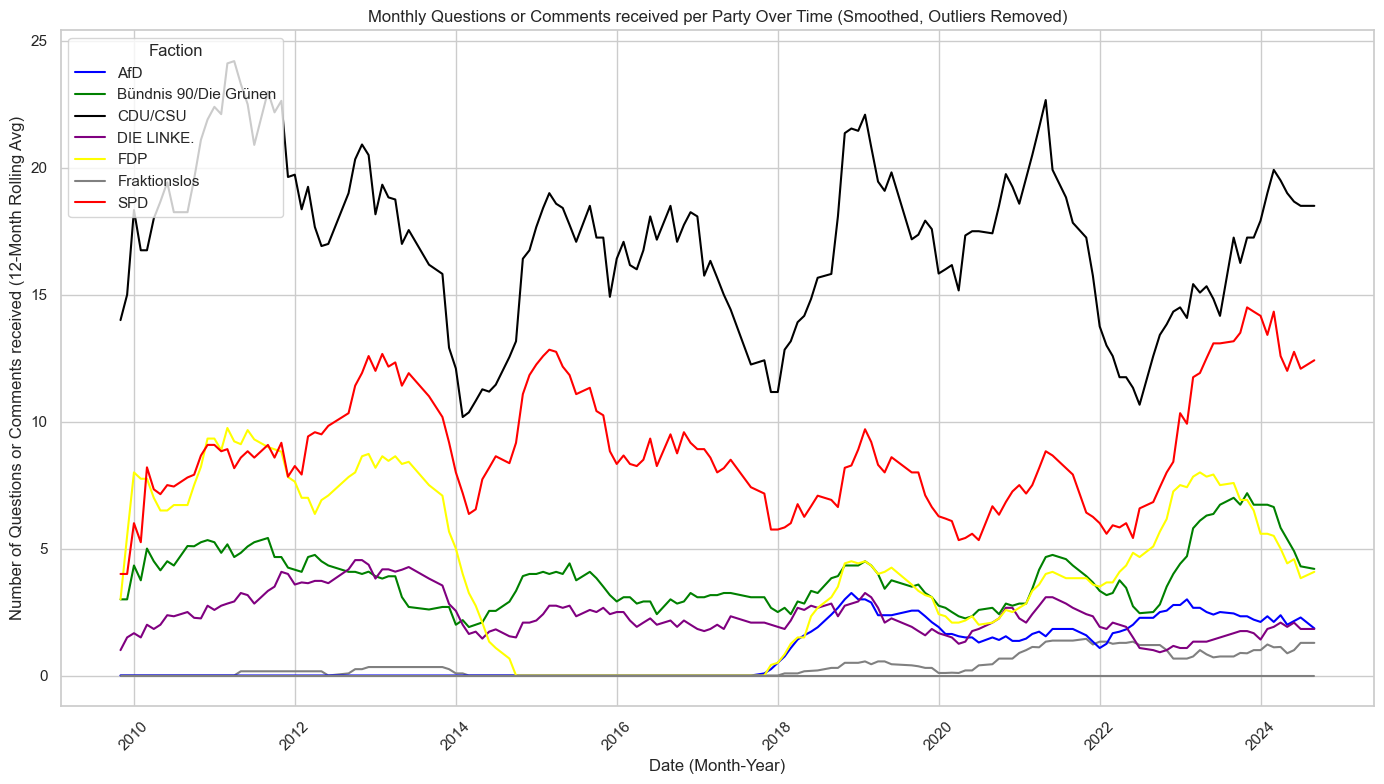

In [49]:
# Group by 'month_year' and 'speech_politician_faction' to count questions/comments
monthly_counts_speech = comments_df.groupby(['month_year', 'speech_politician_faction']).size().reset_index(name='count')

# Pivot the data to have factions as columns, filling any missing values with 0
monthly_counts_speech_pivot = monthly_counts_speech.pivot(index='month_year', columns='speech_politician_faction', values='count').fillna(0)

# Add a "Total" column to represent the sum across all factions for each month
monthly_counts_speech_pivot['Total'] = monthly_counts_speech_pivot.sum(axis=1)

# Apply IQR-based outlier removal for each faction column
def remove_outliers(df):
    for column in df.columns[:-1]:  # Exclude 'Total' column
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outliers = (df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))
        df.loc[outliers, column] = np.nan  # Replace outliers with NaN
    return df

# Remove outliers from the data
monthly_counts_speech_no_outliers = remove_outliers(monthly_counts_speech_pivot)

# Apply a 12-month rolling average to the outlier-free data
monthly_counts_speech_smoothed = monthly_counts_speech_no_outliers.rolling(window=12, min_periods=1).mean()

# Plot each faction with a 12-month rolling average
plt.figure(figsize=(14, 8))
for faction in monthly_counts_speech_smoothed.columns[:-1]:  # Exclude 'Total' column
    color = color_map.get(faction, 'gray')
    plt.plot(
        monthly_counts_speech_smoothed.index.to_timestamp(), 
        monthly_counts_speech_smoothed[faction], 
        label=faction, 
        color=color
    )

# Customize plot appearance for faction-specific chart
plt.xlabel('Date (Month-Year)')
plt.ylabel('Number of Questions or Comments received (12-Month Rolling Avg)')
plt.title('Monthly Questions or Comments received per Party Over Time (Smoothed, Outliers Removed)')
plt.legend(title='Faction', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We inspect that parties with more speaking time are also interrupted more often (which makes) sense. However, we need to normalize, calculationng some sort of frequency to account for that

#### 5.2.3 Interruptions vs. interrupting

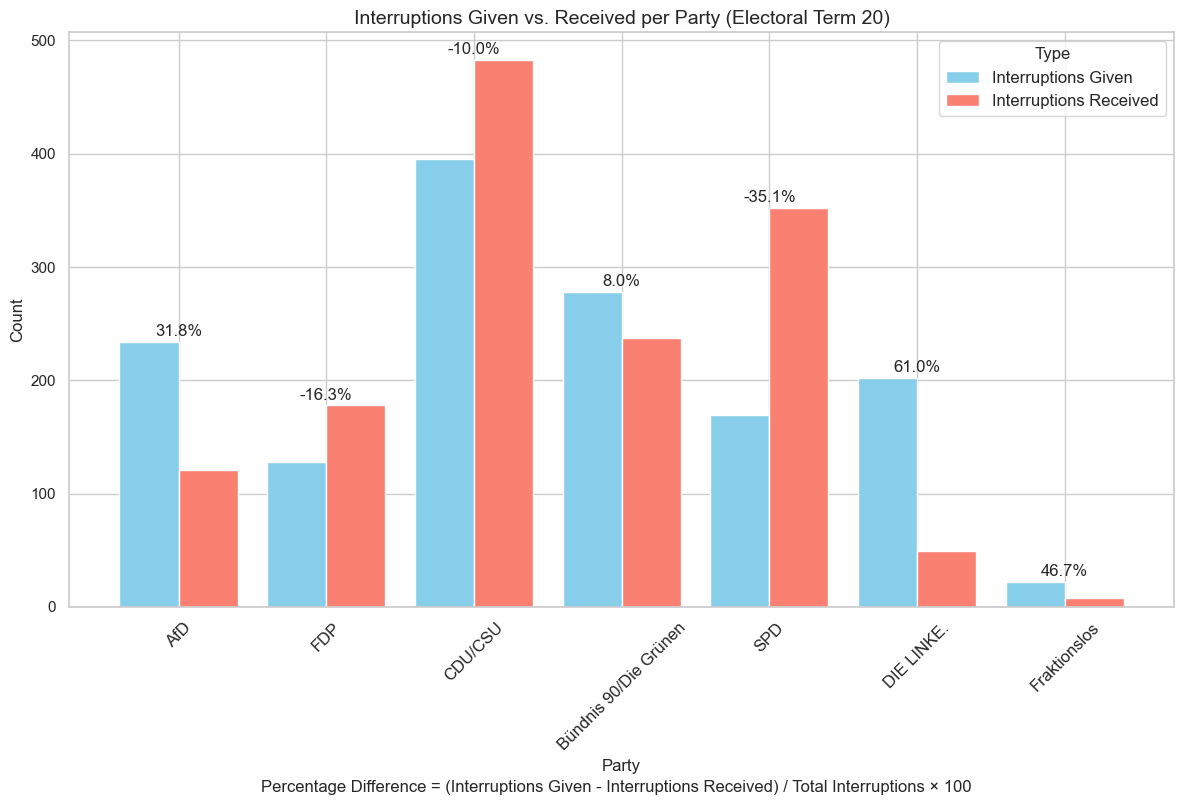

In [285]:
# Apply seaborn style
sns.set_theme(style="whitegrid")

# Define the faction order for sorting
faction_order = ['AfD', 'FDP', 'CDU/CSU', 'Bündnis 90/Die Grünen', 'SPD', 'DIE LINKE.', 'Fraktionslos']

# Step 1: Filter the DataFrame for electoral term 20 and exclude entries with no faction
term_20_data_comments = comments_df[(comments_df['electoral_term'] == 20) & (comments_df['faction'].notna())]

# Step 2: Create a cross-tabulation to count interruptions (who interrupted whom)
reaction_matrix = pd.crosstab(term_20_data_comments['faction'], term_20_data_comments['speech_politician_faction'])

# Reindex to enforce consistent faction order
reaction_matrix = reaction_matrix.reindex(index=faction_order, columns=faction_order, fill_value=0)

# Step 3: Calculate total interruptions given and received per party
interruptions_given = reaction_matrix.sum(axis=1)  # Rows: interruptions given by each faction
interruptions_received = reaction_matrix.sum(axis=0)  # Columns: interruptions received by each faction

# Calculate percentage difference
percentage_difference = (interruptions_given - interruptions_received) / (interruptions_given + interruptions_received) * 100

# Step 4: Create a DataFrame for plotting
interruptions_summary = pd.DataFrame({
    'Party': faction_order,
    'Interruptions Given': interruptions_given.reindex(faction_order, fill_value=0),
    'Interruptions Received': interruptions_received.reindex(faction_order, fill_value=0),
    'Percentage Difference': percentage_difference.reindex(faction_order, fill_value=0)
}).fillna(0)

# Step 5: Plot a bar chart for interruptions given vs. received
fig, ax = plt.subplots(figsize=(12, 8))

# Create a bar width to plot given and received side-by-side
bar_width = 0.4
x_positions = range(len(interruptions_summary))  # Numeric x-axis positions

# Bar for interruptions given
bars1 = ax.bar(
    [x - bar_width / 2 for x in x_positions], 
    interruptions_summary['Interruptions Given'], 
    bar_width, 
    label='Interruptions Given', 
    color='skyblue'
)

# Bar for interruptions received
bars2 = ax.bar(
    [x + bar_width / 2 for x in x_positions], 
    interruptions_summary['Interruptions Received'], 
    bar_width, 
    label='Interruptions Received', 
    color='salmon'
)

# Add percentage difference as text above bars
for x, row in zip(x_positions, interruptions_summary.itertuples()):
    ax.text(
        x, 
        max(row[2], row[3]) + 5,  # Offset above the taller bar
        f'{row[4]:.1f}%',  # Percentage difference
        ha='center', 
        fontsize=12
    )

# Add explanation line below the chart
plt.figtext(
    0.52, 
    0.0, 
    'Percentage Difference = (Interruptions Given - Interruptions Received) / Total Interruptions × 100', 
    ha='center', 
    fontsize=12, 
    wrap=True
)



# Customize the chart
ax.set_title('Interruptions Given vs. Received per Party (Electoral Term 20)', fontsize=14)
ax.set_xlabel('Party', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_xticks(x_positions)
ax.set_xticklabels(interruptions_summary['Party'], rotation=45, fontsize=12)
ax.legend(title='Type', fontsize=12)
plt.tight_layout()

plt.savefig('interruptions_given_vs_received.png', format='png', dpi=300)

# Display the plot
plt.show()


### 5.3 Interruption Frequency

This section calculates the overall interruption frequency over time, accounting for the volume of reactions relative to total speaking time per day. The steps include:
1. Counting reactions per day and calculating total speaking time for each date.
2. Calculating interruption frequency by dividing reaction counts by speaking time, then removing outliers using the IQR method.
3. Applying a 90-day rolling average to smooth interruption frequencies.
4. Plotting a line chart to observe trends over time.

#### 5.3.1  Total Interruption Frequency

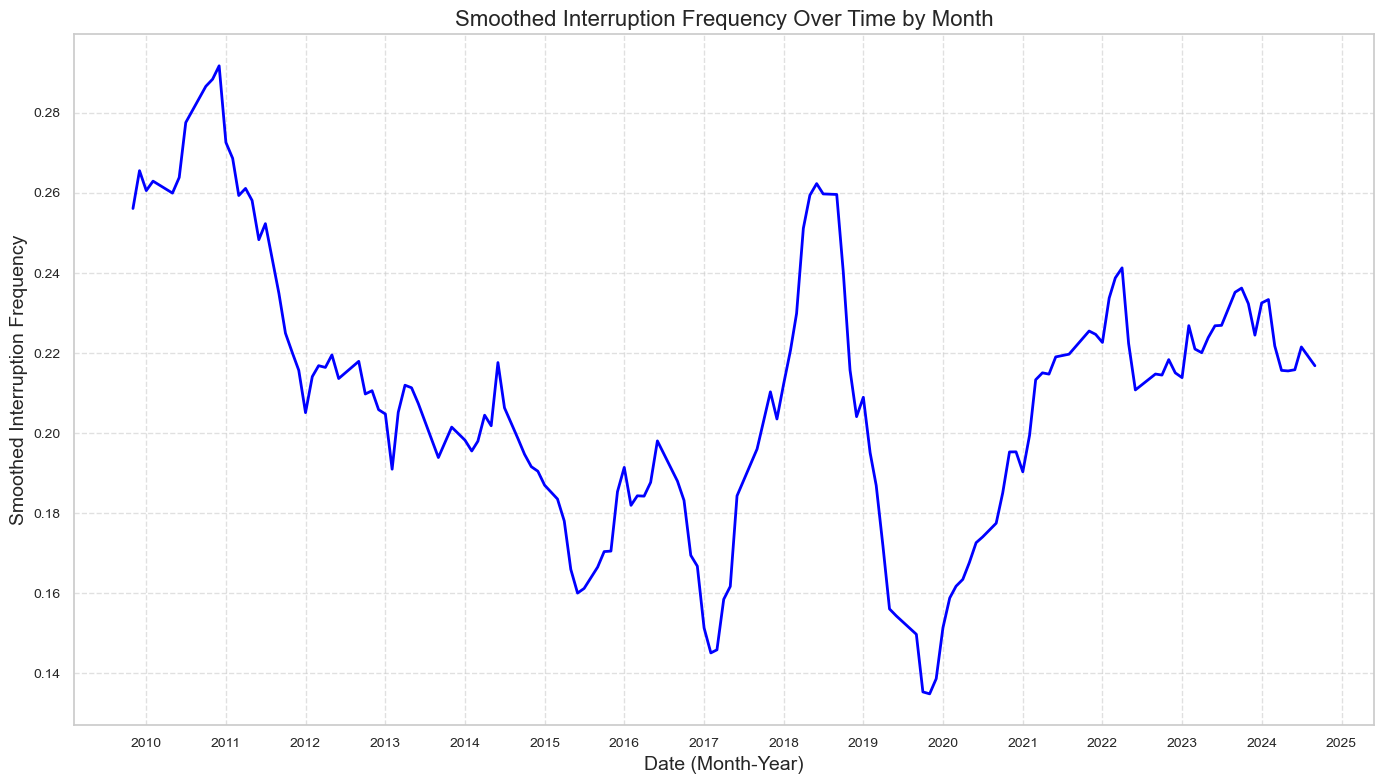

In [259]:
# Factor used to receive higher values
NORMALIZATION_FACTOR = 10000

total_reactions_per_month = comments_df.groupby(['month_year'])['id'].size().reset_index(name='total_reactions')

# Step 2: Calculate the total speaking time per month
speeches_df = debate_df[debate_df['entry_classification'].isin(['Speech', 'Short Intervention'])]
total_speaking_time_per_month = speeches_df.groupby('month_year')['speech_length'].sum().reset_index(name='total_speaking_time')

# Step 3: Merge to align total reactions with total speaking time per month
month_interruption_data = total_reactions_per_month.merge(total_speaking_time_per_month, on='month_year')

# Step 4: Calculate the interruption frequency per month
month_interruption_data['interruption_frequency'] = (
    month_interruption_data['total_reactions'] / month_interruption_data['total_speaking_time'])* NORMALIZATION_FACTOR

# Step 5: Remove outliers using the IQR method
Q1 = month_interruption_data['interruption_frequency'].quantile(0.25)
Q3 = month_interruption_data['interruption_frequency'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (month_interruption_data['interruption_frequency'] < (Q1 - 1.5 * IQR)) | \
                    (month_interruption_data['interruption_frequency'] > (Q3 + 1.5 * IQR))
month_interruption_data_no_outliers = month_interruption_data[~outlier_condition]

# Step 6: Apply a 12-month rolling average to smooth the interruption frequency
month_interruption_data_no_outliers['smoothed_interruption_frequency'] = (
    month_interruption_data_no_outliers['interruption_frequency'].rolling(window=12, min_periods=1, center=True).mean()
)

month_interruption_data_no_outliers['month_year'] = month_interruption_data_no_outliers['month_year'].dt.to_timestamp()

# Step 7: Plot the smoothed interruption frequency over time by month
plt.figure(figsize=(14, 8))

# Plotting without markers for a cleaner look
plt.plot(
    month_interruption_data_no_outliers['month_year'],
    month_interruption_data_no_outliers['smoothed_interruption_frequency'],
    color='blue',
    linewidth=2,
    linestyle='-'
)

# Set plot title and labels
plt.title('Smoothed Interruption Frequency Over Time by Month', fontsize=16)
plt.xlabel('Date (Month-Year)', fontsize=14)
plt.ylabel('Smoothed Interruption Frequency', fontsize=14)

# Format the x-axis to show dates more cleanly
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Use a date formatter to show fewer dates and improve readability
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Show labels once per year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format as Year only

# Display the plot
plt.tight_layout()

plt.savefig('smoothed_interruption_frequency_over_time.png', format='png', dpi=300)
plt.show()



#### 5.3.2 Interruption Frequency per Faction

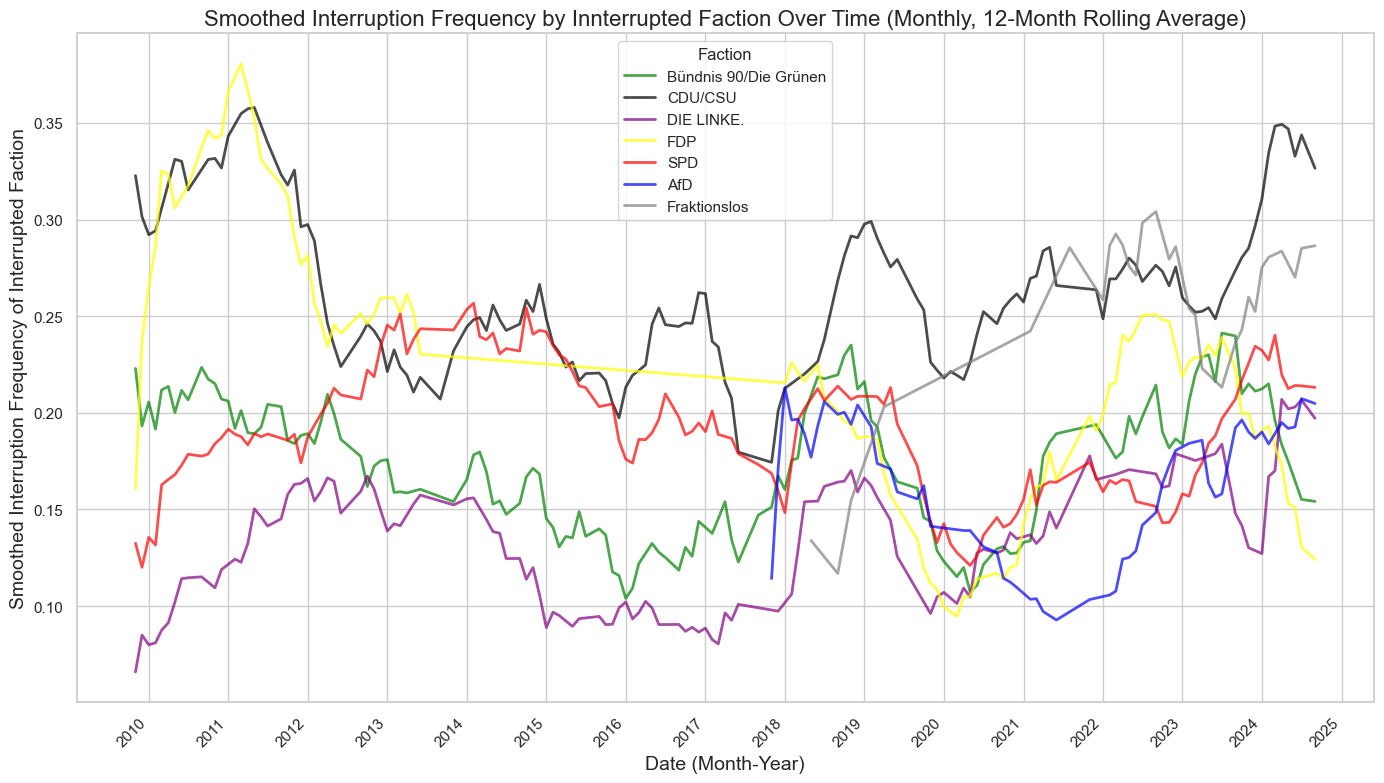

In [76]:
# Step 1: Calculate total speaking time per faction and date
# Group by 'electoral_term', 'date', and 'faction' to get the total speech length per faction on each date
speeches_df['month_year'] = speeches_df['date'].dt.to_period('M')
speech_length_df = speeches_df.groupby(['electoral_term', 'month_year', 'faction'])['speech_length'].sum().reset_index()
speech_length_df.rename(columns={'speech_length': 'speech_length_faction', 'faction': 'interrupted_faction'}, inplace=True)

comments_df['month_year'] = comments_df['date'].dt.to_period('M')
# Step 3: Merge total speaking time with `comments_df` so each comment aligns with the monthly speaking time
comments_with_speech_length = comments_df.merge(
    speech_length_df,
    left_on=['month_year', 'speech_politician_faction'],
    right_on=['month_year', 'interrupted_faction'],
    how='left'
)

# Drop unneeded columns for clarity
comments_with_speech_length.drop(columns=['speech_politician_faction', 'electoral_term_y'], inplace=True)
comments_with_speech_length.rename(columns={'electoral_term_x': 'electoral_term', 'faction': 'interrupting_faction'}, inplace=True)

# Step 4: Group by month and faction to calculate total reactions and speaking time
faction_reaction_analysis = comments_with_speech_length.groupby(
    ['month_year', 'interrupted_faction']
).agg(
    total_reactions=('id', 'size'),  # Count of reactions per faction per month
    total_speaking_time=('speech_length_faction', 'mean')  # Mean speaking time for each faction per month
).reset_index()

# Step 5: Calculate interruption frequency for each faction per month
faction_reaction_analysis['interruption_frequency'] = (
    faction_reaction_analysis['total_reactions'] / faction_reaction_analysis['total_speaking_time']
)* NORMALIZATION_FACTOR

# Replace NaN values with 0 if necessary
faction_reaction_analysis.fillna({'total_reactions': 0, 'total_speaking_time': 0}, inplace=True)

# Step 6: Remove outliers using IQR method for interruption frequency
Q1 = faction_reaction_analysis['interruption_frequency'].quantile(0.25)
Q3 = faction_reaction_analysis['interruption_frequency'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (faction_reaction_analysis['interruption_frequency'] < (Q1 - 1.5 * IQR)) | \
                    (faction_reaction_analysis['interruption_frequency'] > (Q3 + 1.5 * IQR))
faction_reaction_analysis_no_outliers = faction_reaction_analysis[~outlier_condition]

# Step 7: Apply a 12-month rolling average for smoothing
faction_reaction_analysis_no_outliers['smoothed_interruption_frequency'] = (
    faction_reaction_analysis_no_outliers.groupby('interrupted_faction')['interruption_frequency']
    .transform(lambda x: x.rolling(window=12, min_periods=1).mean())
)

faction_reaction_analysis_no_outliers['month_year'] = faction_reaction_analysis_no_outliers['month_year'].dt.to_timestamp()
# Step 8: Visualization
plt.figure(figsize=(14, 8))

# Plot each faction's smoothed interruption frequency over time
for faction in faction_reaction_analysis_no_outliers['interrupted_faction'].unique():
    faction_data = faction_reaction_analysis_no_outliers[
        faction_reaction_analysis_no_outliers['interrupted_faction'] == faction
    ]
    
    plt.plot(
        faction_data['month_year'],
        faction_data['smoothed_interruption_frequency'],
        label=faction,
        color=color_map.get(faction, 'gray'),
        linewidth=2,
        alpha=0.7
    )

# Customize plot appearance
plt.title('Smoothed Interruption Frequency by Interrupted Faction Over Time (Monthly, 12-Month Rolling Average)', fontsize=16)
plt.xlabel('Date (Month-Year)', fontsize=14)
plt.ylabel('Smoothed Interruption Frequency of Interrupted Faction', fontsize=14)
plt.legend(title='Faction')
plt.grid(True)

# Format x-axis for better readability
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


#### 5.3.3 Interruption Frequency per Faction and Interrupting Faction

This section computes the interruption frequency matrix, normalized by total speaking time per faction within each electoral term. Key steps are:
1. Grouping interruption counts by `electoral_term`, `interrupting_faction`, and `interrupted_faction`.
2. Summing total speaking time for each faction in each electoral term.
3. Calculating interruption frequency by dividing reactions by total speaking time and scaling results.
4. Creating a heatmap for each electoral term to show faction-wise interruption frequencies.


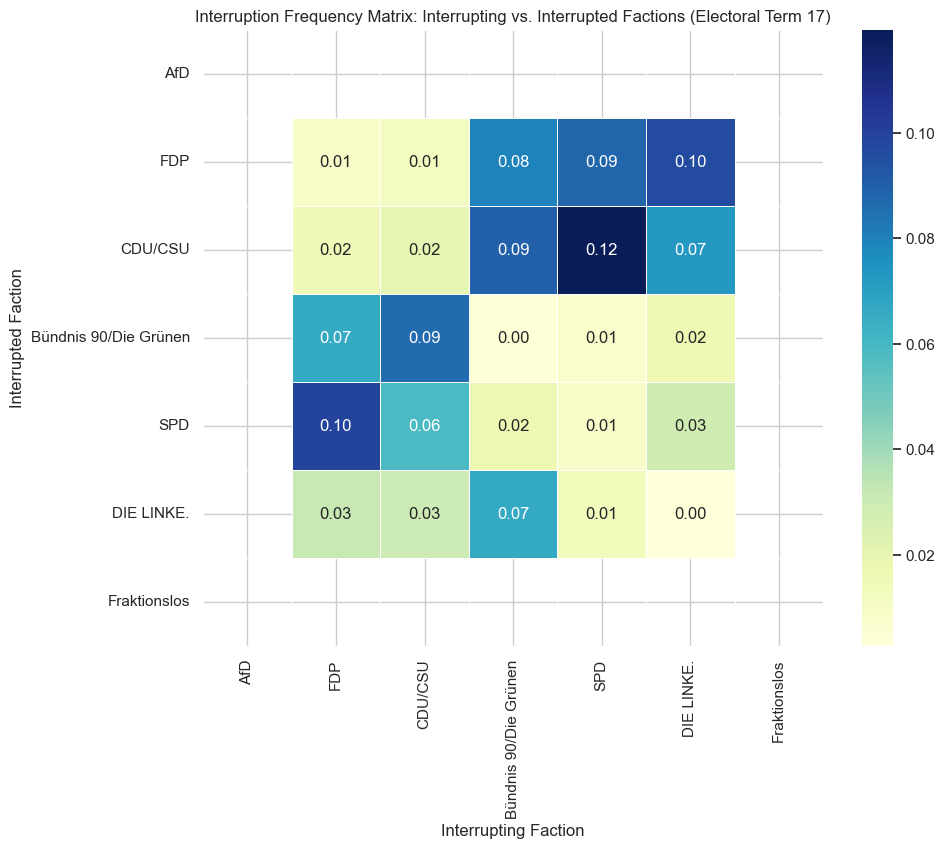

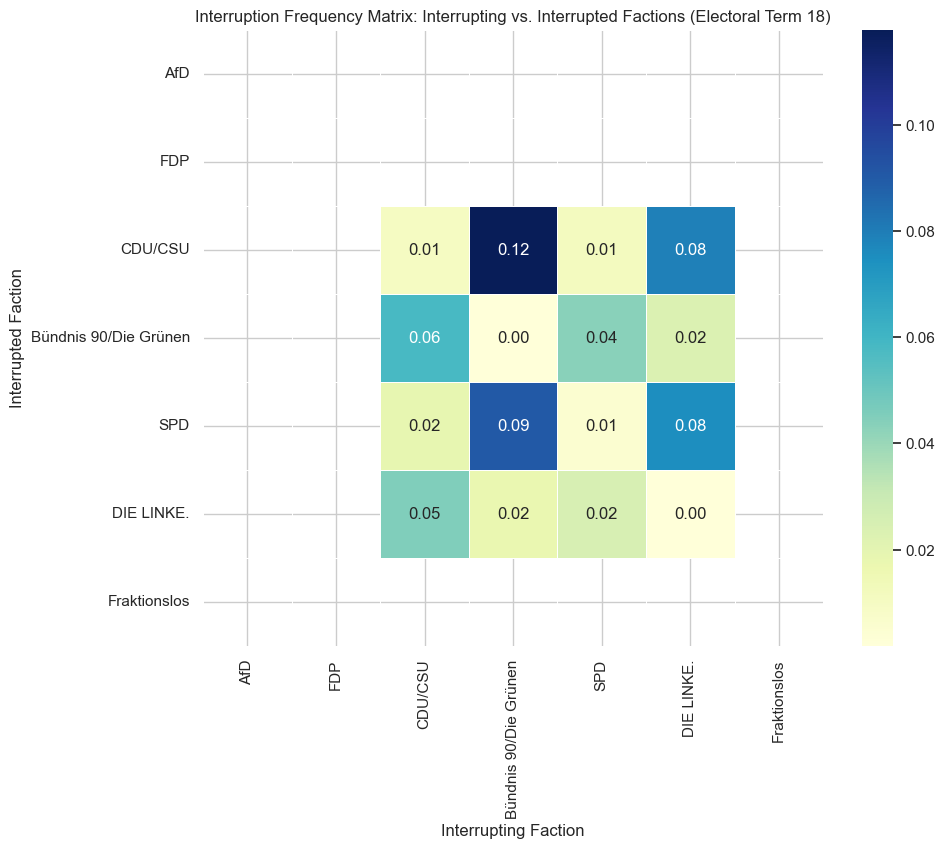

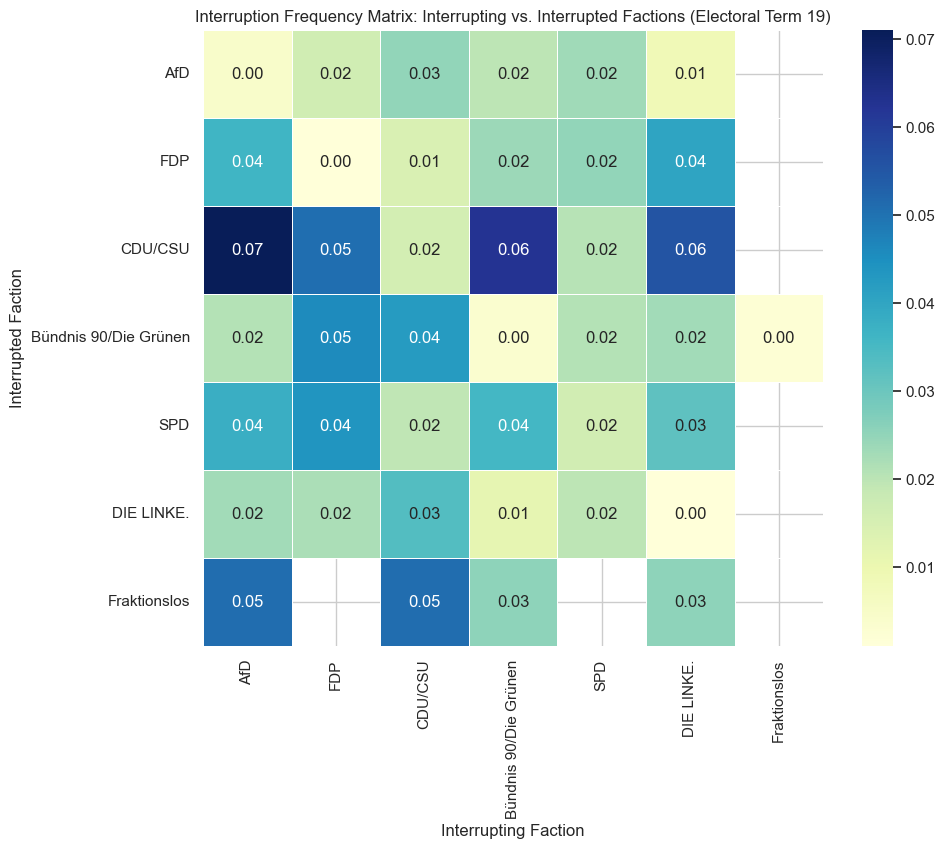

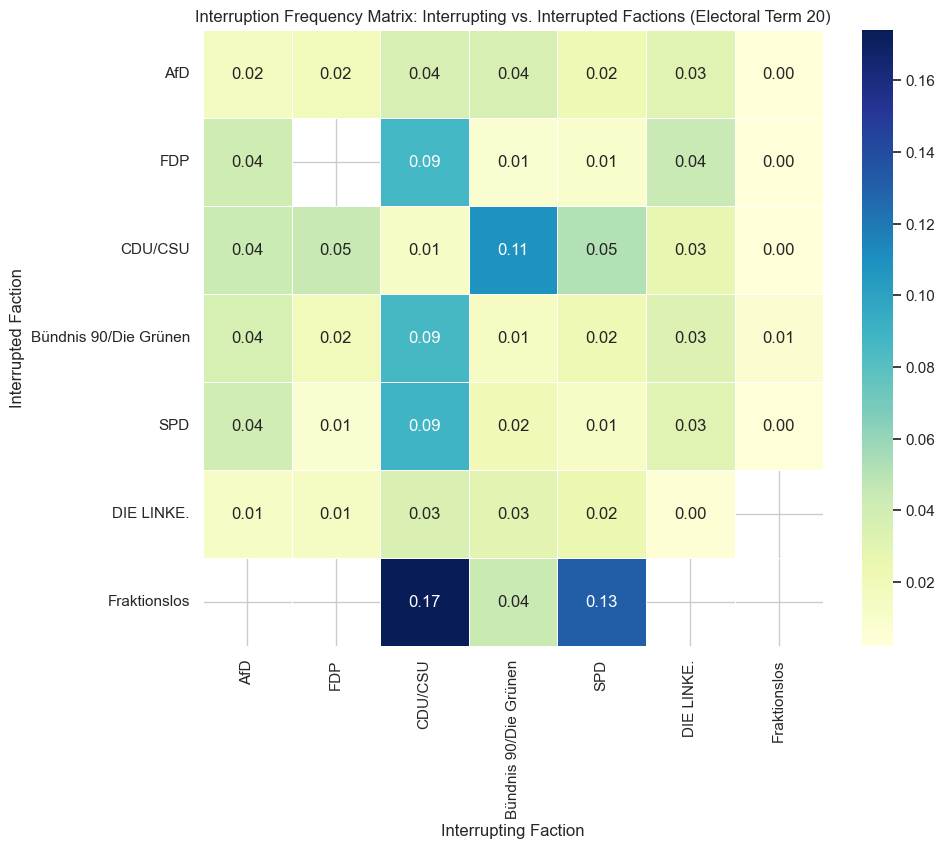

In [52]:
# Step 1: Calculate the total number of reactions from each interrupting faction towards each interrupted faction, grouped by electoral term
interruption_counts = comments_with_speech_length.groupby(['electoral_term', 'interrupting_faction', 'interrupted_faction']).size().reset_index(name='total_reactions')

# Step 2: Calculate the total speaking time for each interrupted faction in each electoral term
total_speaking_time = speech_length_df.groupby(['electoral_term', 'interrupted_faction'])['speech_length_faction'].sum().reset_index()
total_speaking_time.rename(columns={'speech_length_faction': 'total_speaking_time'}, inplace=True)

# Step 3: Merge the total reactions with the total speaking time of each interrupted faction in each electoral term
interruption_matrix = interruption_counts.merge(total_speaking_time, on=['electoral_term', 'interrupted_faction'])

# Step 4: Calculate the interruption frequency
interruption_matrix['interruption_frequency'] = (interruption_matrix['total_reactions'] / interruption_matrix['total_speaking_time']) * NORMALIZATION_FACTOR

# Step 5: Pivot the data to create a matrix format per electoral term and plot each matrix
for term in interruption_matrix['electoral_term'].unique():
    term_data = interruption_matrix[interruption_matrix['electoral_term'] == term]
    interruption_matrix_pivot = term_data.pivot(index='interrupted_faction', columns='interrupting_faction', values='interruption_frequency')

    # Reindex to enforce faction order for both rows and columns
    interruption_matrix_pivot = interruption_matrix_pivot.reindex(index=faction_order, columns=faction_order)

    # Plot the matrix as a heatmap for the current electoral term
    plt.figure(figsize=(10, 8))
    sns.heatmap(interruption_matrix_pivot, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
    plt.title(f"Interruption Frequency Matrix: Interrupting vs. Interrupted Factions (Electoral Term {term})")
    plt.xlabel("Interrupting Faction")
    plt.ylabel("Interrupted Faction")
    plt.show()

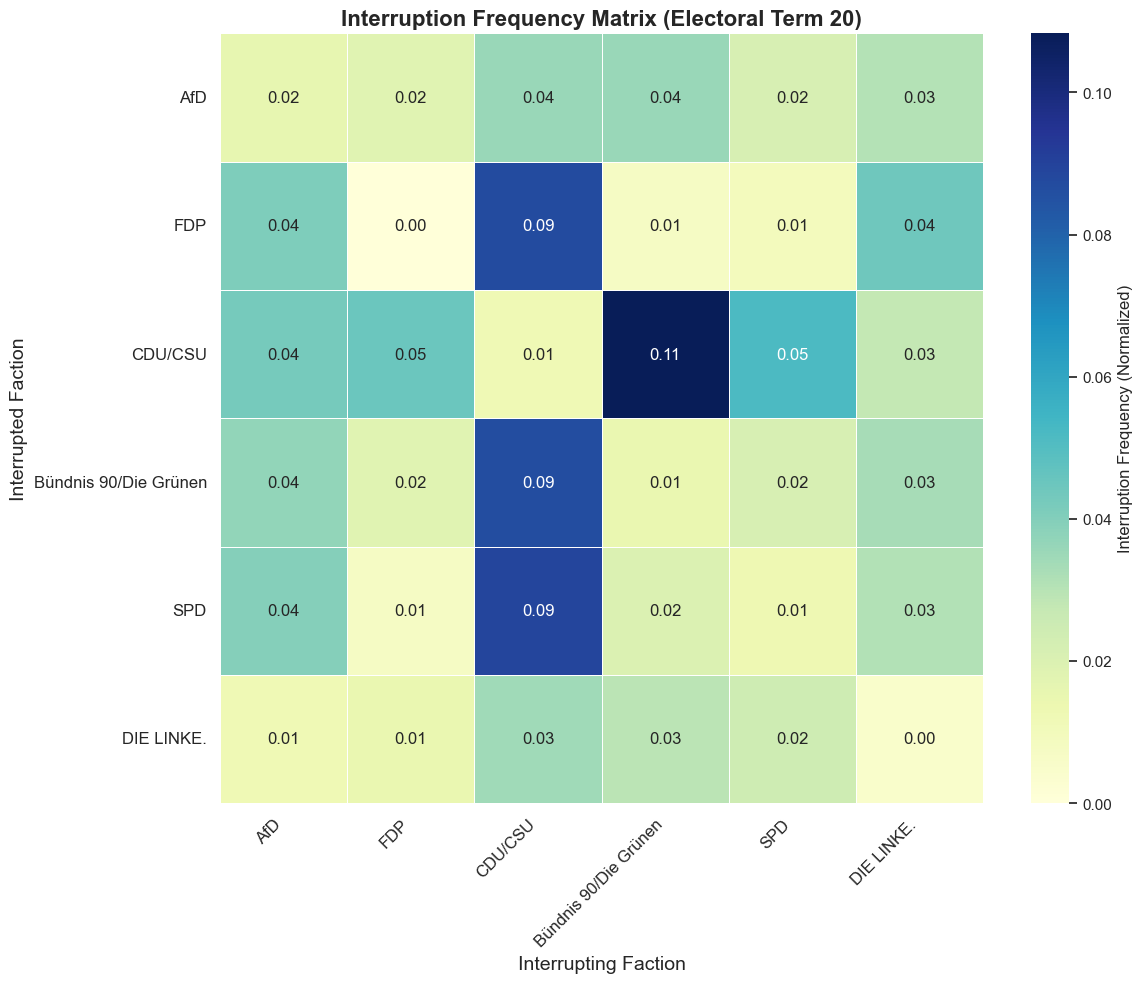

In [258]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for electoral term 20
term_20_data_interruption = interruption_matrix[(interruption_matrix['electoral_term'] == 20)&(interruption_matrix['interrupted_faction']!='Fraktionslos')&(interruption_matrix['interrupting_faction']!='Fraktionslos')]

# Create the pivot table for electoral term 20
interruption_matrix_pivot = term_20_data_interruption.pivot(
    index='interrupted_faction', 
    columns='interrupting_faction', 
    values='interruption_frequency'
)

interruption_matrix_pivot = interruption_matrix_pivot.fillna(0)

# Reindex to enforce faction order for both rows and columns
faction_order = ['AfD', 'FDP', 'CDU/CSU', 'Bündnis 90/Die Grünen', 'SPD', 'DIE LINKE.']
interruption_matrix_pivot = interruption_matrix_pivot.reindex(
    index=faction_order, 
    columns=faction_order
)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.set_theme(style="whitegrid")  # Apply a clean seaborn style

# Create the heatmap with better color contrast and formatting
sns.heatmap(
    interruption_matrix_pivot, 
    annot=True, 
    fmt=".2f", 
    cmap="YlGnBu", 
    linewidths=.5,
    cbar_kws={'label': 'Interruption Frequency (Normalized)'}
)

# Add titles and axis labels
plt.title("Interruption Frequency Matrix (Electoral Term 20)", fontsize=16, weight='bold')
plt.xlabel("Interrupting Faction", fontsize=14)
plt.ylabel("Interrupted Faction", fontsize=14)

# Adjust tick labels for readability
plt.xticks(fontsize=12, rotation=45, ha="right")
plt.yticks(fontsize=12, rotation=0)

# Optimize layout for presentation
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('interruption_frequency_matrix.png', format='png', dpi=300)

# Show the plot
plt.show()


#### Interruptions over time electoral term 20 - governing factions

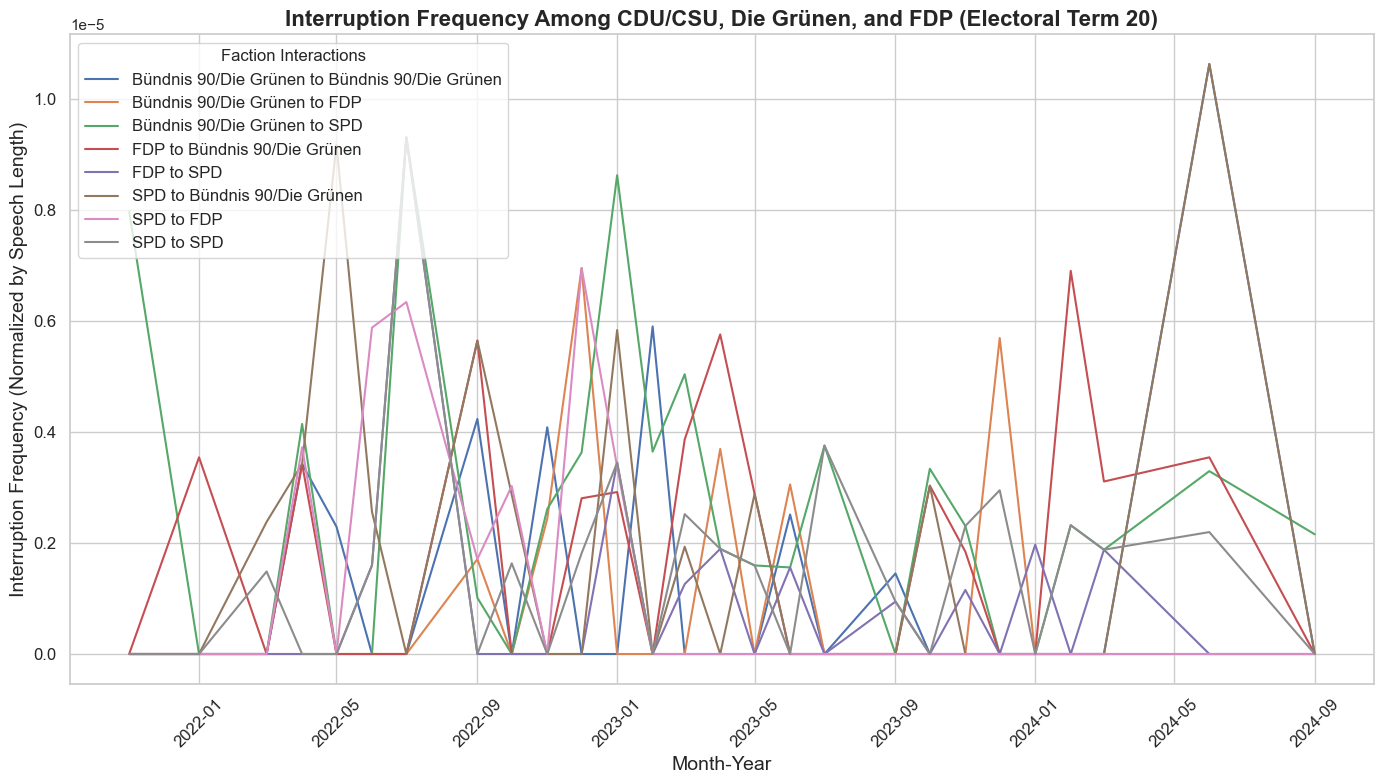

In [150]:
# Filter data for term 20
term_20_data = comments_with_speech_length[comments_with_speech_length['electoral_term'] == 20]

# List of factions to analyze
factions_of_interest = ['SPD', 'Bündnis 90/Die Grünen', 'FDP']

# Filter data for the factions of interest
term_20_data_filtered = term_20_data[
    (term_20_data['interrupting_faction'].isin(factions_of_interest)) &
    (term_20_data['interrupted_faction'].isin(factions_of_interest))
]


# Step 1: Calculate total interruptions by month and faction
interruption_counts = term_20_data_filtered.groupby(
    ['month_year', 'interrupting_faction', 'interrupted_faction']
).size().reset_index(name='total_reactions')

# Step 2: Calculate total speaking time by month and faction
speech_length_by_month = (
    speech_length_df[speech_length_df['electoral_term'] == 20]
    .groupby(['month_year', 'interrupted_faction'])['speech_length_faction']
    .sum()
    .reset_index()
    .rename(columns={'speech_length_faction': 'total_speaking_time'})
)

# Step 3: Merge interruption counts with total speaking time
interruption_with_speech_length = interruption_counts.merge(
    speech_length_by_month,
    on=['month_year', 'interrupted_faction'],
    how='left'
)

# Step 4: Calculate interruption frequency
interruption_with_speech_length['interruption_frequency'] = (
    interruption_with_speech_length['total_reactions'] / interruption_with_speech_length['total_speaking_time']
)

interruption_with_speech_length['month_year'] = interruption_with_speech_length['month_year'].dt.to_timestamp()
# Pivot data for plotting
pivoted_data = interruption_with_speech_length.pivot_table(
    index='month_year',
    columns=['interrupting_faction', 'interrupted_faction'],
    values='interruption_frequency',
    fill_value=0
)

# Flatten the multi-index columns for easy plotting
pivoted_data.columns = [' to '.join(col) for col in pivoted_data.columns]
pivoted_data.reset_index(inplace=True)

# Plotting the line chart
plt.figure(figsize=(14, 8))
for column in pivoted_data.columns[1:]:  # Skip 'month_year'
    sns.lineplot(data=pivoted_data, x='month_year', y=column, label=column)

# Customize the chart
plt.title('Interruption Frequency Among SPD, Die Grünen, and FDP (Electoral Term 20)', fontsize=16, weight='bold')
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Interruption Frequency (Normalized by Speech Length)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Faction Interactions', fontsize=12, loc='upper left')
plt.tight_layout()

# save plot

# Show the chart
plt.show()

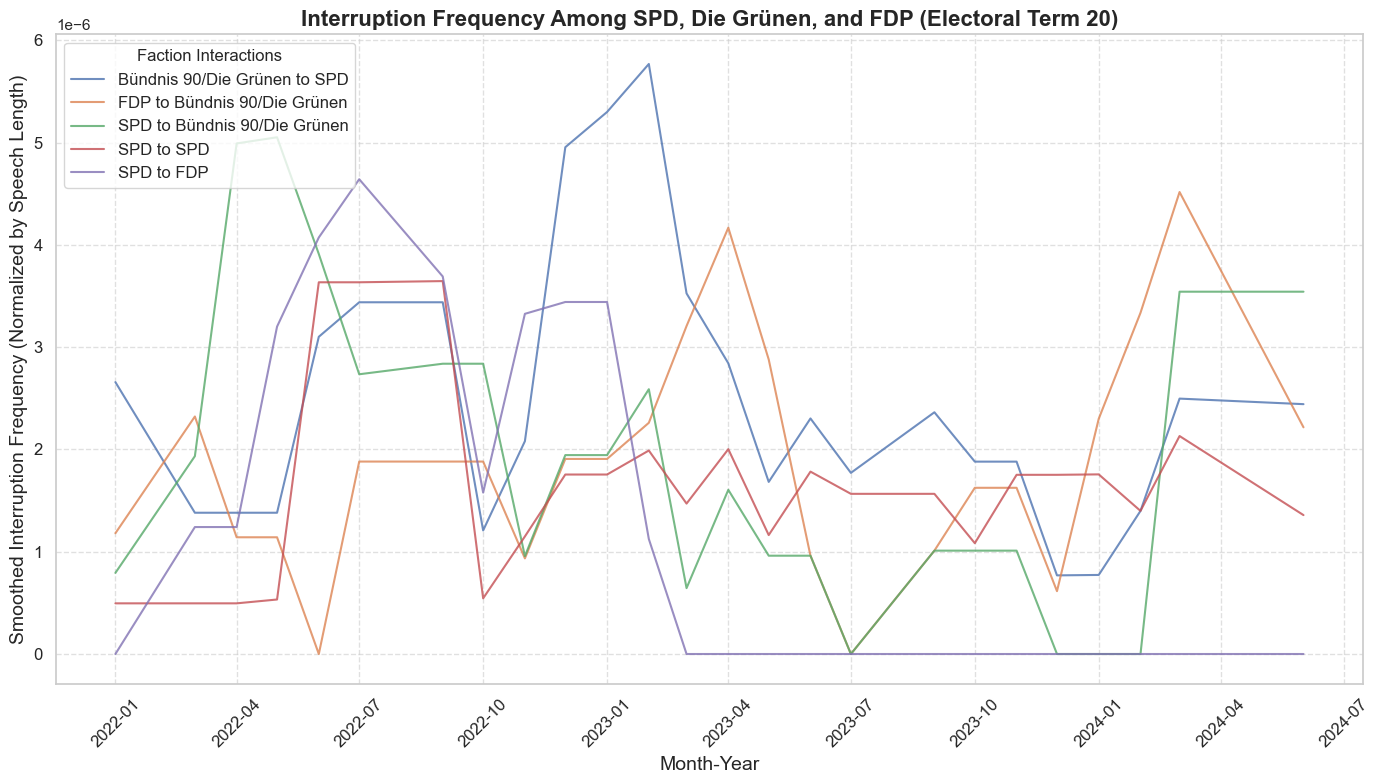

In [260]:
# Filter data for term 20
term_20_data = comments_with_speech_length[comments_with_speech_length['electoral_term'] == 20]

# List of factions to analyze
factions_of_interest = ['SPD', 'Bündnis 90/Die Grünen', 'FDP']

# Filter data for the factions of interest
term_20_data_filtered = term_20_data[
    (term_20_data['interrupting_faction'].isin(factions_of_interest)) &
    (term_20_data['interrupted_faction'].isin(factions_of_interest))
]

# Step 1: Calculate total interruptions by month and faction
interruption_counts = term_20_data_filtered.groupby(
    ['month_year', 'interrupting_faction', 'interrupted_faction']
).size().reset_index(name='total_reactions')

# Step 2: Calculate total speaking time by month and faction
speech_length_by_month = (
    speech_length_df[speech_length_df['electoral_term'] == 20]
    .groupby(['month_year', 'interrupted_faction'])['speech_length_faction']
    .sum()
    .reset_index()
    .rename(columns={'speech_length_faction': 'total_speaking_time'})
)

# Step 3: Merge interruption counts with total speaking time
interruption_with_speech_length = interruption_counts.merge(
    speech_length_by_month,
    on=['month_year', 'interrupted_faction'],
    how='left'
)

# Step 4: Calculate interruption frequency
interruption_with_speech_length['interruption_frequency'] = (
    interruption_with_speech_length['total_reactions'] / interruption_with_speech_length['total_speaking_time']
)

interruption_with_speech_length['month_year'] = interruption_with_speech_length['month_year'].dt.to_timestamp()

# Pivot data for plotting
pivoted_data = interruption_with_speech_length.pivot_table(
    index='month_year',
    columns=['interrupting_faction', 'interrupted_faction'],
    values='interruption_frequency',
    fill_value=0
)

# Flatten the multi-index columns for easy plotting
pivoted_data.columns = [' to '.join(col) for col in pivoted_data.columns]
pivoted_data.reset_index(inplace=True)

# Apply a 3-month rolling average to smooth data
smoothed_data = pivoted_data.copy()
for column in smoothed_data.columns[1:]:  # Skip 'month_year'
    smoothed_data[column] = smoothed_data[column].rolling(window=3, center=True).mean()

# Identify top N interactions by total interruption frequency
top_interactions = smoothed_data.iloc[:, 1:].sum(axis=0).sort_values(ascending=False).head(5).index

# Plotting the line chart
plt.figure(figsize=(14, 8))
for column in top_interactions:
    sns.lineplot(
        data=smoothed_data, 
        x='month_year', 
        y=column, 
        label=column, 
        alpha=0.8
    )

# Customize the chart
plt.title('Interruption Frequency Among SPD, Die Grünen, and FDP (Electoral Term 20)', fontsize=16, weight='bold')
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Smoothed Interruption Frequency (Normalized by Speech Length)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Faction Interactions', fontsize=12, loc='upper left')
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.savefig('Interruption Frequency Governing Parties Electoral Term 20.png', format='png', dpi=300)

# Show the chart
plt.show()


### 5.4 Interruptions - Governing vs. opposition

This section analyzes interruptions between governing and opposition factions by electoral term. Key steps:
1. Assigning each faction as either Governing or Opposition based on electoral term.
2. Calculating reactions and total speaking time for Governing vs. Opposition within each term.
3. Calculating interruption frequency and visualizing these frequencies with heatmaps for each term.


#### 5.4.1 Interruptions - Governing vs. opposition by elecotral term

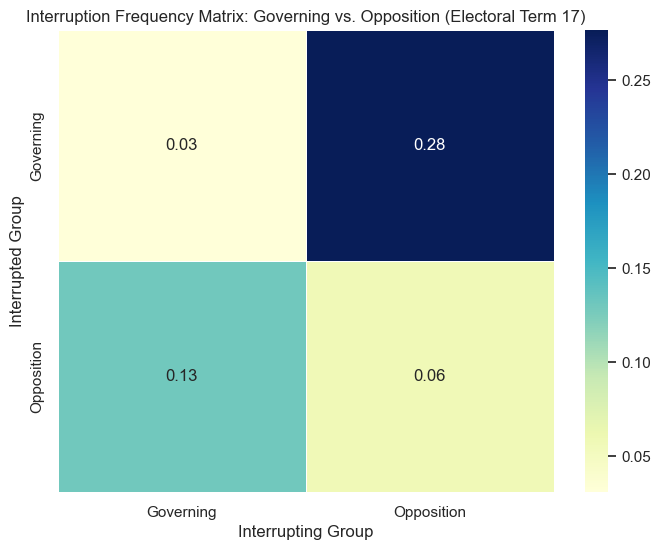

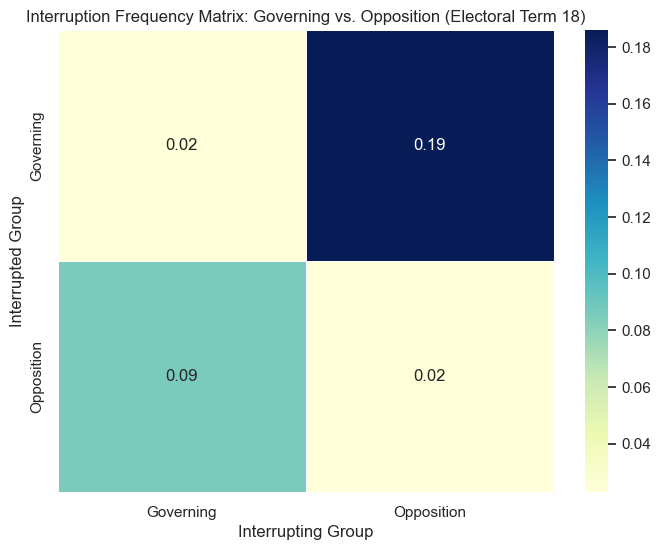

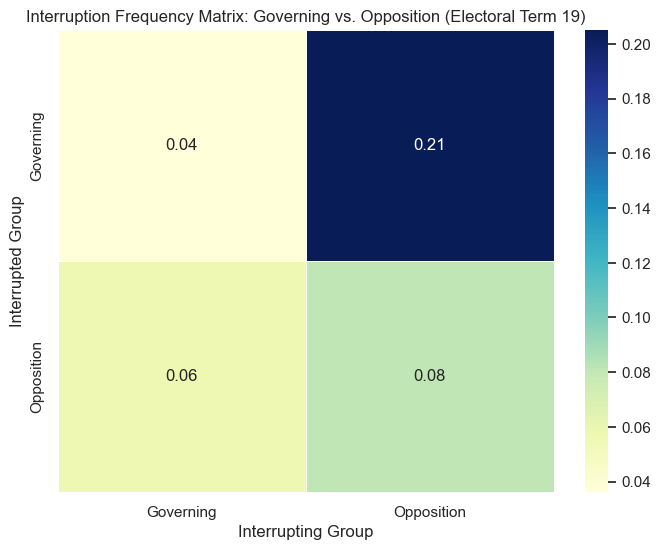

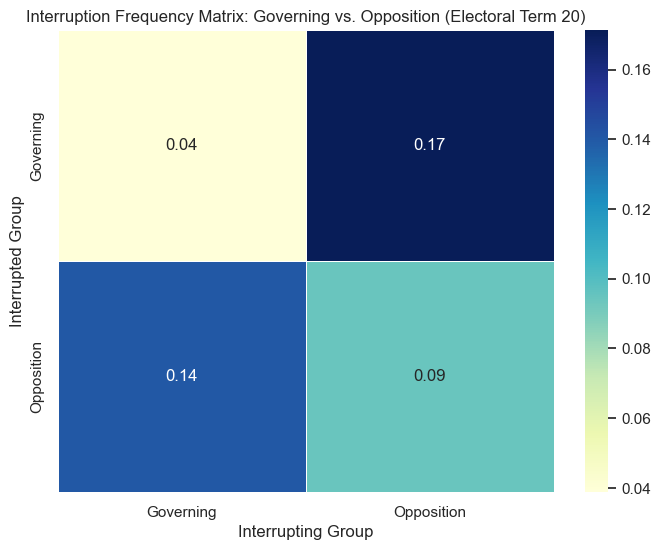

In [78]:
# Define governing parties for each electoral term
regierung_17 = ['CDU/CSU', 'FDP']
regierung_18 = ['CDU/CSU', 'SPD']
regierung_19 = ['CDU/CSU', 'SPD']
regierung_20 = ['SPD', 'FDP', 'Bündnis 90/Die Grünen']

# Map each electoral term to its governing parties
regierung_mapping = {
    17: regierung_17,
    18: regierung_18,
    19: regierung_19,
    20: regierung_20
}


# Function to label factions as Governing or Opposition based on electoral term
def label_governing_opposition(row, faction_column, term_column, regierung_mapping):
    term = row[term_column]
    if term in regierung_mapping:
        if row[faction_column] in regierung_mapping[term]:
            return 'Governing'
        else:
            return 'Opposition'
    return np.nan  # For rows without a matching electoral term

# Apply the label function to both interrupting and interrupted factions
comments_with_speech_length['interrupting_group'] = comments_with_speech_length.apply(
    lambda row: label_governing_opposition(row, 'interrupting_faction', 'electoral_term', regierung_mapping), axis=1
)
comments_with_speech_length['interrupted_group'] = comments_with_speech_length.apply(
    lambda row: label_governing_opposition(row, 'interrupted_faction', 'electoral_term', regierung_mapping), axis=1
)

# Filter out rows with missing group labels
comments_with_speech_length = comments_with_speech_length.dropna(subset=['interrupting_group', 'interrupted_group'])

# Step 1: Calculate the total number of reactions between Governing and Opposition groups for each electoral term
interruption_counts_group = comments_with_speech_length.groupby(['electoral_term', 'interrupting_group', 'interrupted_group']).size().reset_index(name='total_reactions')

# Step 2: Calculate the total speaking time for each group in each electoral term
# Label factions in `speech_length_df` as Governing or Opposition based on `interrupted_faction`
speech_length_df['group'] = speech_length_df.apply(
    lambda row: label_governing_opposition(row, 'interrupted_faction', 'electoral_term', regierung_mapping), axis=1
)
# Filter out rows with missing group labels
speech_length_df = speech_length_df.dropna(subset=['group'])

# Calculate the total speaking time by group and electoral term
total_speaking_time_group = speech_length_df.groupby(['electoral_term', 'group'])['speech_length_faction'].sum().reset_index()
total_speaking_time_group.rename(columns={'group': 'interrupted_group', 'speech_length_faction': 'total_speaking_time'}, inplace=True)

# Step 3: Merge interruption counts with total speaking time to calculate interruption frequency
interruption_matrix_group = interruption_counts_group.merge(total_speaking_time_group, on=['electoral_term', 'interrupted_group'])

# Step 4: Calculate the interruption frequency
interruption_matrix_group['interruption_frequency'] = (interruption_matrix_group['total_reactions'] / interruption_matrix_group['total_speaking_time']) * NORMALIZATION_FACTOR

# Step 5: Pivot and plot the matrix for each electoral term
for term in interruption_matrix_group['electoral_term'].unique():
    term_data = interruption_matrix_group[interruption_matrix_group['electoral_term'] == term]
    interruption_matrix_pivot = term_data.pivot(index='interrupted_group', columns='interrupting_group', values='interruption_frequency')

    # Plot the matrix as a heatmap for the current electoral term
    plt.figure(figsize=(8, 6))
    sns.heatmap(interruption_matrix_pivot, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
    plt.title(f"Interruption Frequency Matrix: Governing vs. Opposition (Electoral Term {term})")
    plt.xlabel("Interrupting Group")
    plt.ylabel("Interrupted Group")
    plt.show()

#### 5.4.2 Interruptions - Governing vs. opposition - time development

This section extends the Governing vs. Opposition analysis by tracking interruption frequency over time, grouped by date. The approach involves:
1. Calculating daily reactions and speaking time for Governing and Opposition groups.
2. Smoothing with a 90-day rolling average, then downsampling to a monthly frequency.
3. Visualizing trends in interruption frequency by date to highlight temporal shifts between Governing and Opposition.


In [74]:
comments_with_speech_length

id  electoral_term  session  first_name  \
0      729717              17        4      markus   
1      729728              17        4    hubertus   
2      729743              17        4       anton   
3      729748              17        4  heinrich l   
4      729752              17        4      volker   
...       ...             ...      ...         ...   
6613  1072021              20      186   christian   
6614  1075832              20      187     corinna   
6615  1075836              20      187        mike   
6616  1075904              20      187      julian   
6617  1075908              20      187     beatrix   

                                           document_url   last_name  \
0     https://dip21.bundestag.de/dip21/btp/17/17004.pdf       kurth   
1     https://dip21.bundestag.de/dip21/btp/17/17004.pdf        heil   
2     https://dip21.bundestag.de/dip21/btp/17/17004.pdf      schaaf   
3     https://dip21.bundestag.de/dip21/btp/17/17004.pdf        kolb   
4     https://dip21.bundestag.de/dip21/btp/17/17004.pdf        beck   
...                                                 ...         ...   
6613  https://dip21.bundestag.de/dip21/btp/20/20186.pdf       haase   
6614  https://dip21.bundestag.de/dip21/btp/20/20187.pdf      rüffer   
6615  https://dip21.bundestag.de/dip21/btp/20/20187.pdf     moncsek   
6616  https://dip21.bundestag.de/dip21/btp/20/20187.pdf      pahlke   
6617  https://dip21.bundestag.de/dip21/btp/20/20187.pdf  von storch   

      faction_id        position_short position_long  politician_id  ...  \
0              4  Member of Parliament                     11003578  ...   
1             25  Member of Parliament                     11003142  ...   
2             25  Member of Parliament                     11003623  ...   
3             15  Member of Parliament                     11001171  ...   
4              4  Member of Parliament                     11002625  ...   
...          ...                   ...           ...            ...  ...   
6613           5  Member of Parliament                     11004286  ...   
6614           4  Member of Parliament                     11004390  ...   
6615           0  Member of Parliament                     11005156  ...   
6616           4  Member of Parliament                     11005173  ...   
6617           0  Member of Parliament                     11004905  ...   

     sub_category main_category content_category entry_classification  \
0         Request        Debate           Debate  Question or Comment   
1         Request        Debate           Debate  Question or Comment   
2         Request        Debate           Debate  Question or Comment   
3         Request        Debate           Debate  Question or Comment   
4         Request        Debate           Debate  Question or Comment   
...           ...           ...              ...                  ...   
6613        Other         Other           Debate  Question or Comment   
6614      Request        Debate            Other  Question or Comment   
6615      Request        Debate            Other  Question or Comment   
6616      Request        Debate            Other  Question or Comment   
6617      Request        Debate            Other  Question or Comment   

     speech_politician  month_year  interrupting_group    interrupted_faction  \
0           11003823.0     2009-11          Opposition  Bündnis 90/Die Grünen   
1           11003839.0     2009-11          Opposition                CDU/CSU   
2           11002812.0     2009-11          Opposition                CDU/CSU   
3           11002812.0     2009-11           Governing                CDU/CSU   
4           11002812.0     2009-11          Opposition                CDU/CSU   
...                ...         ...                 ...                    ...   
6613        11003530.0     2024-09          Opposition                    FDP   
6614        11005097.0     2024-09           Governing                 

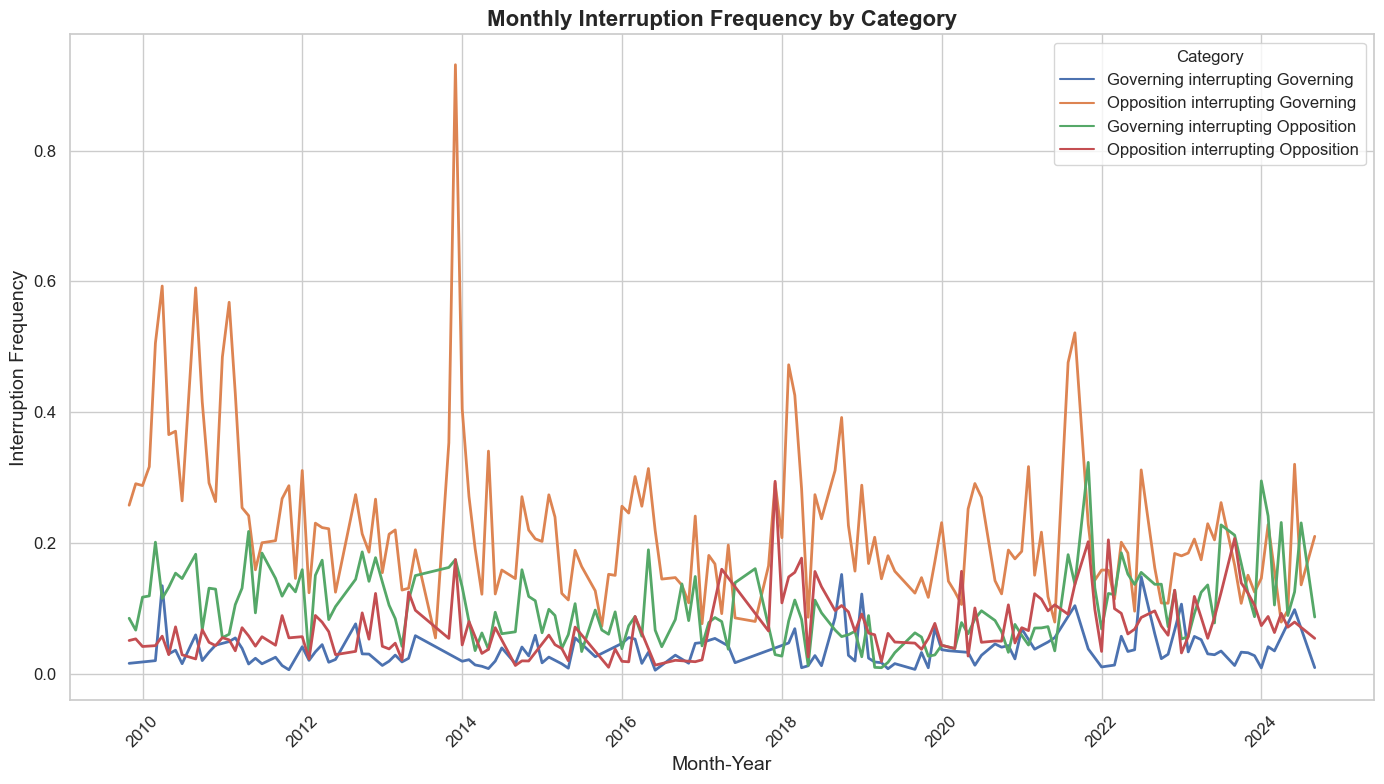

In [82]:
# Step 1: Add a `month_year` column for monthly aggregation
comments_with_speech_length['month_year'] = comments_with_speech_length['date'].dt.to_period('M')

# Step 2: Group by `month_year`, `interrupting_group`, and `interrupted_group` to calculate the monthly counts
monthly_interruption_counts = comments_with_speech_length.groupby(
    ['month_year', 'interrupting_group', 'interrupted_group']
).size().reset_index(name='total_reactions')

# Step 3: Aggregate total speaking time for each group by `month_year`
monthly_speaking_time = speech_length_df.groupby(
    ['month_year', 'group']
)['speech_length_faction'].sum().reset_index()
monthly_speaking_time.rename(columns={'group': 'interrupted_group', 'speech_length_faction': 'total_speaking_time'}, inplace=True)

# Step 4: Merge interruption counts with speaking time
monthly_interruption_data = monthly_interruption_counts.merge(
    monthly_speaking_time,
    on=['month_year', 'interrupted_group']
)

# Step 5: Calculate interruption frequency for each category
monthly_interruption_data['interruption_frequency'] = (
    monthly_interruption_data['total_reactions'] / monthly_interruption_data['total_speaking_time']
) * NORMALIZATION_FACTOR

# Step 6: Filter the data for clear categories
categories = ['Governing', 'Opposition']
monthly_interruption_data = monthly_interruption_data[
    monthly_interruption_data['interrupting_group'].isin(categories) &
    monthly_interruption_data['interrupted_group'].isin(categories)
]

# Step 7: Create separate dataframes for each of the four categories
monthly_interruption_data['category'] = monthly_interruption_data['interrupting_group'] + ' interrupting ' + monthly_interruption_data['interrupted_group']

monthly_interruption_data['month_year'] = monthly_interruption_data['month_year'].dt.to_timestamp()

# Step 8: Plot the time development for each category
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=monthly_interruption_data,
    x='month_year',
    y='interruption_frequency',
    hue='category',
    linewidth=2
)

# Customize the plot
plt.title('Monthly Interruption Frequency by Category', fontsize=16, weight='bold')
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Interruption Frequency', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Category', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


## 6. Contributions Dataframe Statistics

In [55]:
# merge contributions_df on content_subset_with_classification based on speech_id
content_subset_with_classification_contribution = content_subset_with_classification.merge(
    contributions_exploded[['speech_id', 'matched_factions', 'matched_reactions']],
    left_on='id',
    right_on='speech_id',
    how='left'
)

In [56]:
# Create a dictionary mapping faction IDs to faction names
faction_name_mapping = dict(zip(factions_raw['id'], factions_raw['abbreviation']))

# Define the function to map faction IDs to names, handling potential issues
def map_factions_to_names(faction_list):
    # Check if faction_list is a valid list, otherwise return as-is
    if isinstance(faction_list, list):
        # Convert each faction ID to the corresponding name or 'Unknown' if ID is not found
        return [faction_name_mapping.get(faction_id, 'Unknown') for faction_id in faction_list]
    elif pd.notna(faction_list):  # If it's a single ID, convert directly
        return faction_name_mapping.get(faction_list, 'Unknown')
    return faction_list  # Return NaN or None values as they are

# Apply the mapping function to 'matched_factions' column
content_subset_with_classification_contribution['matched_factions_name'] = content_subset_with_classification_contribution['matched_factions'].apply(map_factions_to_names)

#filter out all position_short presidium of parliament
content_subset_with_classification_contribution = content_subset_with_classification_contribution[content_subset_with_classification_contribution['position_short'] != 'Presidium of Parliament']

In [57]:
term_18_data = content_subset_with_classification_contribution[content_subset_with_classification_contribution['electoral_term'] == 18]

#Get the unique reaction types in the data
reaction_types = term_18_data['matched_reactions'].unique()

# Dictionary to hold the count matrix for each reaction type
reaction_matrices = {}

# Loop over each reaction type to create separate matrices
for reaction in reaction_types:
    # Filter for the specific reaction type
    reaction_data = term_18_data[term_18_data['matched_reactions'] == reaction]

    # Create a pivot table counting how often each faction (in rows) reacted toward each other faction (in columns)
    reaction_matrix = reaction_data.pivot_table(
        index='faction',  # Assuming 'faction_id' identifies the faction doing the reaction
        columns='matched_factions_name',  # The faction being reacted to
        values='matched_reactions',  # The reaction type we're counting
        aggfunc='size',  # Count occurrences
        fill_value=0  # Fill NaN with 0 for counts
    )

    # Store the matrix in the dictionary with the reaction type as the key
    reaction_matrices[reaction] = reaction_matrix

# Display matrices for each reaction type
for reaction, matrix in reaction_matrices.items():
    print(f"Reaction Type: {reaction}")
    display(matrix)  # Using display to show each matrix clearly

Reaction Type: nan


Empty DataFrame
Columns: []
Index: []

Reaction Type: Comment


matched_factions_name  Bündnis 90/Die Grünen  CDU/CSU  DIE LINKE.  FDP  SPD  \
faction                                                                       
                                          45        8           9    0    7   
Bündnis 90/Die Grünen                   1464     1030         733    0  600   
CDU/CSU                                 2566     1729        1455    1  937   
DIE LINKE.                              1140      726         640    1  413   
Fraktionslos                               0        1           0    0    1   
SPD                                     1871     1272        1039    0  698   

matched_factions_name  Unknown  
faction                         
                             0  
Bündnis 90/Die Grünen        0  
CDU/CSU                      1  
DIE LINKE.                   0  
Fraktionslos                 0  
SPD                          0

Reaction Type: Applause


matched_factions_name  AfD  Bündnis 90/Die Grünen  CDU/CSU  DIE LINKE.  FDP  \
faction                                                                       
                         0                     39       64          33    0   
Bündnis 90/Die Grünen    1                   2297     3541        2265    0   
CDU/CSU                  0                   3407     5935        3828    3   
DIE LINKE.               2                   1488     2415        1542    0   
SPD                      1                   2508     4292        2677    1   

matched_factions_name   SPD  Unknown  
faction                               
                         61        0  
Bündnis 90/Die Grünen  3485      166  
CDU/CSU                5693      233  
DIE LINKE.             2427       77  
SPD                    4234      131

Reaction Type: Objection


matched_factions_name  Bündnis 90/Die Grünen  CDU/CSU  DIE LINKE.  SPD
faction                                                               
                                           1        1           0    1
Bündnis 90/Die Grünen                     19       22          26   14
CDU/CSU                                   29       30          40   37
DIE LINKE.                                15       26          28   14
SPD                                       25       25          21   23

Reaction Type: Cheerfulness


matched_factions_name  Bündnis 90/Die Grünen  CDU/CSU  DIE LINKE.  SPD  \
faction                                                                  
                                           0        4           1    3   
Bündnis 90/Die Grünen                     28       84          24   74   
CDU/CSU                                   40      113          36  121   
DIE LINKE.                                27       67          19   53   
SPD                                       42       82          37   85   

matched_factions_name  Unknown  
faction                         
                             0  
Bündnis 90/Die Grünen       45  
CDU/CSU                     73  
DIE LINKE.                  18  
SPD                         52

Reaction Type: Laughter


matched_factions_name  Bündnis 90/Die Grünen  CDU/CSU  DIE LINKE.  SPD  \
faction                                                                  
                                           0        1           0    1   
Bündnis 90/Die Grünen                     18       22          18    9   
CDU/CSU                                   37       30          36   19   
DIE LINKE.                                16       23          13    9   
SPD                                       20       24          19   14   

matched_factions_name  Unknown  
faction                         
                             0  
Bündnis 90/Die Grünen        0  
CDU/CSU                      1  
DIE LINKE.                   0  
SPD                          1

Reaction Type: Interjection


matched_factions_name  Bündnis 90/Die Grünen  CDU/CSU  DIE LINKE.  SPD  \
faction                                                                  
                                           4        2           2    0   
Bündnis 90/Die Grünen                     84      110         114   72   
CDU/CSU                                  157      176         215  122   
DIE LINKE.                                62       96         125   50   
SPD                                      109      130         157   71   

matched_factions_name  Unknown  
faction                         
                             0  
Bündnis 90/Die Grünen        3  
CDU/CSU                      9  
DIE LINKE.                   3  
SPD                          7

Reaction Type: Disturbance


matched_factions_name  Bündnis 90/Die Grünen  CDU/CSU  SPD  Unknown
faction                                                            
Bündnis 90/Die Grünen                      0        1    0        4
CDU/CSU                                    0        5    1        9
DIE LINKE.                                 2        0    0        5
SPD                                        0        2    2        4

Reaction Type: Question Request


matched_factions_name  Bündnis 90/Die Grünen  CDU/CSU  DIE LINKE.  SPD
faction                                                               
Bündnis 90/Die Grünen                      8        5           5    1
CDU/CSU                                   11        2           4    2
DIE LINKE.                                 5        1           4    1
SPD                                        8        3           2    5

Reaction Type: Agreement


matched_factions_name  Bündnis 90/Die Grünen  CDU/CSU  DIE LINKE.  SPD
faction                                                               
Bündnis 90/Die Grünen                      0        0           1    6
CDU/CSU                                    1        2           1    0
DIE LINKE.                                 0        0           0    1
SPD                                        1        1           1    1

No data available for reaction type: nan


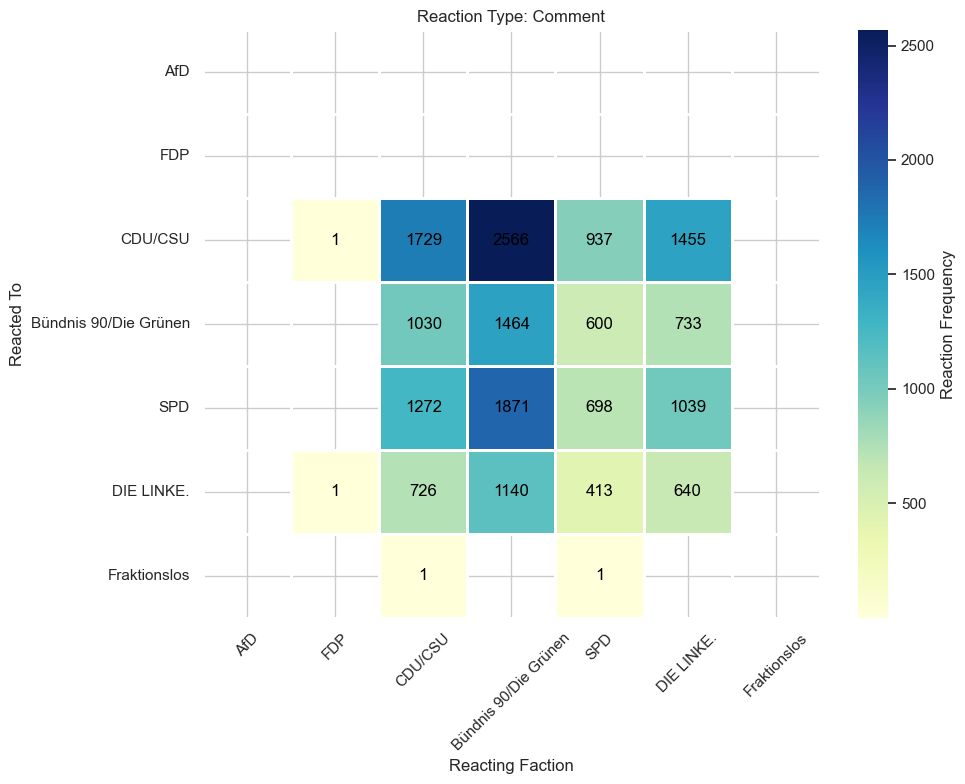

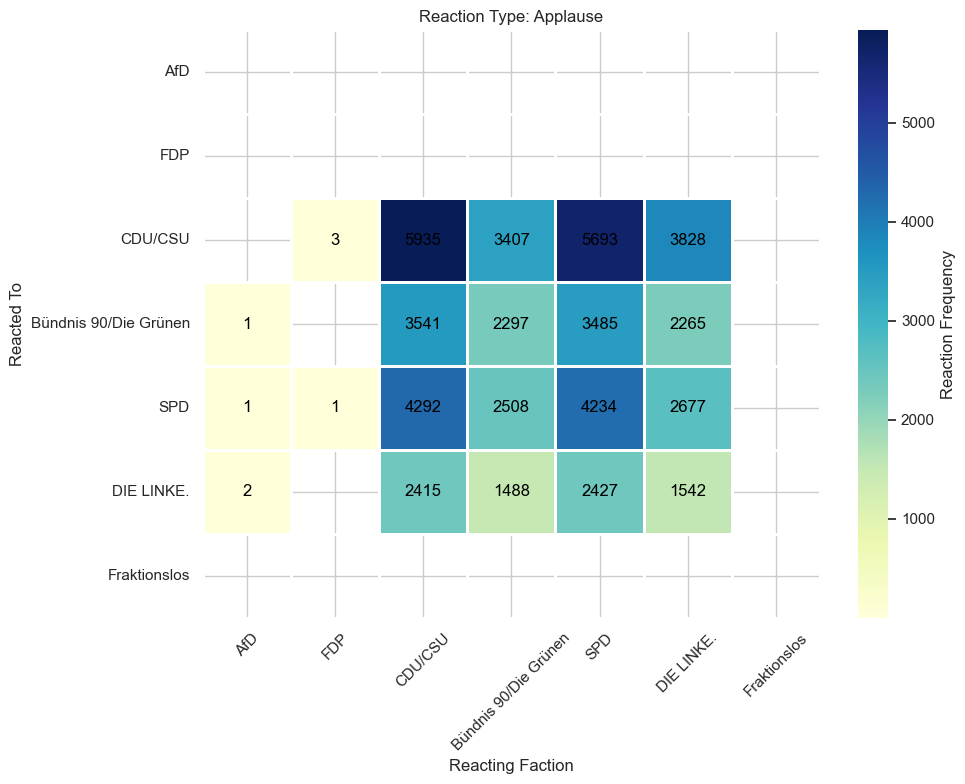

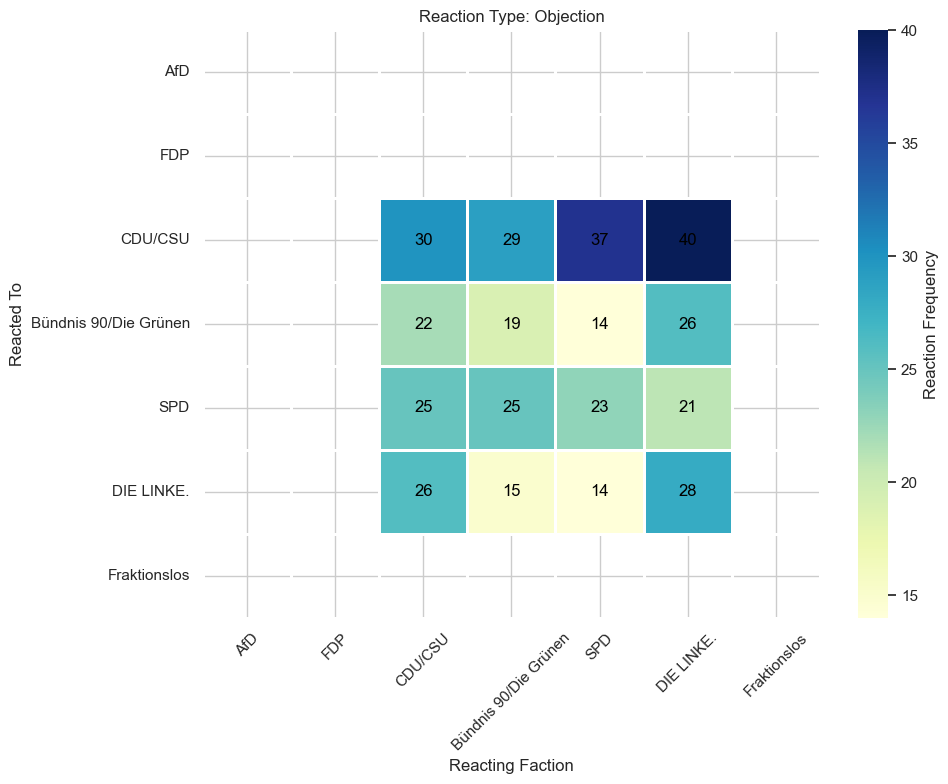

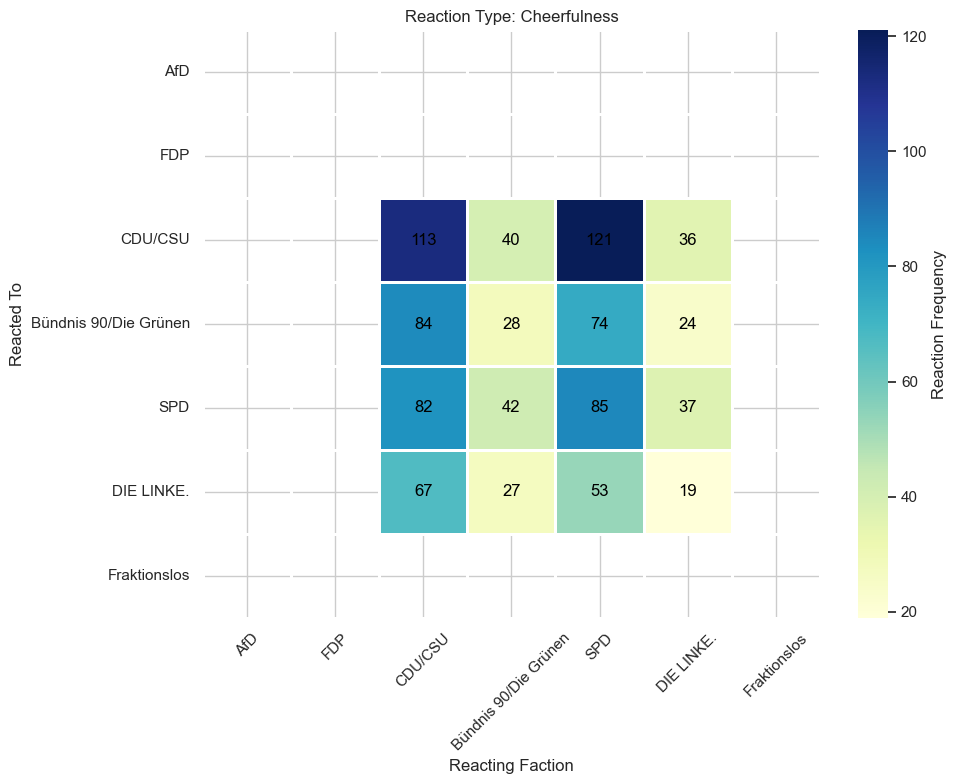

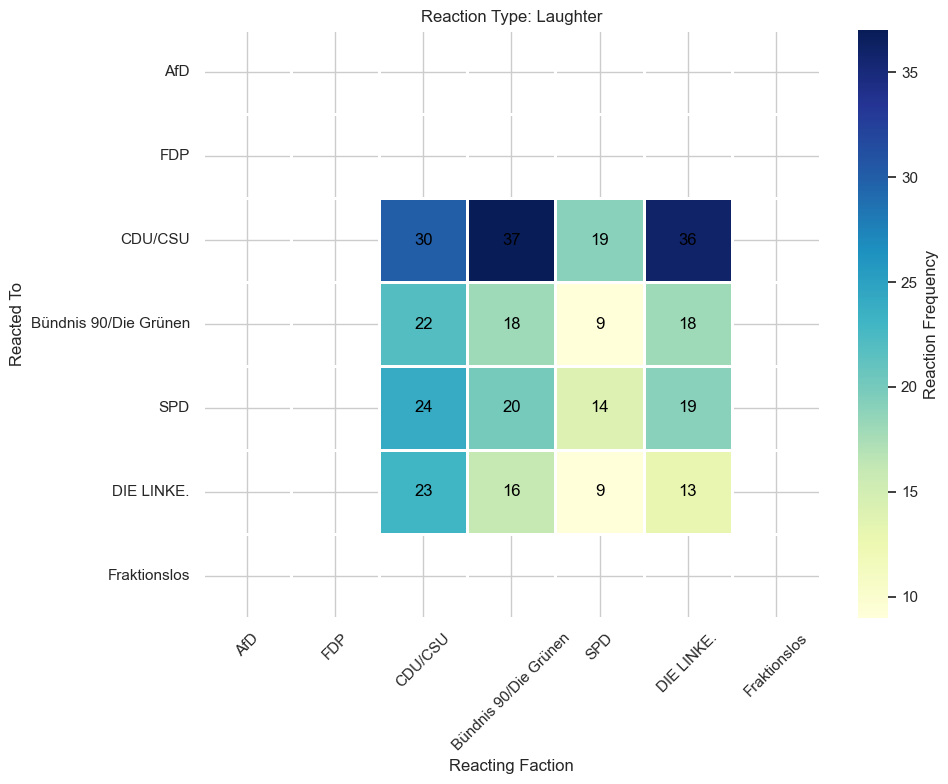

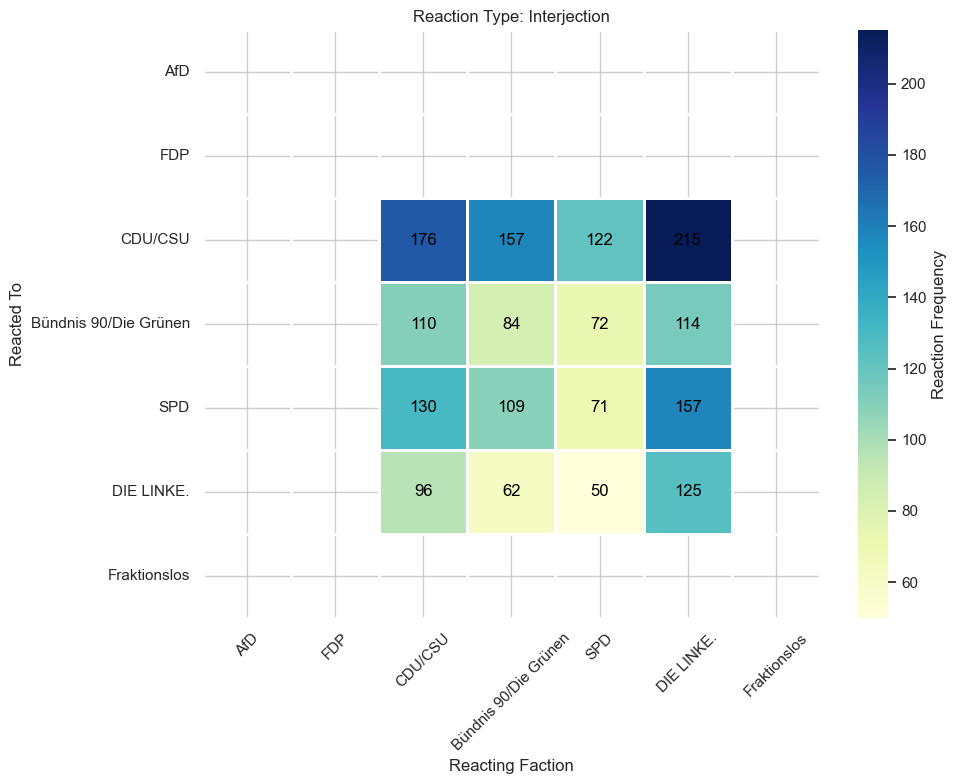

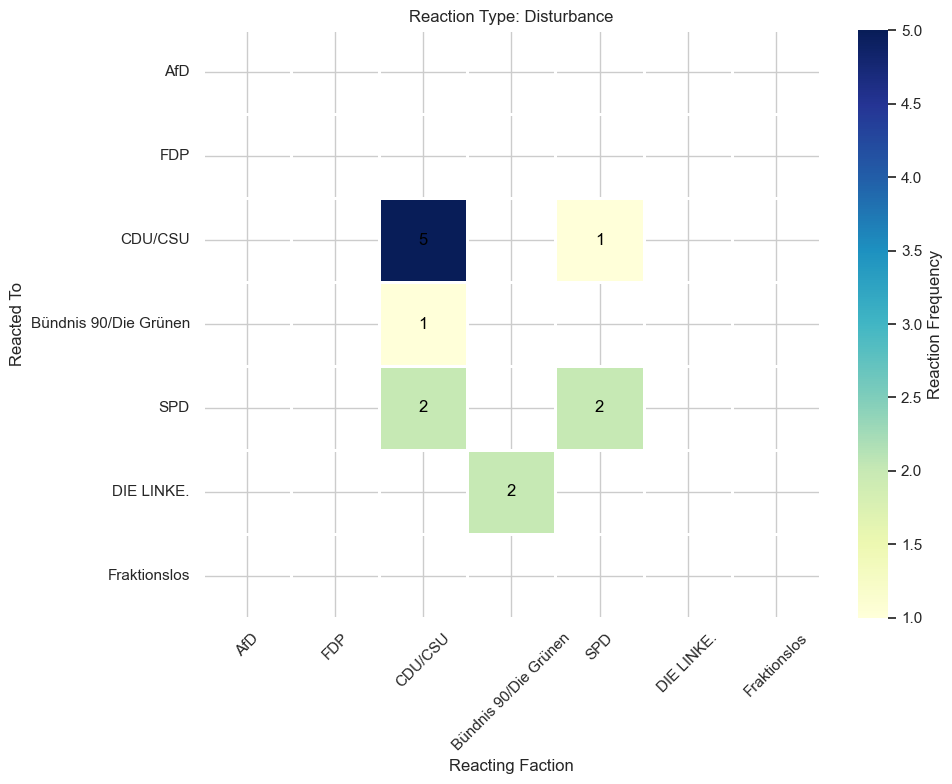

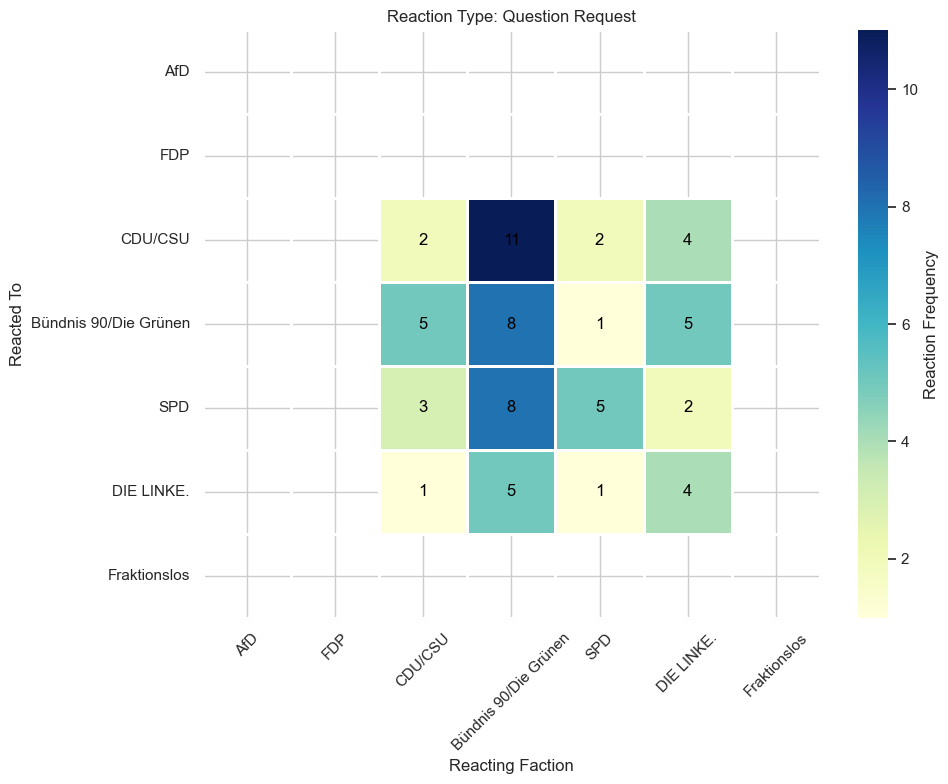

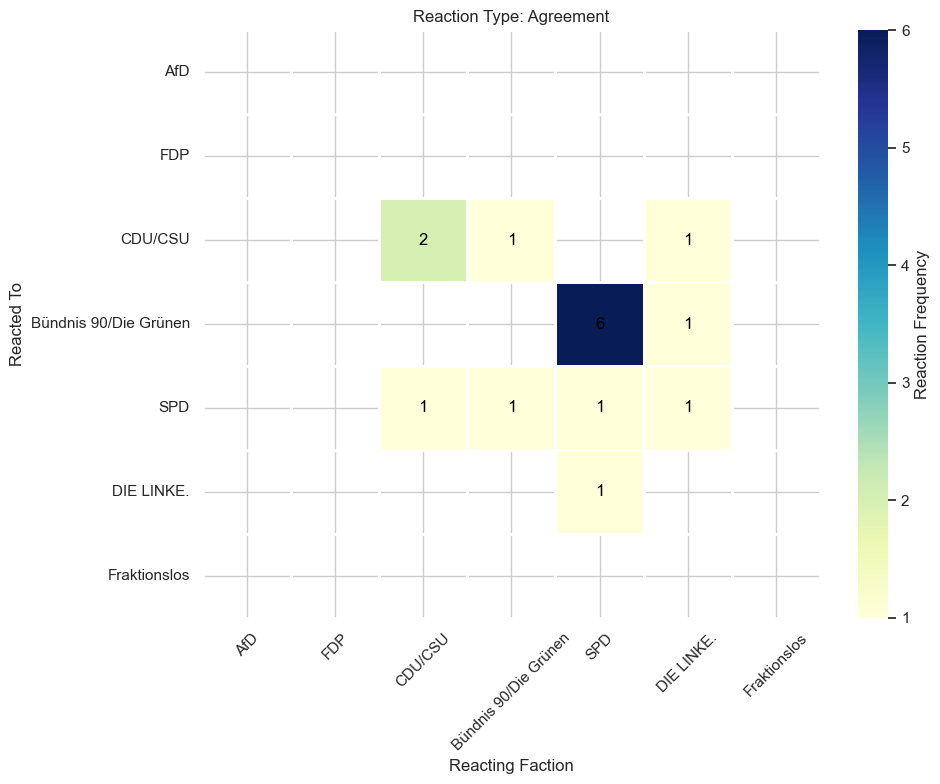

In [58]:
# Set up the plotting style for clarity
sns.set(style="whitegrid")

# Define the faction order
faction_order = ['AfD', 'FDP', 'CDU/CSU', 'Bündnis 90/Die Grünen', 'SPD', 'DIE LINKE.', 'Fraktionslos']

# Loop through each reaction matrix and plot it as a heatmap
for reaction, matrix in reaction_matrices.items():
    # Check if the matrix is non-empty before plotting
    if not matrix.empty:
        # Reindex to ensure the correct order of rows and columns
        matrix = matrix.reindex(index=faction_order, columns=faction_order, fill_value=0)
        
        # Create a mask for cells with zero values
        mask = matrix == 0

        plt.figure(figsize=(10, 8))
        sns.heatmap(
            matrix, 
            annot=True, 
            cmap="YlGnBu", 
            fmt="d", 
            linewidths=1,       # Adjusts the thickness of the box around cells
            linecolor='white',  # Sets box color around each cell
            cbar_kws={'label': 'Reaction Frequency'}, 
            mask=mask,  # Apply the mask to hide zeros
            annot_kws={"color": "black"}  # Set annotation color for non-zero values
        )
        plt.title(f"Reaction Type: {reaction}")
        plt.xlabel("Reacting Faction")
        plt.ylabel("Reacted To")
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
    else:
        print(f"No data available for reaction type: {reaction}")


## 7. Contributions Extended

### 7.1 Data Cleaning

In [261]:
contributions_extended = contributions_extended_raw.copy()

# change all -1 to nan
contributions_extended = contributions_extended.replace(-1, np.nan)
# show nan of contributions_extended_raw
contributions_extended.isna().sum()

id                     0
type                   0
first_name       2183107
last_name        1929034
faction_id         45980
speech_id              0
text_position          0
politician_id    1948168
content          1901536
dtype: int64

We try to fill the faction ID. Since we only keep the latest faction of the politician, it might not be 100% accurate if the politician changed the faction. However, since it is only for a small number of entries, we think that the mistakes are minimal

In [262]:
politicians = politicians_raw.copy()
# prop duplicates in ui, keeping the last
politicians = politicians.drop_duplicates(subset=['ui'], keep='last')


# if faction_id is nan, try to fill with faction_id of politician_df
contributions_extended['faction_id'] = contributions_extended['faction_id'].fillna(contributions_extended['politician_id'].map(politicians.set_index('ui')['faction_id']))
contributions_extended.isna().sum()

id                     0
type                   0
first_name       2183107
last_name        1929034
faction_id         38971
speech_id              0
text_position          0
politician_id    1948168
content          1901536
dtype: int64

In [263]:
factions_raw.head(20)

id           abbreviation  \
0    0                    AfD   
1    2                     BP   
2    4  Bündnis 90/Die Grünen   
3    7             DIE LINKE.   
4    9                 DP/DPB   
5   12                    DRP   
6    6                     DA   
7    8                     DP   
8   11                    DPB   
9    9                 DP/DPB   
10  10                 DP/FVP   
11  12                    DRP   
12  13                 DRP/NR   
13  28                      Z   
14   1                    BHE   
15   4  Bündnis 90/Die Grünen   
16   4  Bündnis 90/Die Grünen   
17  17                    FVP   
18  16                     FU   
19  19                 GB/BHE   

                                                                      faction_name  
0                                             Fraktion Alternative für Deutschland  
1                                                            Fraktion Bayernpartei  
2                                                   Fraktion BÜNDNIS 90/DIE GRÜNEN  
3                                                              Fraktion DIE LINKE.  
4                                                           Fraktion DP/DPB (Gast)  
5                                                              Fraktion DRP (Gast)  
6                                       Fraktion Demokratische Arbeitsgemeinschaft  
7                                                         Fraktion Deutsche Partei  
8                                                  Fraktion Deutsche Partei Bayern  
9                                  Fraktion Deutsche Partei/Deutsche Partei Bayern  
10                                      Fraktion Deutsche Partei/Freie Volkspartei  
11                                                  Fraktion Deutsche Reichspartei  
12                                 Fraktion Deutsche Reichspartei/Nationale Rechte  
13                                               Fraktion Deutsche Zentrums-Partei  
14   Fraktion Deutscher Gemeinschaftsblock der Heimatvertriebenen und Entrechteten  
15                                                             Fraktion Die Grünen  
16                                                  Fraktion Die Grünen/Bündnis 90  
17                                                      Fraktion Freie Volkspartei  
18                                                  Fraktion Föderalistische Union  
19  Fraktion Gesamtdeutscher Block / Block der Heimatvertriebenen und Entrechteten

In [264]:
# Ensure both faction_id in contributions_extended and id in factions_raw are of the same type
contributions_extended['faction_id'] = pd.to_numeric(contributions_extended['faction_id'], errors='coerce')
factions_raw['id'] = pd.to_numeric(factions_raw['id'], errors='coerce')

# Create a mapping dictionary
faction_name_mapping = dict(zip(factions_raw['id'], factions_raw['abbreviation']))

# Map faction_id to faction names
contributions_extended['factions'] = contributions_extended['faction_id'].map(faction_name_mapping)

# Fill unmatched faction IDs with 'Unknown' or any appropriate placeholder
contributions_extended['factions'] = contributions_extended['factions'].fillna('Unknown')

# Verify the result
contributions_extended.sample(20)

id             type   first_name last_name  faction_id  speech_id  \
110    231035  Personen-Einruf          NaN       Ruf         5.0     173498   
443    929877  Personen-Einruf       Renate   Hellwig         5.0     499483   
26    2208856          Beifall          NaN       NaN        25.0     812987   
67     435324  Personen-Einruf          NaN      blüm         5.0     334470   
831    590871          Beifall          NaN       NaN        25.0     393316   
1502  1201546  Personen-Einruf     - Rudolf    Bindig        25.0     619144   
13    2165366  Personen-Einruf        özcan     mutlu         4.0     804602   
566   1581721          Beifall          NaN       NaN        15.0     712129   
739    805261          Beifall          NaN       NaN        25.0     506851   
207   1364585  Personen-Einruf       albert      dess         5.0     615013   
253   1861056          Beifall          NaN       NaN         4.0     789600   
1029    42187       Zustimmung          NaN       NaN         5.0      24321   
193    209170          Beifall  bei der CDU       CSU         NaN     149878   
837   1481755  Personen-Einruf        peter  paziorek         5.0     673320   
1691  2811762          Beifall          NaN       NaN        15.0    1079883   
317    413512  Personen-Einruf          NaN    wehner        25.0     267816   
291   2204748  Personen-Einruf     Wilfried   Oellers         5.0     821790   
238   2042039          Beifall          NaN       NaN         7.0     831060   
2623  2315964          Beifall          NaN       NaN         0.0    1050933   
97    2353962  Personen-Einruf   matthias w  birkwald         7.0    1003788   

      text_position  politician_id  \
110               0     11001901.0   
443               0     11000861.0   
26                4            NaN   
67                2     11000204.0   
831               8            NaN   
1502              0     11000181.0   
13                2     11004360.0   
566              10            NaN   
739              17            NaN   
207              16     11000376.0   
253               7            NaN   
1029             30            NaN   
193               2            NaN   
837               4     11001685.0   
1691              6            NaN   
317               3     11002444.0   
291               1     11004365.0   
238               7            NaN   
2623              2            NaN   
97               12     11004012.0   

                                                                          content  \
110                                                     Das habe ich mir gedacht!   
443                                                 Wenn sie nicht zu teuer sind!   
26                                                                            NaN   
67                                                                     So ist es!   
831                                                                           NaN   
1502                                                     Lobbyistenpartei F.D.P.!   
13                                       Da steht ganz klar, was die Absicht ist!   
566                                                                           NaN   
739                                                                           NaN   
207                      Ein schlampiges Gesetz kann man nicht durchgehen lassen!   
253                                                                           NaN   
1029                                                                          NaN   
193                                                                           NaN   
837                                                  Nicht bei dieser Regierung!    
1691                                                                          NaN   
317                                                       Bin großer Verweigerer!   
291                                                              Falsch zugehört!   
2

In [265]:
# if first_name, last_name, faction_id and politician_id is empty, put "all" in factions
contributions_extended.loc[(contributions_extended['first_name'].isna()) & (contributions_extended['last_name'].isna()) & 
                           (contributions_extended['faction_id'].isna()) & (contributions_extended['politician_id'].isna()), 'factions'] = 'all'

contributions_extended

id             type first_name        last_name  faction_id  \
0           0           Lachen        NaN              NaN         NaN   
1           1  Personen-Einruf        NaN           hütter        15.0   
0           2            Zuruf        NaN              NaN        22.0   
1           3            Zuruf        NaN              NaN         NaN   
2           4  Personen-Einruf        NaN          blücher        15.0   
...       ...              ...        ...              ...         ...   
1044  2864760          Beifall        NaN              NaN         4.0   
1045  2864761  Personen-Einruf       jörn            könig         0.0   
1046  2864762          Beifall   wolfgang  strengmann-kuhn         4.0   
1047  2864763          Beifall        NaN              NaN        25.0   
1048  2864764          Beifall        NaN              NaN         4.0   

      speech_id  text_position  politician_id  \
0          4545              7            NaN   
1          4545              2     11000979.0   
0           494              3            NaN   
1           496              0            NaN   
2           497              0     11000202.0   
...         ...            ...            ...   
1044    1075926              6            NaN   
1045    1075926              6     11004788.0   
1046    1075926              7     11003888.0   
1047    1075926              8            NaN   
1048    1075926              8            NaN   

                                                     content  \
0                                                      links   
1                                                      Nein!   
0                                                      § 51!   
1                                                      links   
2                                                    Jawohl!   
...                                                      ...   
1044                                                     NaN   
1045  Ich habe es gesagt: Anerkennungsquote unter 1 Prozent!   
1046                                                     NaN   
1047                                                     NaN   
1048                                                     NaN   

                   factions  
0                       all  
1                       FDP  
0                       KPD  
1                       all  
2                       FDP  
...                     ...  
1044  Bündnis 90/Die Grünen  
1045                    AfD  
1046  Bündnis 90/Die Grünen  
1047                    SPD  
1048  Bündnis 90/Die Grünen  

[2864765 rows x 10 columns]

In [266]:
# show unique reaction type and their percentage
reaction_type_count = contributions_extended['type'].value_counts(normalize=True) * 100
reaction_type_count

Beifall            58.816971
Personen-Einruf    28.227132
Zuruf               8.573548
Zustimmung          1.747194
Lachen              1.138593
Heiterkeit          0.770046
Widerspruch         0.713706
Unruhe              0.012811
Name: type, dtype: float64

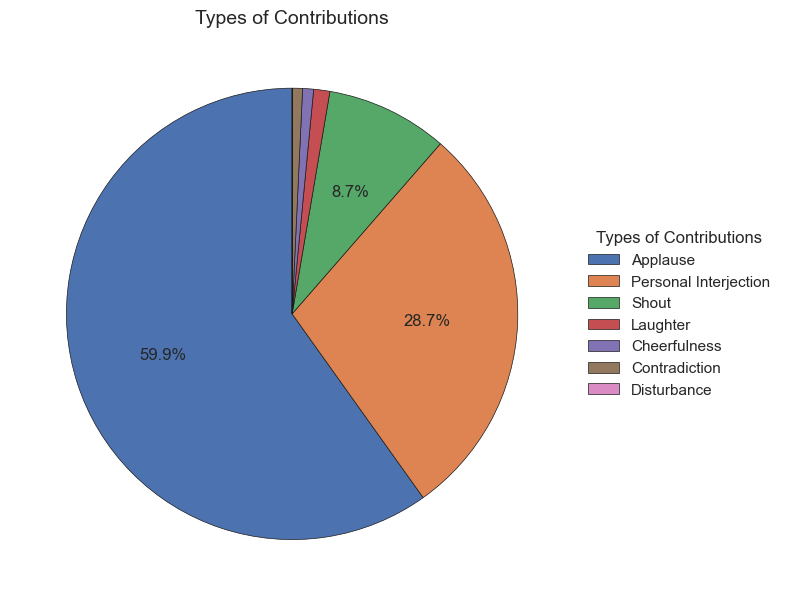

In [267]:
# Apply a seaborn style
sns.set_theme(style="whitegrid")

# Create a dictionary to map original labels to English labels
label_mapping = {
    'Beifall': 'Applause',
    'Personen-Einruf': 'Personal Interjection',
    'Zuruf': 'Shout',
    'Lachen': 'Laughter',
    'Heiterkeit': 'Cheerfulness',
    'Widerspruch': 'Contradiction',
    'Unruhe': 'Disturbance'
}

# Rename the types
contributions_extended['type'] = contributions_extended['type'].map(label_mapping)

# Data for the pie chart
data = contributions_extended['type'].value_counts()
labels = data.index
sizes = data.values

# Define a function to control which slices display percentages
def autopct_func(pct, all_labels):
    """Show percentages only for selected labels."""
    # Calculate the index based on the cumulative percentages
    total = sum(sizes)
    absolute = int(round(pct * total / 100.0))
    corresponding_label = all_labels[list(sizes).index(absolute)]
    if corresponding_label in ['Applause', 'Personal Interjection', 'Shout']:
        return f'{pct:.1f}%'
    else:
        return ''

# Create the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=None,  # Remove default labels
    autopct=lambda pct: autopct_func(pct, labels),
    startangle=90,
    wedgeprops=dict(edgecolor='k', linewidth=0.5)
)

# Add a legend on the side with colors matching the pie chart
ax.legend(
    wedges,
    labels,
    title="Types of Contributions",
    loc="center left",
    bbox_to_anchor=(1, 0.5),  # Position the legend outside the plot
    frameon=False
)

# Adjust font size for percentage labels
for autotext in autotexts:
    autotext.set_fontsize(12)

# Adjust layout
plt.title('Types of Contributions', fontsize=14)
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('types_of_contributions.png', format='png', dpi=300)

plt.show()


### 7.2 Dataset preparation

In [268]:
# merge contributions_df on content_subset_with_classification based on speech_id
content_subset_with_classification_contribution_extended = content_subset_with_classification.merge(
    contributions_extended[['speech_id', 'type', 'factions']],
    left_on='id',
    right_on='speech_id',
    how='left'
)

# rename type in reaction type and factions in reacting faction
content_subset_with_classification_contribution_extended = content_subset_with_classification_contribution_extended.rename(columns={'type': 'reaction_type', 'factions': 'reacting_faction'})
content_subset_with_classification_contribution_extended

id  electoral_term  session first_name  \
0         729470              17        1      heinz   
1         729470              17        1      heinz   
2         729471              17        1     volker   
3         729471              17        1     volker   
4         729471              17        1     volker   
...          ...             ...      ...        ...   
1214972  1075926              20      187   angelika   
1214973  1075926              20      187   angelika   
1214974  1075926              20      187   angelika   
1214975  1075926              20      187   angelika   
1214976  1075926              20      187   angelika   

                                              document_url    last_name  \
0        https://dip21.bundestag.de/dip21/btp/17/17001.pdf  riesenhuber   
1        https://dip21.bundestag.de/dip21/btp/17/17001.pdf  riesenhuber   
2        https://dip21.bundestag.de/dip21/btp/17/17001.pdf       kauder   
3        https://dip21.bundestag.de/dip21/btp/17/17001.pdf       kauder   
4        https://dip21.bundestag.de/dip21/btp/17/17001.pdf       kauder   
...                                                    ...          ...   
1214972  https://dip21.bundestag.de/dip21/btp/20/20187.pdf     glöckner   
1214973  https://dip21.bundestag.de/dip21/btp/20/20187.pdf     glöckner   
1214974  https://dip21.bundestag.de/dip21/btp/20/20187.pdf     glöckner   
1214975  https://dip21.bundestag.de/dip21/btp/20/20187.pdf     glöckner   
1214976  https://dip21.bundestag.de/dip21/btp/20/20187.pdf     glöckner   

         faction_id           position_short    position_long  politician_id  \
0                 5  Presidium of Parliament  alterspräsident       11001849   
1                 5  Presidium of Parliament  alterspräsident       11001849   
2                 5     Member of Parliament                        11001074   
3                 5     Member of Parliament                        11001074   
4                 5     Member of Parliament                        11001074   
...             ...                      ...              ...            ...   
1214972          25     Member of Parliament                        11004614   
1214973          25     Member of Parliament                        11004614   
1214974          25     Member of Parliament                        11004614   
1214975          25     Member of Parliament                        11004614   
1214976          25     Member of Parliament                        11004614   

         ...    sub_category   main_category content_category  \
0        ...           Other           Other   Organizational   
1        ...           Other           Other   Organizational   
2        ...  Organizational  Organizational   Organizational   
3        ...  Organizational  Organizational   Organizational   
4        ...  Organizational  Organizational   Organizational   
...      ...             ...             ...              ...   
1214972  ...         Request          Debate            Other   
1214973  ...         Request          Debate            Other   
1214974  ...         Request          Debate            Other   
1214975  ...         Request          Debate            Other   
1214976  ...         Request          Debate            Other   

        entry_classification speech_politician  speech_politician_faction  \
0                   Guidance               NaN                        NaN   
1                   Guidance               NaN                        NaN   
2                      Other               NaN                        NaN   
3                      Other               NaN                        NaN   
4                      Other               NaN                        NaN   
...                      ...               ...                        ...   
1214972               Speech        11004614.0                        SPD   
1214973               Speech        11004614.0                        SPD   
12149

In [269]:
#filter out all position_short presidium of parliament
content_subset_with_classification_contribution_extended = content_subset_with_classification_contribution_extended[content_subset_with_classification_contribution_extended['position_short'] != 'Presidium of Parliament']

In [270]:
content_subset_with_classification_contribution_extended.columns

Index(['id', 'electoral_term', 'session', 'first_name', 'document_url',
       'last_name', 'faction_id', 'position_short', 'position_long',
       'politician_id', 'top_item', 'top_title', 'speech_content', 'date',
       'faction', 'year', 'speech_length', 'age', 'gender', 'tenure',
       'sub_category', 'main_category', 'content_category',
       'entry_classification', 'speech_politician',
       'speech_politician_faction', 'month_year', 'speech_id', 'reaction_type',
       'reacting_faction'],
      dtype='object')

### 7.3 Reaction Matrices

In [271]:
term_20_data = content_subset_with_classification_contribution_extended[content_subset_with_classification_contribution_extended['electoral_term'] == 20]

#Get the unique reaction types in the data
reaction_types = term_20_data['reaction_type'].unique()

# Dictionary to hold the count matrix for each reaction type
reaction_matrices_2 = {}

# Loop over each reaction type to create separate matrices
for reaction in reaction_types:
    # Filter for the specific reaction type
    reaction_data = term_20_data[term_20_data['reaction_type'] == reaction]

    # Create a pivot table counting how often each faction (in rows) reacted toward each other faction (in columns)
    reaction_matrix = reaction_data.pivot_table(
        index='faction',  # Assuming 'faction_id' identifies the faction doing the reaction
        columns='reacting_faction',  # The faction being reacted to
        values='reaction_type',  # The reaction type we're counting
        aggfunc='size',  # Count occurrences
        fill_value=0  # Fill NaN with 0 for counts
    )

    # Store the matrix in the dictionary with the reaction type as the key
    reaction_matrices_2[reaction] = reaction_matrix

# Display matrices for each reaction type
for reaction, matrix in reaction_matrices_2.items():
    print(f"Reaction Type: {reaction}")
    display(matrix)  # Using display to show each matrix clearly


Reaction Type: nan


Empty DataFrame
Columns: []
Index: []

Reaction Type: Applause


reacting_faction         AfD  Bündnis 90/Die Grünen  CDU/CSU  DIE LINKE.  DP  \
faction                                                                        
                         706                   2851     1719         543   0   
AfD                    10557                     23       10           4   0   
Bündnis 90/Die Grünen     72                  17041     1035         996   1   
CDU/CSU                 1993                   2208    21509         613   0   
DIE LINKE.               258                   1046      343        6600   0   
FDP                      204                   9374     1849         481   0   
Fraktionslos             112                    152       30          82   0   
SPD                      160                  19372     1453        1582   0   

reacting_faction         FDP  Fraktionslos  Gast    SPD  Unknown  
faction                                                           
                        2318            35     0   2988        0  
AfD                       11           646     0     20        0  
Bündnis 90/Die Grünen  11267            52     0  14416        1  
CDU/CSU                 2475           240     0   2210        0  
DIE LINKE.               303           326     0   1097       10  
FDP                    12152            29     1   9274        0  
Fraktionslos             107            52     0    153        0  
SPD                    14604           110     0  22589        0

Reaction Type: Personal Interjection


reacting_faction        AfD  Bündnis 90/Die Grünen  CDU/CSU  DIE LINKE.   FDP  \
faction                                                                         
                        919                    754     1471         110   290   
AfD                     935                   3335     1122         441  1100   
Bündnis 90/Die Grünen  4411                    676     7283         291   260   
CDU/CSU                2747                   6934     3228         691  3338   
DIE LINKE.             1130                    583     1224         365   788   
FDP                    2471                    413     5194         481   474   
Fraktionslos             21                     97       51          12    25   
SPD                    6277                    637     9800         469   451   

reacting_faction       Fraktionslos   SPD  Unknown  
faction                                             
                                  0   542        0  
AfD                               8  3094        1  
Bündnis 90/Die Grünen             8   359        0  
CDU/CSU                           1  5364        0  
DIE LINKE.                        6   545        2  
FDP                               2   370        1  
Fraktionslos                      5    64        0  
SPD                               6   834        0

Reaction Type: Shout


reacting_faction        AfD  Bündnis 90/Die Grünen  CDU/CSU  DIE LINKE.  DP  \
faction                                                                       
                        302                    164      266          34   0   
AfD                     153                   1043      242         166   1   
Bündnis 90/Die Grünen  1412                     98     1204         125   0   
CDU/CSU                 802                   1997      402         267   1   
DIE LINKE.              333                    169      222          66   1   
FDP                     784                     78      928         176   0   
Fraktionslos              5                     42       10           4   0   
SPD                    1962                     82     1686         182   0   

reacting_faction       FDP  Fraktionslos   SPD  Unknown  all  
faction                                                       
                        56             0   169        0    6  
AfD                    284             7  1244        1   57  
Bündnis 90/Die Grünen   39             4    95        1   16  
CDU/CSU                667             1  1979        0   36  
DIE LINKE.             165             0   172        0   13  
FDP                     52             4    91        1    9  
Fraktionslos             6             1    49        0    6  
SPD                     33             5   202        1   17

Reaction Type: Laughter


reacting_faction       AfD  Bündnis 90/Die Grünen  CDU/CSU  DIE LINKE.  DP  \
faction                                                                      
                        33                     27       44           3   0   
AfD                      6                    279       81          28   0   
Bündnis 90/Die Grünen  244                      2      214           2   0   
CDU/CSU                 86                    230        9          11   0   
DIE LINKE.              49                      7       41           2   1   
FDP                    118                      4      152          10   0   
Fraktionslos             0                     10        7           0   0   
SPD                    345                      5      316           9   0   

reacting_faction       FDP  Fraktionslos  SPD  
faction                                        
                         8             0   29  
AfD                     96             0  302  
Bündnis 90/Die Grünen    2             0    3  
CDU/CSU                116             1  276  
DIE LINKE.              20             0    8  
FDP                      1             0    5  
Fraktionslos             5             0   11  
SPD                      4             0    6

Reaction Type: Contradiction


reacting_faction       AfD  Bündnis 90/Die Grünen  CDU/CSU  DIE LINKE.  FDP  \
faction                                                                       
                         6                      8       22           2    1   
AfD                      0                    138       26          14   40   
Bündnis 90/Die Grünen   42                      0       83           6    0   
CDU/CSU                 20                    200        2          22   60   
DIE LINKE.               6                     15       18           0   15   
FDP                     26                      0       45           6    0   
Fraktionslos             0                      7        0           1    0   
SPD                     65                      2      112           9    3   

reacting_faction       Fraktionslos  SPD  
faction                                   
                                  0   11  
AfD                               0  148  
Bündnis 90/Die Grünen             0    0  
CDU/CSU                           0  246  
DIE LINKE.                        0   23  
FDP                               2    5  
Fraktionslos                      0    8  
SPD                               0    2

Reaction Type: Cheerfulness


reacting_faction       AfD  Bündnis 90/Die Grünen  CDU/CSU  DIE LINKE.  FDP  \
faction                                                                       
                         7                     18       21           0   14   
AfD                    101                     14        6           2    6   
Bündnis 90/Die Grünen    8                    125       33           4   49   
CDU/CSU                 41                     55      267           6   59   
DIE LINKE.              18                     27       53          31   21   
FDP                      5                     83       36           7   97   
Fraktionslos             1                      1        3           1    1   
SPD                     18                    127       61           5   96   

reacting_faction       SPD  
faction                     
                        18  
AfD                      9  
Bündnis 90/Die Grünen   82  
CDU/CSU                 70  
DIE LINKE.              25  
FDP                     85  
Fraktionslos             1  
SPD                    209

No data available for reaction type: nan


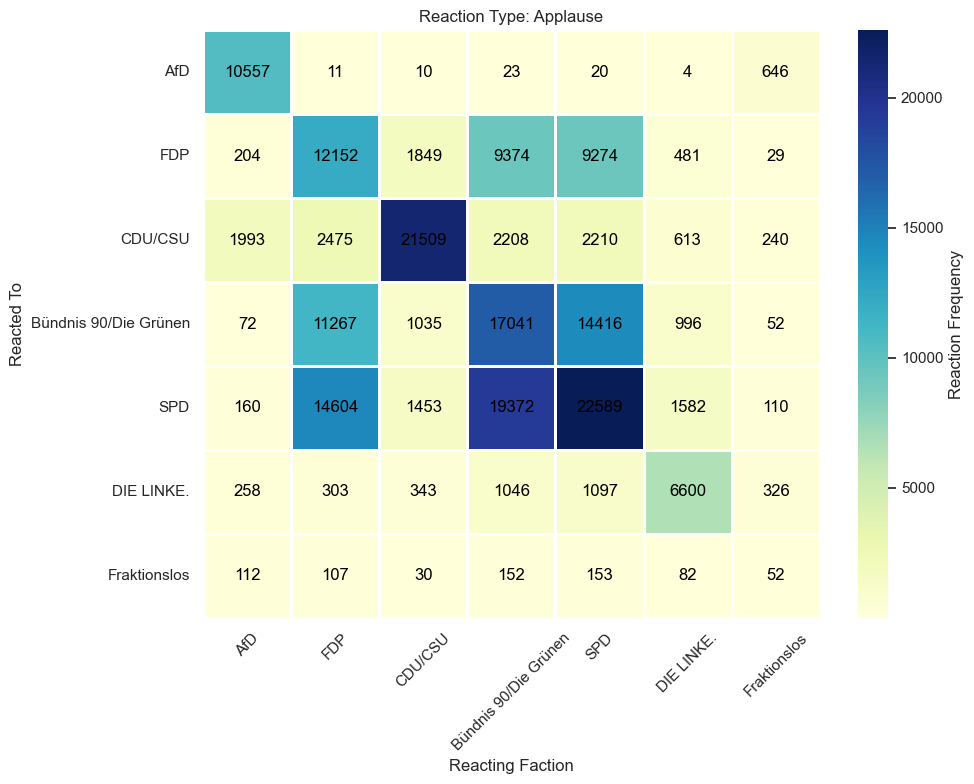

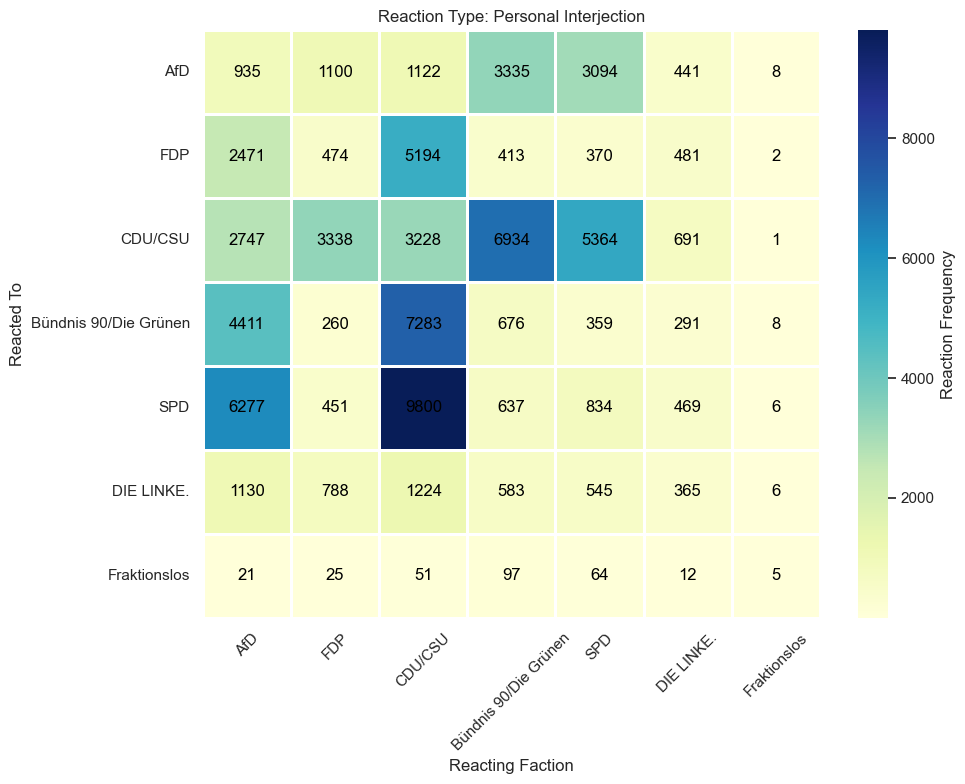

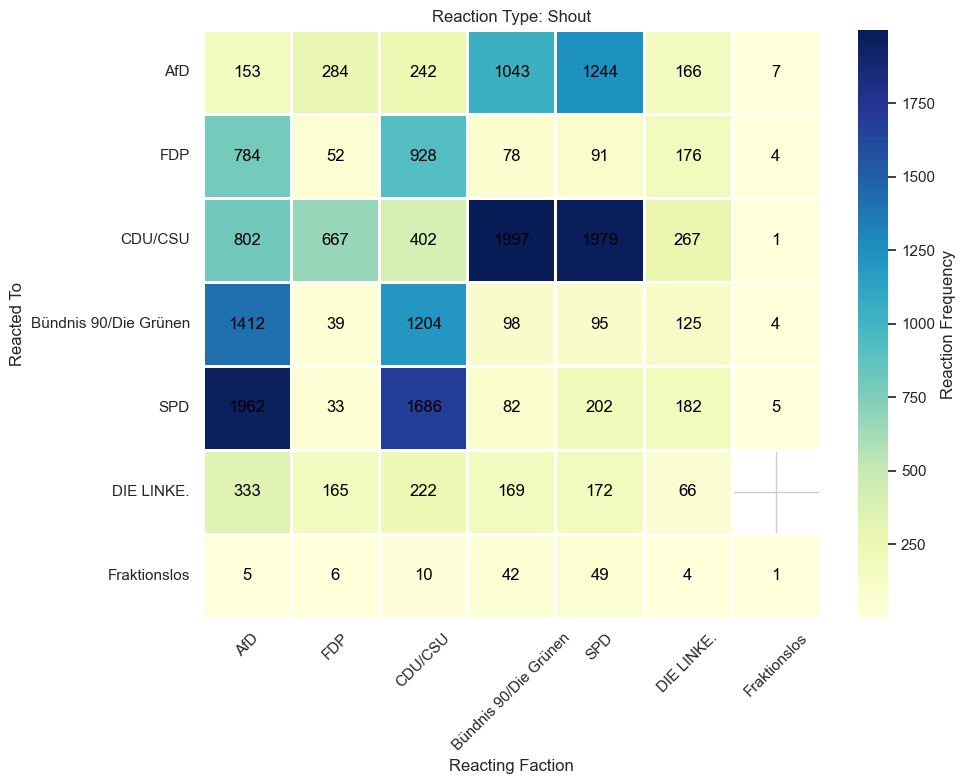

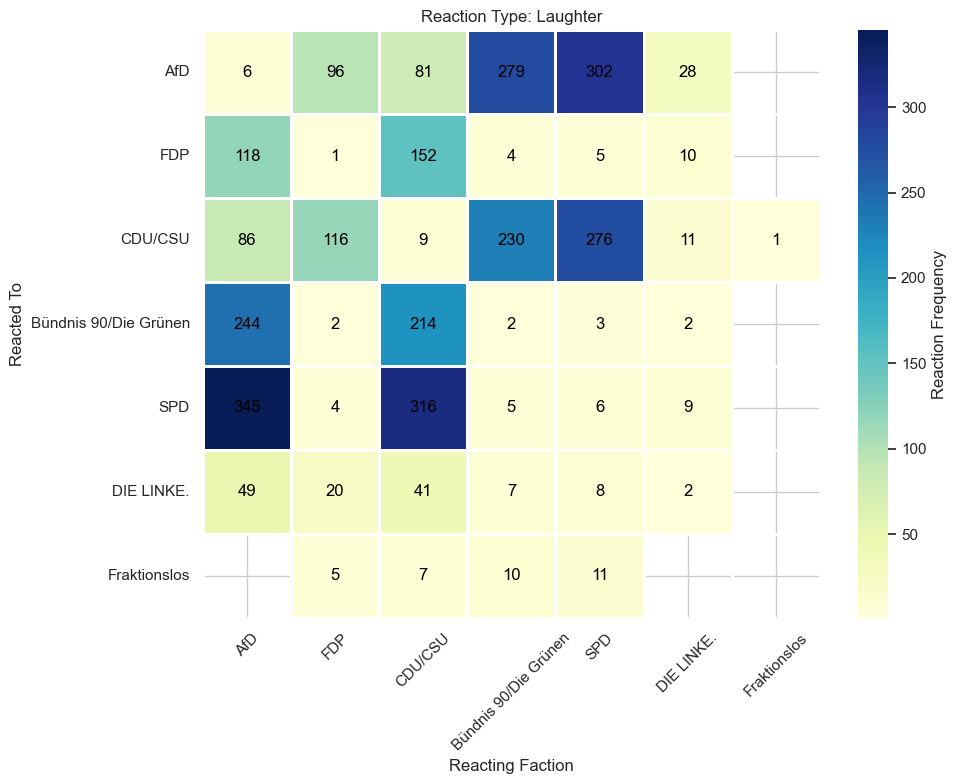

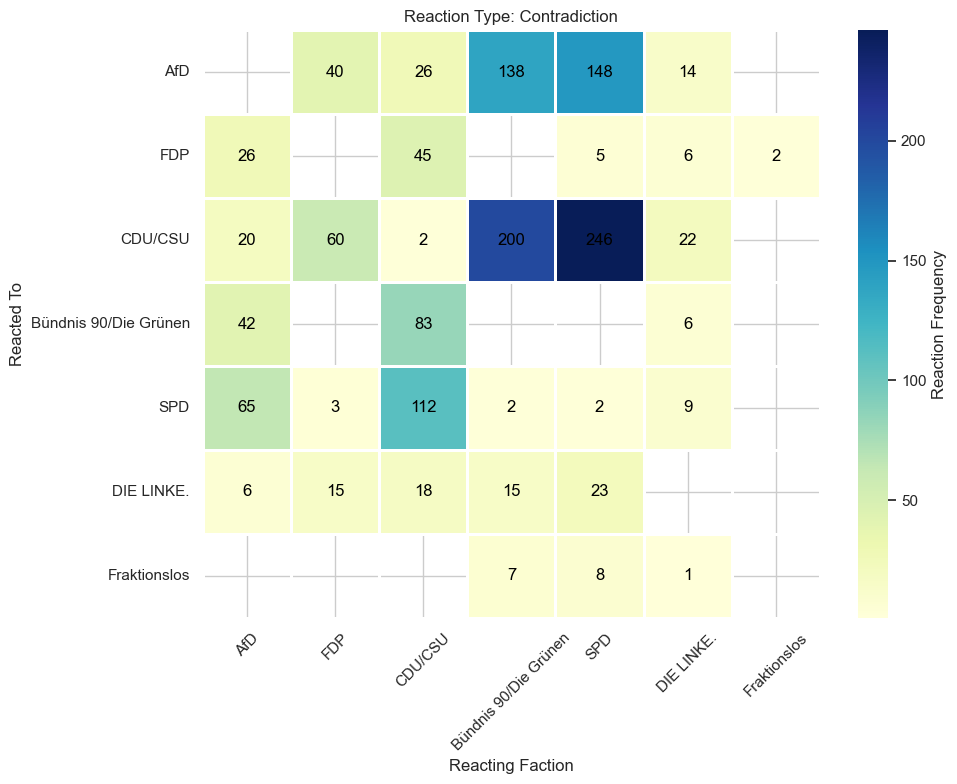

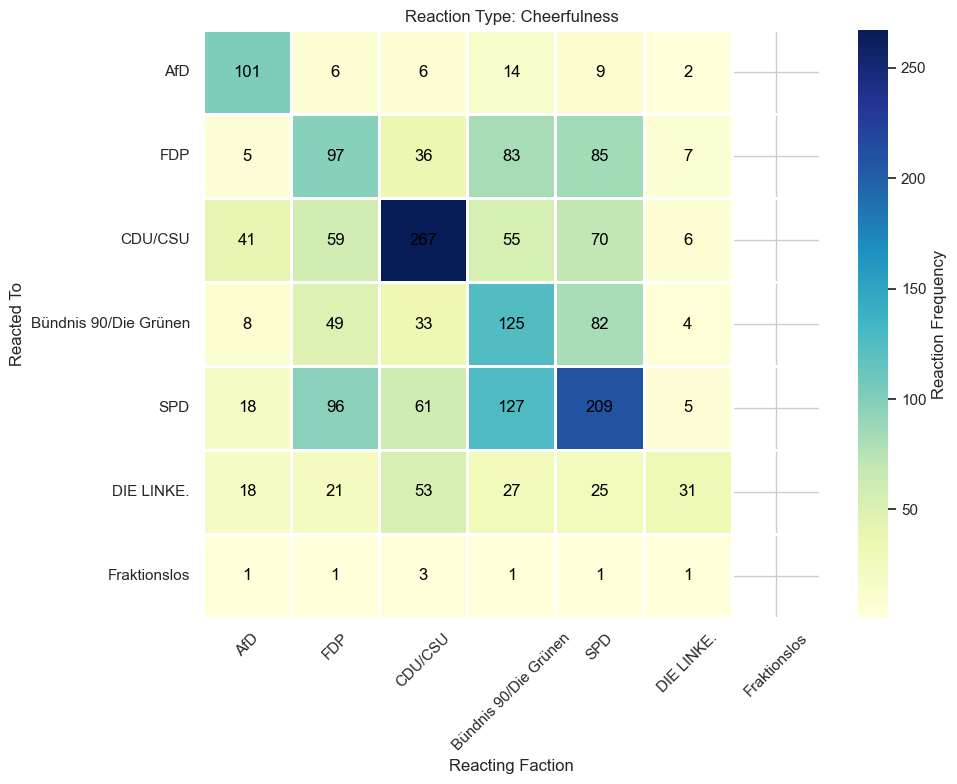

In [316]:
# Set up the plotting style for clarity
sns.set(style="whitegrid")

# Define the faction order
faction_order = ['AfD', 'FDP', 'CDU/CSU', 'Bündnis 90/Die Grünen', 'SPD', 'DIE LINKE.', 'Fraktionslos']

# Loop through each reaction matrix and plot it as a heatmap
for reaction, matrix in reaction_matrices_2.items():
    # Check if the matrix is non-empty before plotting
    if not matrix.empty:
        # Reindex to ensure the correct order of rows and columns
        matrix = matrix.reindex(index=faction_order, columns=faction_order, fill_value=0)
        
        # Create a mask for cells with zero values
        mask = matrix == 0

        plt.figure(figsize=(10, 8))
        sns.heatmap(
            matrix, 
            annot=True, 
            cmap="YlGnBu", 
            fmt="d", 
            linewidths=1,       # Adjusts the thickness of the box around cells
            linecolor='white',  # Sets box color around each cell
            cbar_kws={'label': 'Reaction Frequency'}, 
            mask=mask,  # Apply the mask to hide zeros
            annot_kws={"color": "black"}  # Set annotation color for non-zero values
        )
        plt.title(f"Reaction Type: {reaction}")
        plt.xlabel("Reacting Faction")
        plt.ylabel("Reacted To")
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.savefig(f'reaction_type_{reaction}_20_matrix.png', format='png', dpi=300)
        plt.show()
    else:
        print(f"No data available for reaction type: {reaction}")


#### 7.3.1 Closer Analysis - Reactions given vs. reactins received per party

Data loaded: 219032 rows
Reaction types found: [nan 'Applause' 'Personal Interjection' 'Shout' 'Laughter' 'Contradiction'
 'Cheerfulness']
Processing reaction type: nan
No data available for reaction type: nan. Skipping...
Processing reaction type: Applause


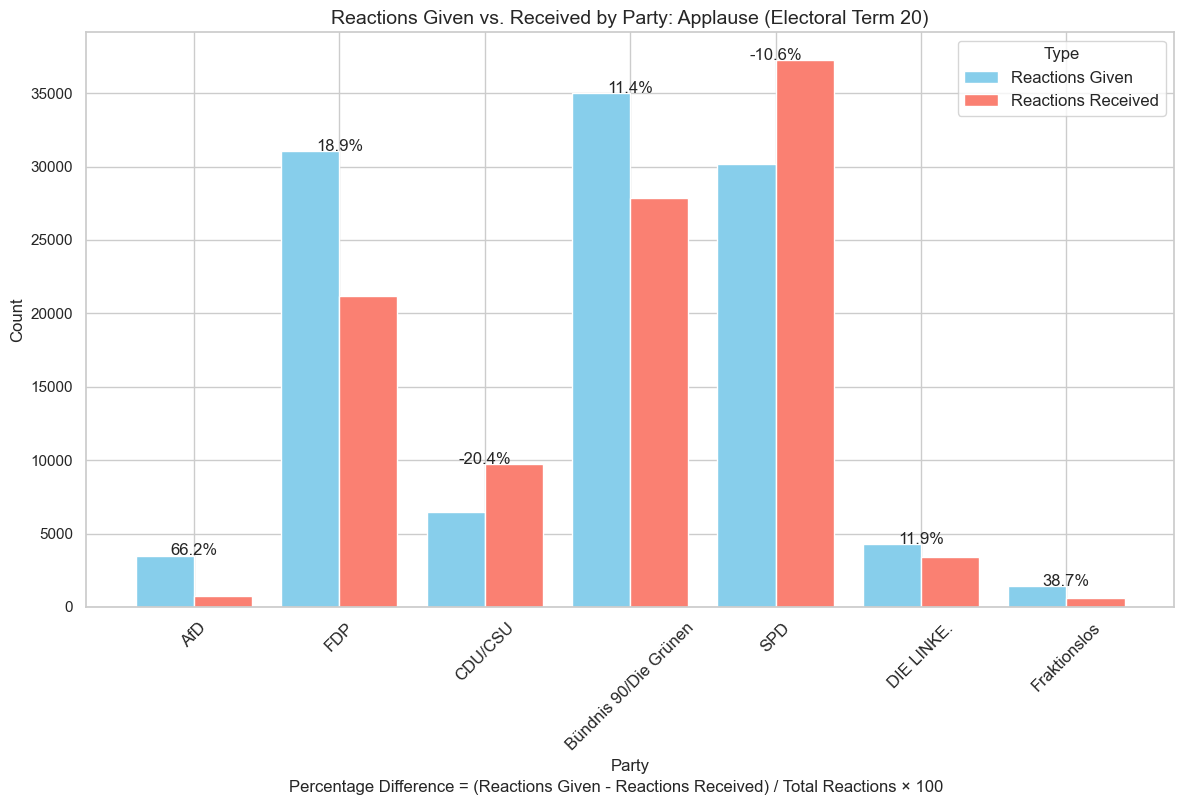

Processing reaction type: Personal Interjection


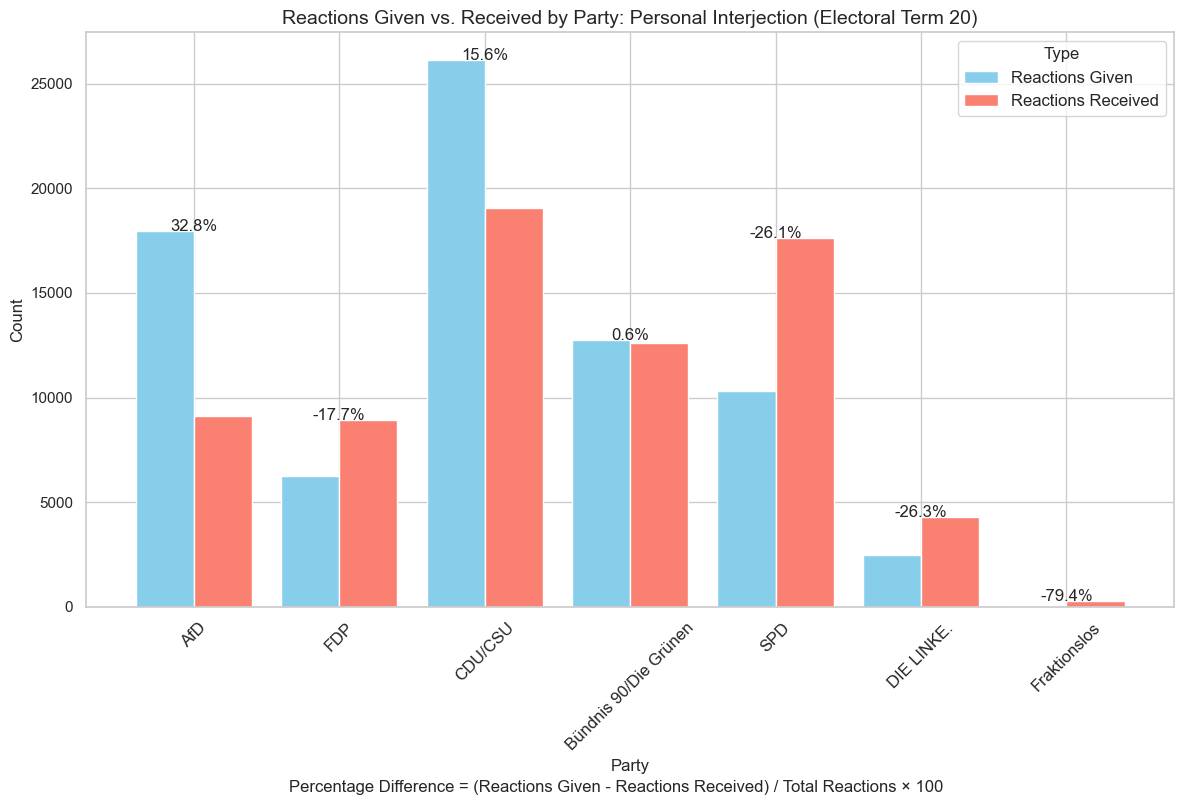

Processing reaction type: Shout


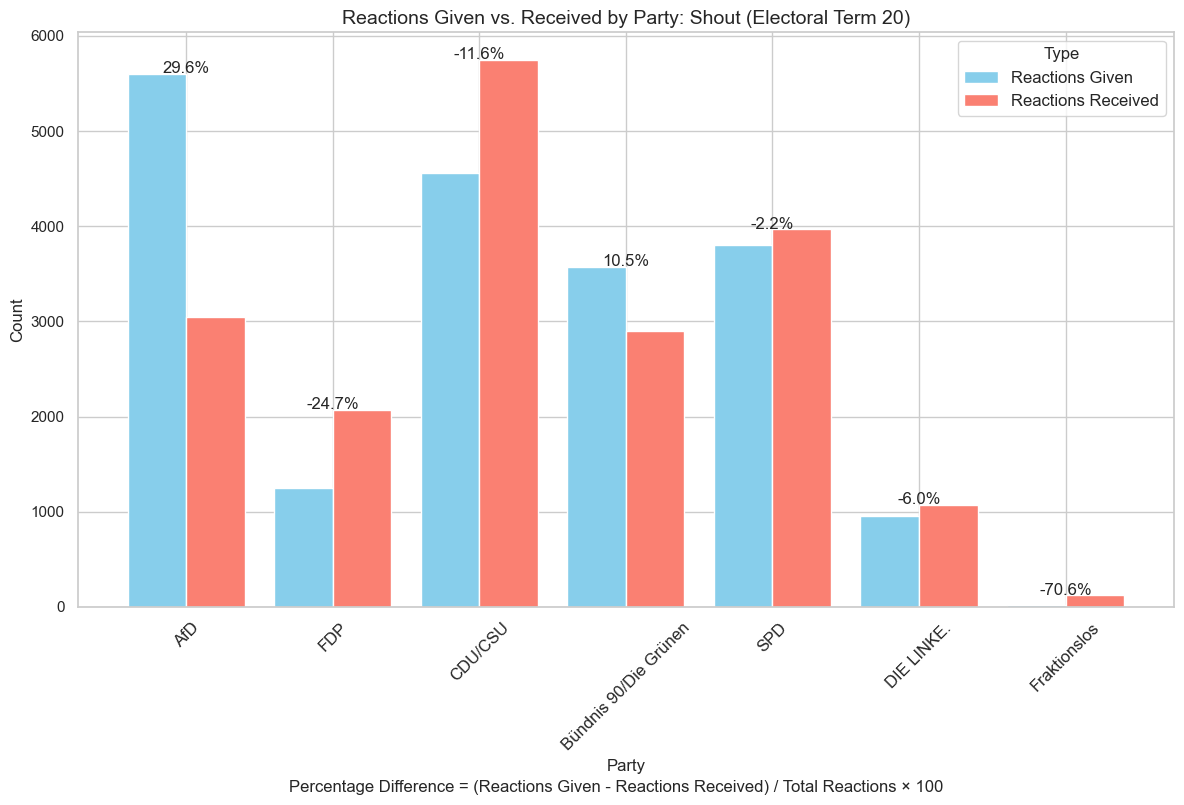

Processing reaction type: Laughter


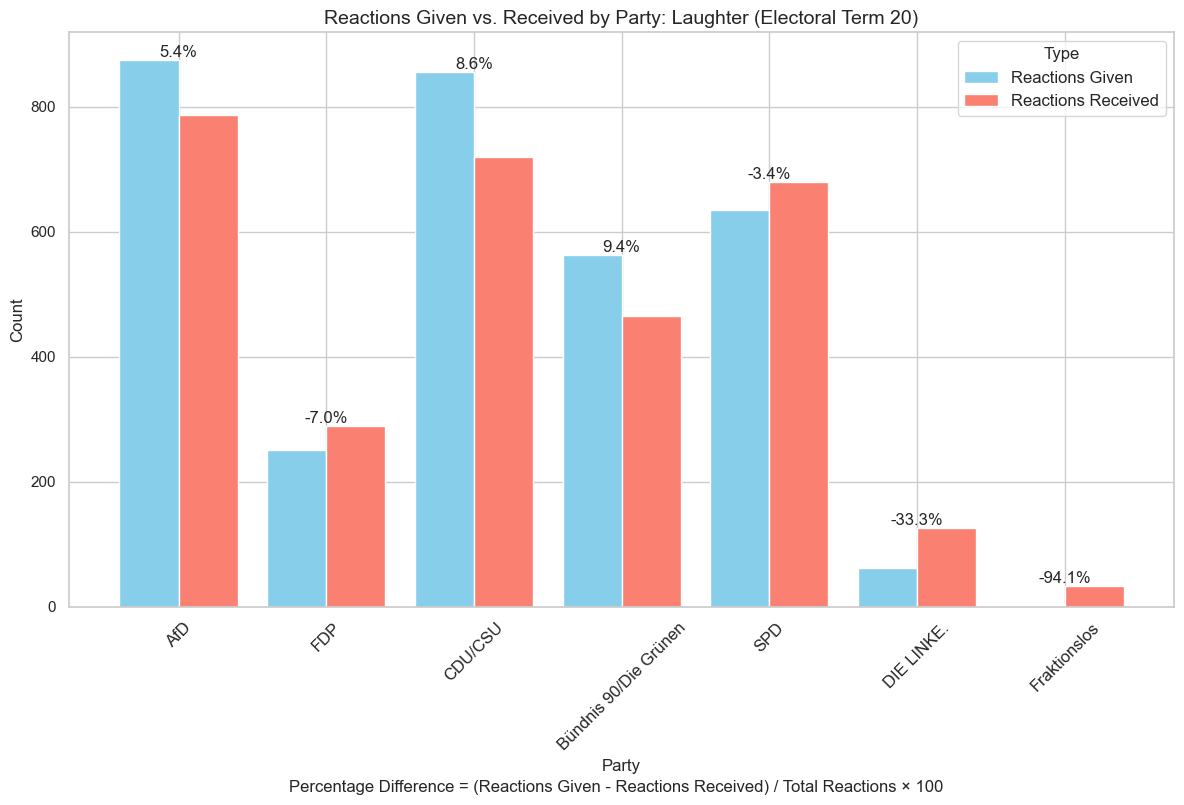

Processing reaction type: Contradiction


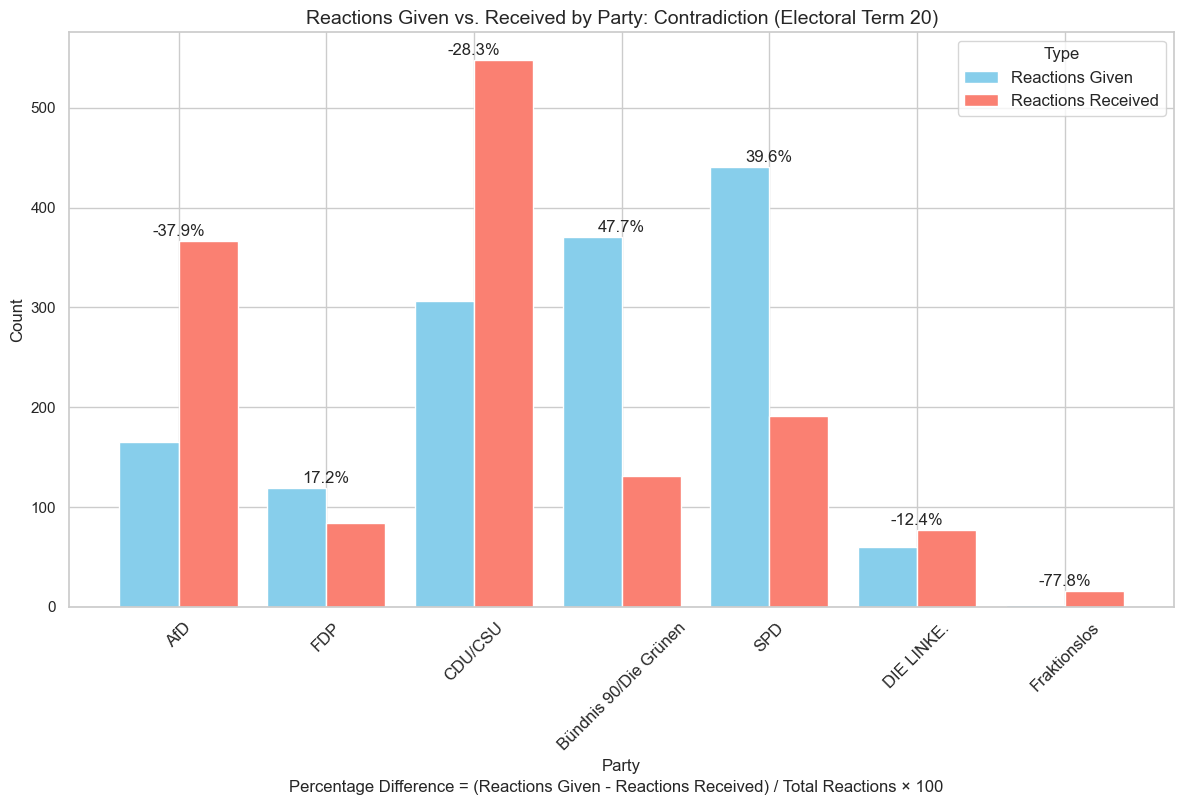

Processing reaction type: Cheerfulness


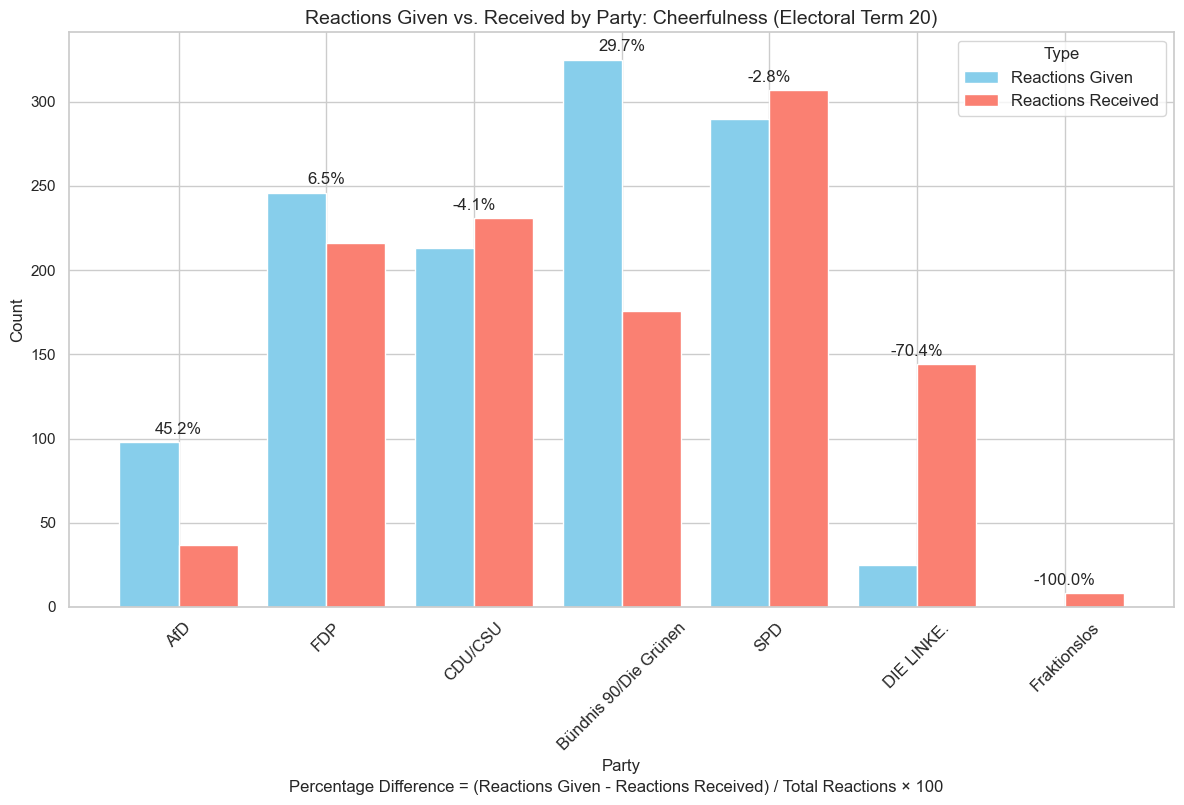

In [289]:
# Apply seaborn style
sns.set_theme(style="whitegrid")

# Define the faction order for sorting
faction_order = ['AfD', 'FDP', 'CDU/CSU', 'Bündnis 90/Die Grünen', 'SPD', 'DIE LINKE.', 'Fraktionslos']

# Filter for electoral term 20
term_20_data = content_subset_with_classification_contribution_extended[
    content_subset_with_classification_contribution_extended['electoral_term'] == 20
]

# Exclude reactions within the same faction
term_20_data = term_20_data[term_20_data['reacting_faction'] != term_20_data['faction']]

# Check if there is any data after filtering
if term_20_data.empty:
    print("No data available for electoral term 20 after filtering.")
else:
    print(f"Data loaded: {term_20_data.shape[0]} rows")

# Get the unique reaction types
reaction_types = term_20_data['reaction_type'].unique()

if len(reaction_types) == 0:
    print("No reaction types found in the dataset.")
else:
    print(f"Reaction types found: {reaction_types}")

# Loop through each reaction type
for reaction in reaction_types:
    print(f"Processing reaction type: {reaction}")
    
    # Filter data for the specific reaction type
    reaction_data = term_20_data[term_20_data['reaction_type'] == reaction]
    
    # Check if reaction_data is empty
    if reaction_data.empty:
        print(f"No data available for reaction type: {reaction}. Skipping...")
        continue
    
    # Calculate reactions given (grouped by reacting faction)
    reactions_given = reaction_data.groupby('reacting_faction').size()
    
    # Calculate reactions received (grouped by faction being reacted to)
    reactions_received = reaction_data.groupby('faction').size()
    
    # Combine data into a DataFrame
    reaction_summary = pd.DataFrame({
        'Reactions Given': reactions_given,
        'Reactions Received': reactions_received
    }).fillna(0)
    
    # Reindex to enforce consistent faction order and fill missing values
    reaction_summary = reaction_summary.reindex(faction_order, fill_value=0)
    
    # Calculate percentage difference
    reaction_summary['Percentage Difference'] = (
        (reaction_summary['Reactions Given'] - reaction_summary['Reactions Received']) / 
        (reaction_summary['Reactions Given'] + reaction_summary['Reactions Received']) * 100
    ).fillna(0)
    
    # Check if reaction_summary has data
    if reaction_summary.empty:
        print(f"No data to plot for reaction type: {reaction}. Skipping...")
        continue
    
    # Plot the bar chart
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Create a bar width to plot given and received side-by-side
    bar_width = 0.4
    x_positions = range(len(reaction_summary))  # Numeric x-axis positions

    # Bar for reactions given
    bars1 = ax.bar(
        [x - bar_width / 2 for x in x_positions], 
        reaction_summary['Reactions Given'], 
        bar_width, 
        label='Reactions Given', 
        color='skyblue'
    )

    # Bar for reactions received
    bars2 = ax.bar(
        [x + bar_width / 2 for x in x_positions], 
        reaction_summary['Reactions Received'], 
        bar_width, 
        label='Reactions Received', 
        color='salmon'
    )

    # Add percentage difference as text above bars
    for x, row in zip(x_positions, reaction_summary.itertuples()):
        ax.text(
            x, 
            max(row[1], row[2]) + 5,  # Offset above the taller bar
            f'{row[3]:.1f}%',  # Percentage difference
            ha='center', 
            fontsize=12
        )
    
    # Customize the chart
    ax.set_title(f'Reactions Given vs. Received by Party: {reaction} (Electoral Term 20)', fontsize=14)
    ax.set_xlabel('Party', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_xticks(x_positions)
    ax.set_xticklabels(reaction_summary.index, rotation=45, fontsize=12)
    ax.legend(title='Type', fontsize=12)

    # Add explanation line below the chart
    plt.figtext(
        0.52, 
        0, 
        'Percentage Difference = (Reactions Given - Reactions Received) / Total Reactions × 100', 
        ha='center', 
        fontsize=12, 
        wrap=True
    )

    plt.tight_layout()

    # Show the chart
    plt.show()


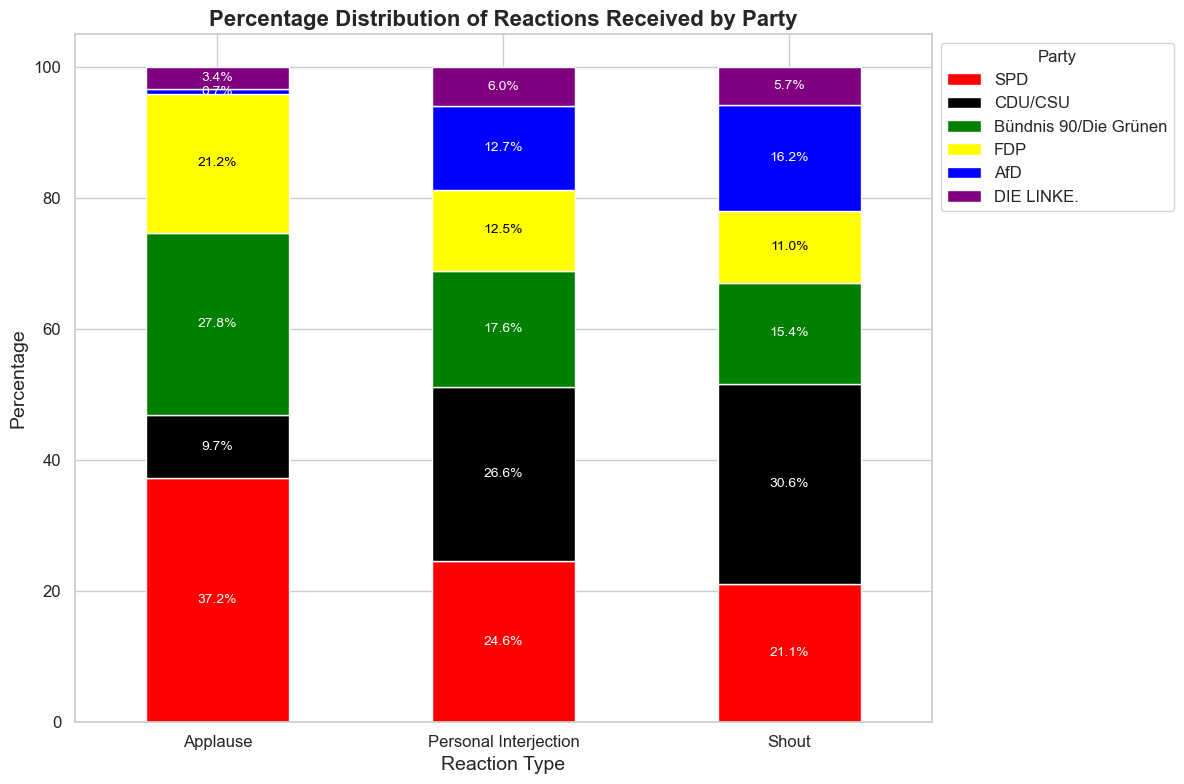

In [314]:

# Filter for the desired reaction types
desired_reactions = ['Applause', 'Shout', 'Personal Interjection']
reaction_data_filtered = term_20_data[term_20_data['reaction_type'].isin(desired_reactions)]
reaction_data_filtered = reaction_data_filtered[(reaction_data_filtered['faction']!="")&(reaction_data_filtered['faction']!="Fraktionslos")]

# Group by reaction type and faction receiving the reaction
reaction_distribution = reaction_data_filtered.groupby(['reaction_type', 'faction']).size().reset_index(name='count')


# Pivot the data for plotting percentages
reaction_distribution_pivot = reaction_distribution.pivot(index='reaction_type', columns='faction', values='count').fillna(0)

# Reindex to enforce consistent faction order
faction_order = ['SPD','CDU/CSU', 'Bündnis 90/Die Grünen','FDP', 'AfD','DIE LINKE.']
reaction_distribution_pivot = reaction_distribution_pivot.reindex(columns=faction_order,fill_value=0)

# Normalize to percentages
reaction_distribution_percent = reaction_distribution_pivot.div(reaction_distribution_pivot.sum(axis=1), axis=0) * 100

# Define the color map
color_map = {
    'AfD': 'blue',
    'FDP': 'yellow',
    'CDU/CSU': 'black',
    'Bündnis 90/Die Grünen': 'green',
    'SPD': 'red',
    'DIE LINKE.': 'purple',
}

# Plot a stacked bar chart
ax = reaction_distribution_percent.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 8),
    color=[color_map[col] for col in reaction_distribution_percent.columns]
)

# Add percentages to the plot, ensuring they are placed in the middle of the stack
for i, (reaction_type, row) in enumerate(reaction_distribution_percent.iterrows()):
    cumulative = 0
    for faction in faction_order:
        percentage = row[faction]
        if percentage > 0:
            # Adjust text color based on the background color
            text_color = 'black' if color_map[faction] in ['yellow', 'white'] else 'white'
            ax.text(
                i, cumulative + percentage / 2,  # Middle of the segment
                f'{percentage:.1f}%',  # Format as percentage
                ha='center', va='center', fontsize=10, color=text_color
            )
            cumulative += percentage

# Customize the chart
plt.title('Percentage Distribution of Reactions Received by Party', fontsize=16, weight='bold')
plt.xlabel('Reaction Type', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Party', fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('reaction_received_distribution_percentage_stacked_bar_with_labels_centered.png', format='png', dpi=300)

# Show the chart
plt.show()



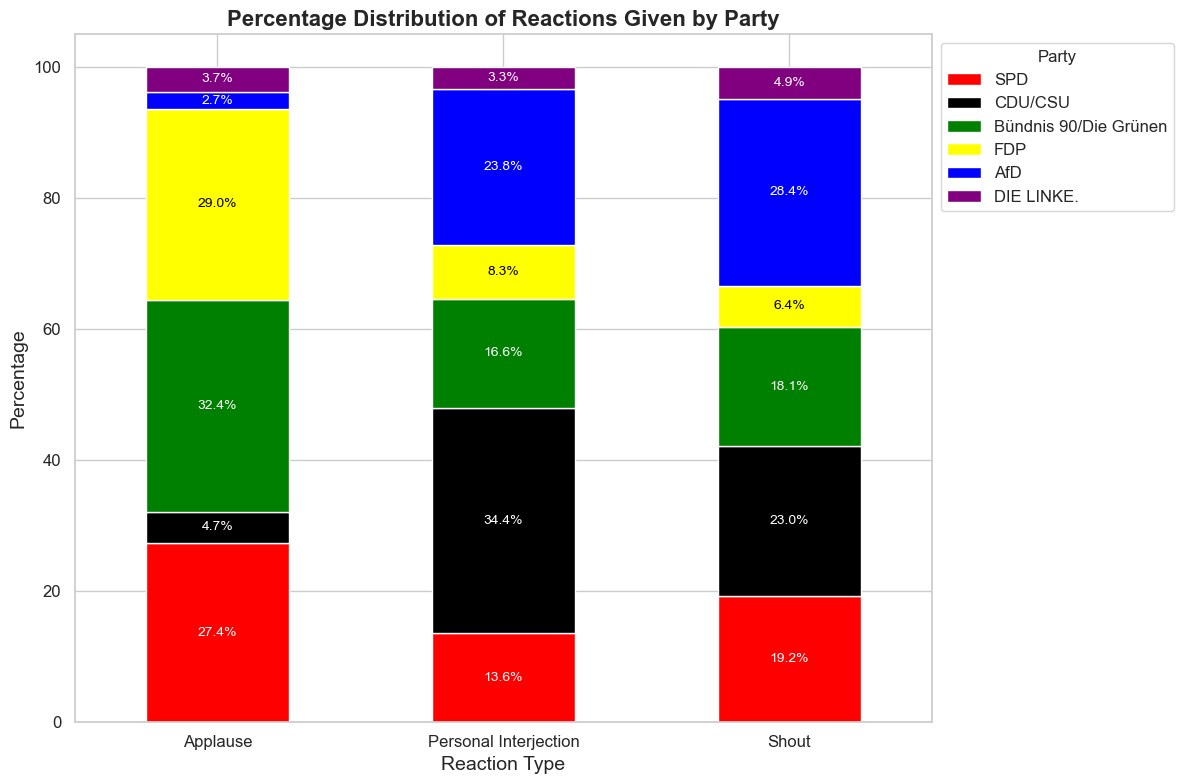

In [315]:
# Group by reaction type and faction giving the reaction
reaction_distribution_given = reaction_data_filtered.groupby(['reaction_type', 'reacting_faction']).size().reset_index(name='count')

# Pivot the data for plotting percentages
reaction_distribution_given_pivot = reaction_distribution_given.pivot(index='reaction_type', columns='reacting_faction', values='count').fillna(0)

# Reindex to enforce consistent faction order
reaction_distribution_given_pivot = reaction_distribution_given_pivot.reindex(columns=faction_order, fill_value=0)

# Normalize to percentages
reaction_distribution_given_percent = reaction_distribution_given_pivot.div(reaction_distribution_given_pivot.sum(axis=1), axis=0) * 100

# Plot a stacked bar chart
ax = reaction_distribution_given_percent.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 8),
    color=[color_map[col] for col in reaction_distribution_given_percent.columns]
)

# Add percentages to the plot, ensuring they are placed in the middle of the stack
for i, (reaction_type, row) in enumerate(reaction_distribution_given_percent.iterrows()):
    cumulative = 0
    for faction in faction_order:
        percentage = row[faction]
        if percentage > 0:
            # Place text in the middle of each bar segment
            ax.text(
                i, cumulative + percentage / 2,  # Middle of the segment
                f'{percentage:.1f}%',  # Format as percentage
                ha='center', va='center', fontsize=10, color='black' if faction == 'FDP' else 'white'
            )
            cumulative += percentage

# Customize the chart
plt.title('Percentage Distribution of Reactions Given by Party', fontsize=16, weight='bold')
plt.xlabel('Reaction Type', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Party', fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('reaction_given_distribution_percentage_stacked_bar_labels_centered.png', format='png', dpi=300)

# Show the chart
plt.show()


#### 7.3.2 By reactions by governing/opposition

In [273]:
# Define governing parties for each electoral term
regierung_mapping = {
    17: ['CDU/CSU', 'FDP'],
    18: ['CDU/CSU', 'SPD'],
    19: ['CDU/CSU', 'SPD'],
    20: ['SPD', 'FDP', 'Bündnis 90/Die Grünen']
}

# Function to label factions as Governing or Opposition
def label_governing_opposition(row, faction_column, term_column, regierung_mapping):
    term = row[term_column]
    if term in regierung_mapping:
        if row[faction_column] in regierung_mapping[term]:
            return 'Governing'
        else:
            return 'Opposition'
    return np.nan

# Apply labels to the factions in the dataset
content_subset_with_classification_contribution_extended['reacting_group'] = content_subset_with_classification_contribution_extended.apply(
    lambda row: label_governing_opposition(row, 'reacting_faction', 'electoral_term', regierung_mapping), axis=1
)
content_subset_with_classification_contribution_extended['reacted_to_group'] = content_subset_with_classification_contribution_extended.apply(
    lambda row: label_governing_opposition(row, 'faction', 'electoral_term', regierung_mapping), axis=1
)

# Filter the dataset for non-missing groups
content_subset_with_classification_contribution_extended = content_subset_with_classification_contribution_extended.dropna(
    subset=['reacting_group', 'reacted_to_group']
)

# Generate reaction matrices grouped by Governing vs. Opposition
reaction_matrices_gov_opp = {}

# Loop over each reaction type
for reaction in reaction_types:
    # Filter for the specific reaction type
    reaction_data = content_subset_with_classification_contribution_extended[
        content_subset_with_classification_contribution_extended['reaction_type'] == reaction
    ]

    # Create a pivot table counting reactions between Governing and Opposition
    reaction_matrix = reaction_data.pivot_table(
        index='reacted_to_group',  # Group being reacted to
        columns='reacting_group',  # Group reacting
        values='reaction_type',
        aggfunc='size',
        fill_value=0
    )

    # Store the matrix in the dictionary with the reaction type as the key
    reaction_matrices_gov_opp[reaction] = reaction_matrix

# Display the Governing vs. Opposition matrices
for reaction, matrix in reaction_matrices_gov_opp.items():
    print(f"Reaction Type: {reaction}")
    display(matrix)  # Display the matrix



Reaction Type: nan


Empty DataFrame
Columns: []
Index: []

Reaction Type: Applause


reacting_group    Governing  Opposition
reacted_to_group                       
Governing            255489       78960
Opposition            72588      162196

Reaction Type: Personal Interjection


reacting_group    Governing  Opposition
reacted_to_group                       
Governing             26322       91994
Opposition            56025       56269

Reaction Type: Shout


reacting_group    Governing  Opposition
reacted_to_group                       
Governing              3650       16631
Opposition            12667       10009

Reaction Type: Laughter


reacting_group    Governing  Opposition
reacted_to_group                       
Governing               470        3406
Opposition             2781        2593

Reaction Type: Contradiction


reacting_group    Governing  Opposition
reacted_to_group                       
Governing               400        1398
Opposition             1610        1091

Reaction Type: Cheerfulness


reacting_group    Governing  Opposition
reacted_to_group                       
Governing              2422        1157
Opposition             1116        1540

No data available for reaction type: nan


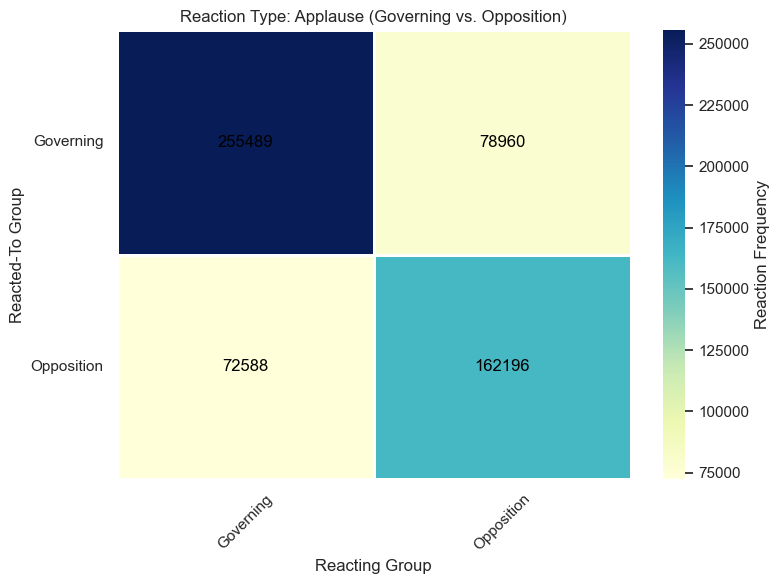

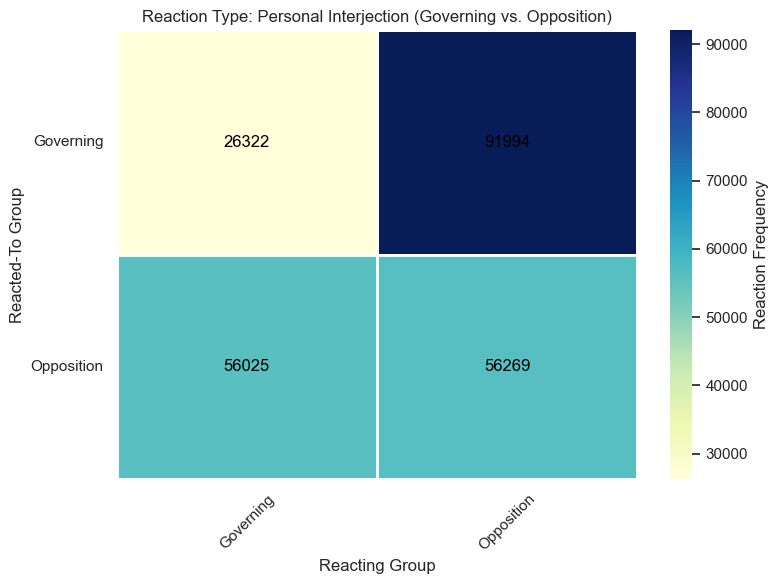

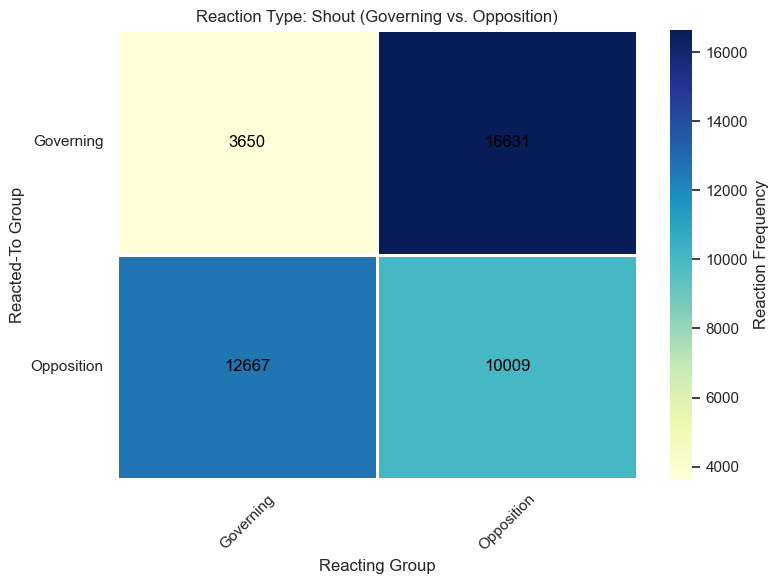

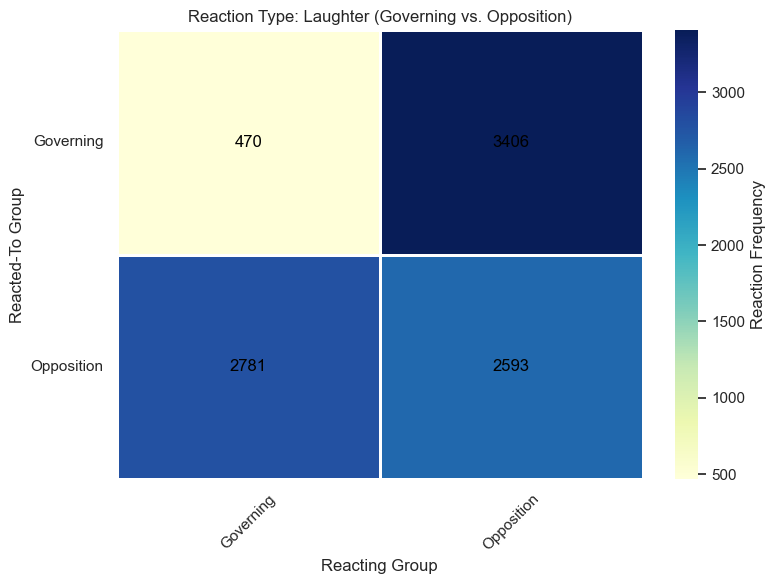

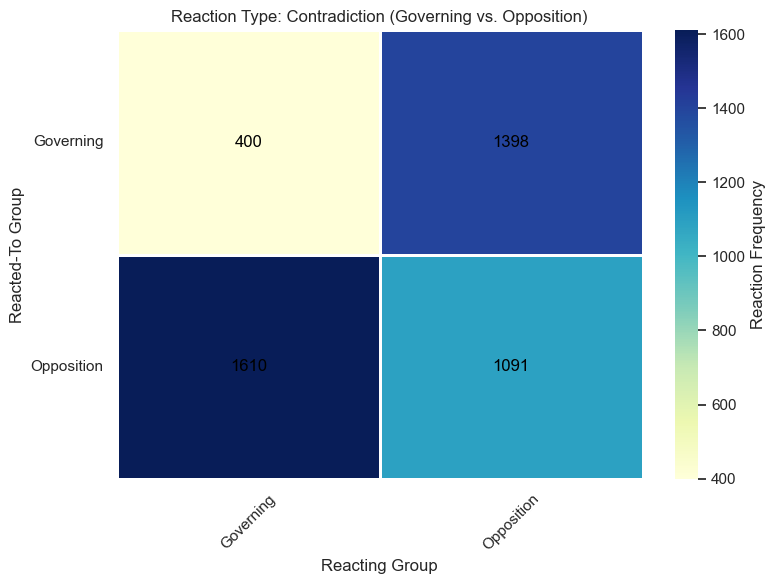

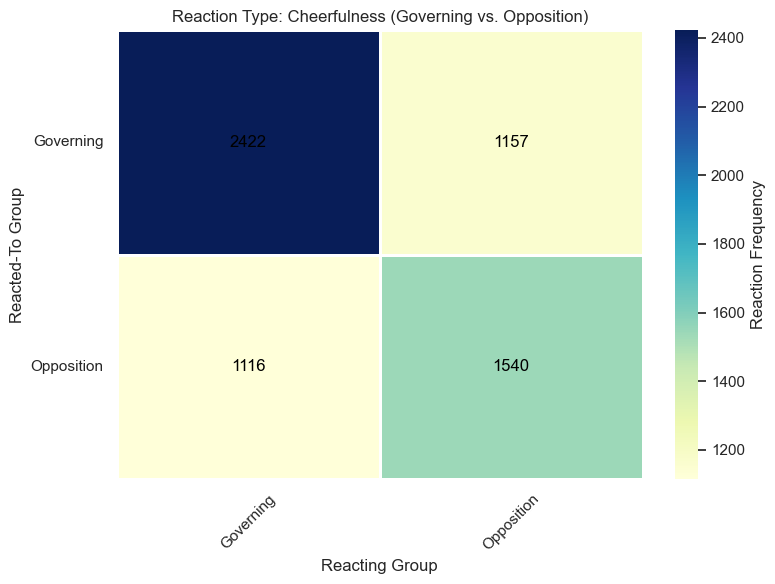

In [274]:
# Set up the plotting style for clarity
sns.set(style="whitegrid")

# Loop through each reaction matrix and plot it as a heatmap
for reaction, matrix in reaction_matrices_gov_opp.items():
    # Check if the matrix is non-empty before plotting
    if not matrix.empty:
        plt.figure(figsize=(8, 6))
        sns.heatmap(
            matrix, 
            annot=True, 
            cmap="YlGnBu", 
            fmt="d", 
            linewidths=1,       # Adjusts the thickness of the box around cells
            linecolor='white',  # Sets box color around each cell
            cbar_kws={'label': 'Reaction Frequency'}, 
            annot_kws={"color": "black"}  # Set annotation color for non-zero values
        )
        plt.title(f"Reaction Type: {reaction} (Governing vs. Opposition)")
        plt.xlabel("Reacting Group")
        plt.ylabel("Reacted-To Group")
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
    else:
        print(f"No data available for reaction type: {reaction}")


### 7.4 Development of Reaction Types

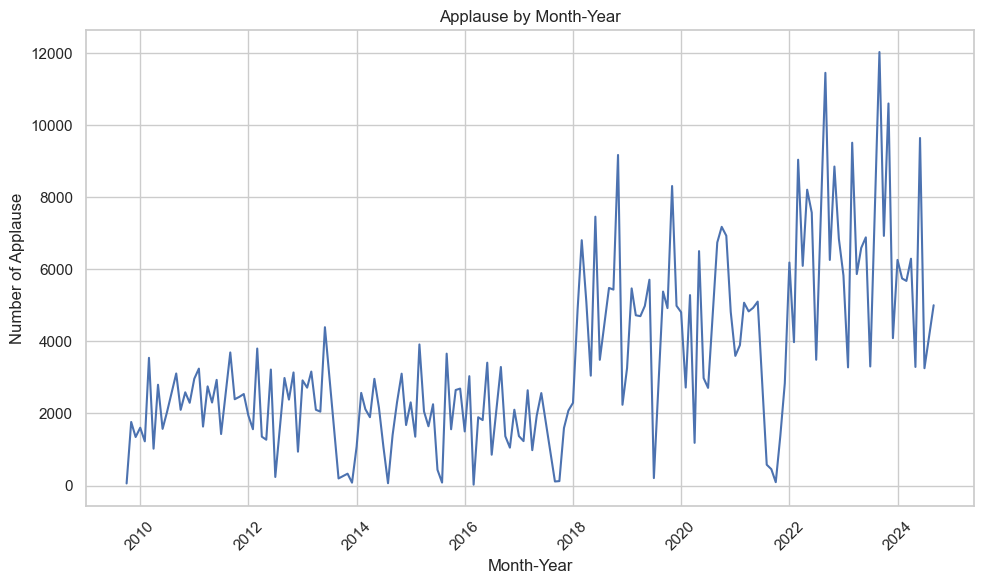

In [275]:
# Ensure 'month_year' is in period format
content_subset_with_classification_contribution_extended['month_year'] = content_subset_with_classification_contribution_extended['date'].dt.to_period('M')

# Filter for 'Applause' reactions and group by 'month_year', counting only the 'reaction_type' occurrences
applause_by_month = content_subset_with_classification_contribution_extended[content_subset_with_classification_contribution_extended['reaction_type'] == 'Applause'].groupby('month_year')['reaction_type'].count().reset_index()

# Convert 'month_year' to timestamp for plotting
applause_by_month['month_year'] = applause_by_month['month_year'].dt.to_timestamp()

# Plotting the 'Applause' counts over time
plt.figure(figsize=(10, 6))
plt.plot(applause_by_month['month_year'], applause_by_month['reaction_type'], label='Applause Count')
plt.title('Applause by Month-Year')
plt.xlabel('Month-Year')
plt.ylabel('Number of Applause')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


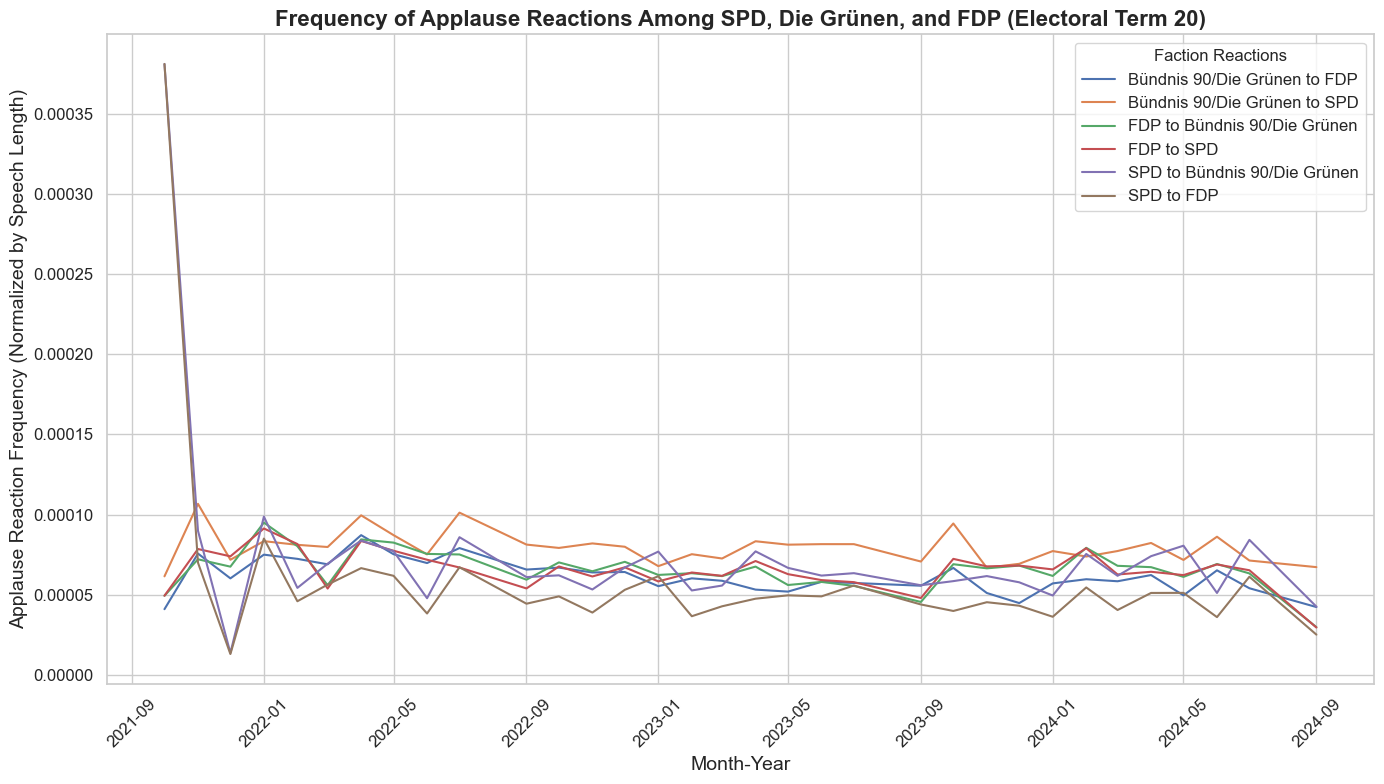

In [313]:
term_20_reaction_data = content_subset_with_classification_contribution_extended[content_subset_with_classification_contribution_extended['electoral_term'] == 20]

# Filter data for term 20 and reaction type "Applause"
applause_data = term_20_data[term_20_data['reaction_type'] == 'Applause']

# List of factions to analyze
factions_of_interest = ['SPD', 'Bündnis 90/Die Grünen', 'FDP']

# Filter data for the factions of interest
applause_data_filtered = applause_data[
    (applause_data['faction'].isin(factions_of_interest)) &
    (applause_data['reacting_faction'].isin(factions_of_interest))
]

# Calculate total speech length per month-year and faction
speech_length_by_month = (
    term_20_data.groupby(['month_year', 'faction'])['speech_length']
    .sum()
    .reset_index()
    .rename(columns={'speech_length': 'total_speech_length'})
)


# Group data by month, faction (reacting), and reacting faction
applause_counts = applause_data_filtered.groupby(
    ['month_year', 'faction', 'reacting_faction']
).size().reset_index(name='reaction_count')

applause_counts['month_year'] = applause_counts['month_year'].dt.to_timestamp()
speech_length_by_month['month_year'] = speech_length_by_month['month_year'].dt.to_timestamp()


# Merge applause counts with total speech length to normalize
applause_with_speech_length = applause_counts.merge(
    speech_length_by_month, 
    on=['month_year', 'faction'], 
    how='left'
)

# Calculate the reaction frequency
applause_with_speech_length['reaction_frequency'] = (
    applause_with_speech_length['reaction_count'] / applause_with_speech_length['total_speech_length']
)


# Pivot data for plotting
pivoted_data = applause_with_speech_length.pivot_table(
    index='month_year',
    columns=['faction', 'reacting_faction'],
    values='reaction_frequency',
    fill_value=0
)

# Prepare data for line plots (flatten the multi-index columns)
pivoted_data.columns = [' to '.join(col) for col in pivoted_data.columns]
pivoted_data.reset_index(inplace=True)

# Plotting the line chart
plt.figure(figsize=(14, 8))
for column in pivoted_data.columns[1:]:  # Skip 'month_year'
    sns.lineplot(data=pivoted_data, x='month_year', y=column, label=column)

# Customize the chart
plt.title('Frequency of Applause Reactions Among SPD, Die Grünen, and FDP (Electoral Term 20)', fontsize=16, weight='bold')
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Applause Reaction Frequency (Normalized by Speech Length)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Faction Reactions', fontsize=12)
plt.tight_layout()

# save the plot as a PNG file
plt.savefig('frequency_of_applause_reactions_line_chart.png', format='png', dpi=300)

# Show the chart
plt.show()



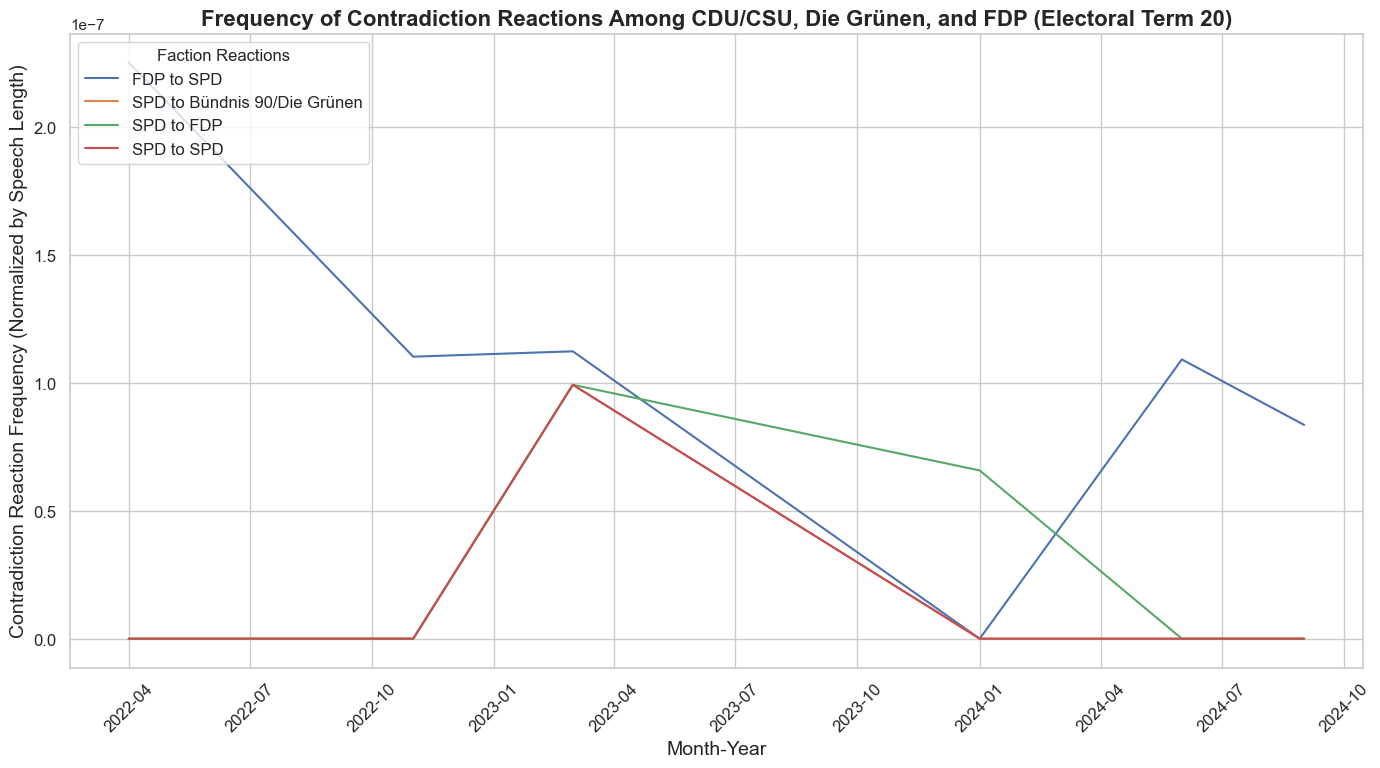

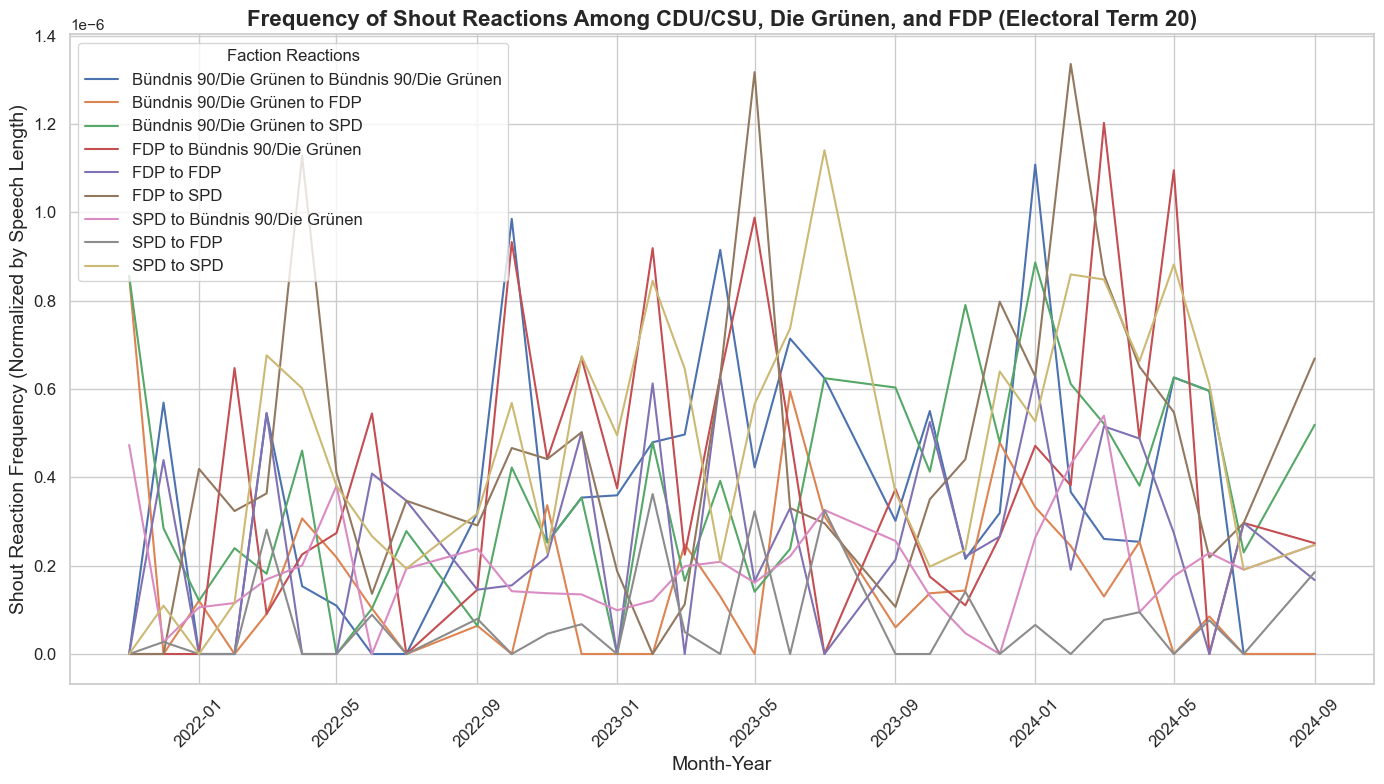

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


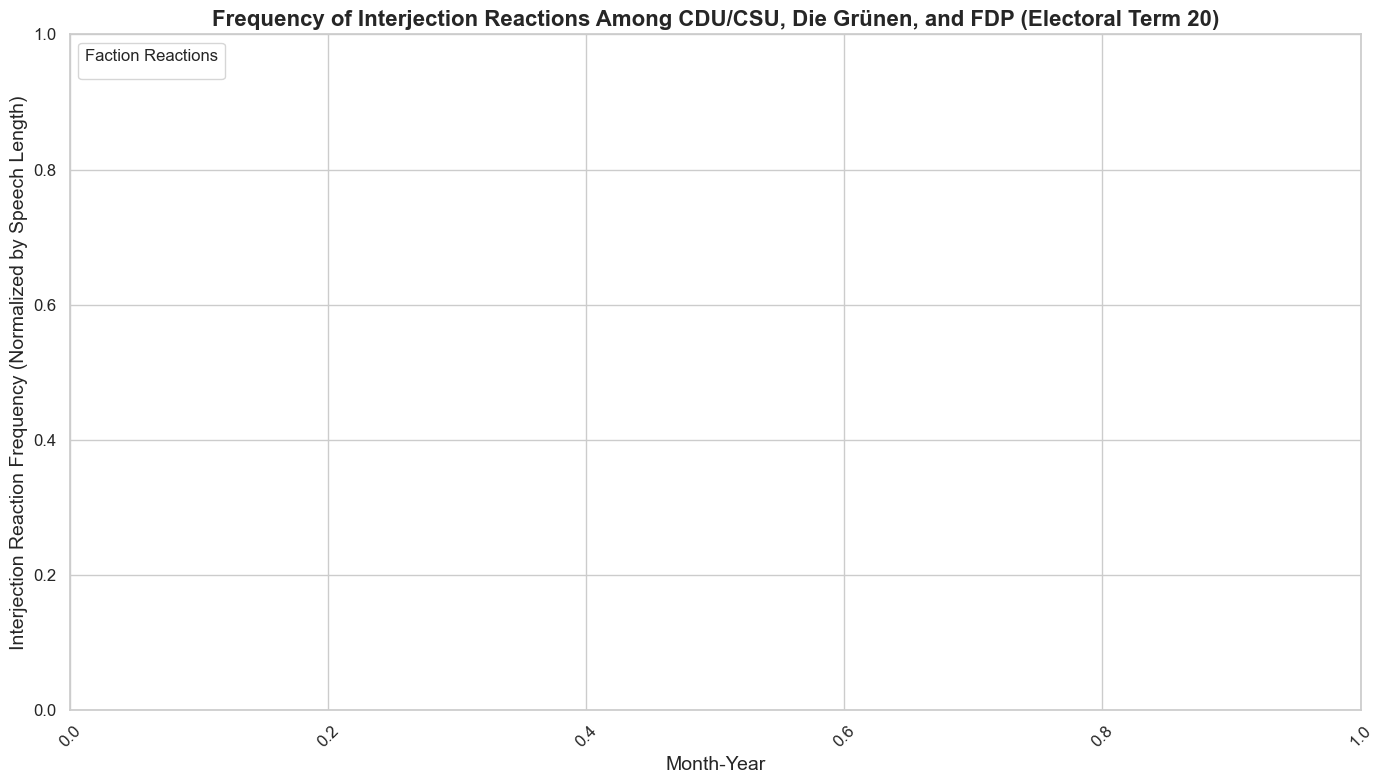

In [277]:
# List of reaction types to analyze
reaction_types_to_analyze = ['Contradiction', 'Shout', 'Interjection']

# Initialize an empty dictionary to store data for each reaction type
reaction_data_dict = {}

# Loop through each reaction type
for reaction_type in reaction_types_to_analyze:
    # Filter data for the current reaction type
    reaction_data = term_20_data[term_20_data['reaction_type'] == reaction_type]
    
    # Filter data for factions of interest
    reaction_data_filtered = reaction_data[
        (reaction_data['faction'].isin(factions_of_interest)) &
        (reaction_data['reacting_faction'].isin(factions_of_interest))
    ]
    

    # Group data by month, faction (reacting), and reacting faction
    reaction_counts = reaction_data_filtered.groupby(
        ['month_year', 'faction', 'reacting_faction']
    ).size().reset_index(name='reaction_count')
    
    reaction_counts['month_year'] = reaction_counts['month_year'].dt.to_timestamp()
    reaction_data_filtered['month_year'] = reaction_data_filtered['month_year'].dt.to_timestamp()
    # Merge reaction counts with total speech length to normalize
    reaction_with_speech_length = reaction_counts.merge(
        speech_length_by_month,
        on=['month_year', 'faction'],
        how='left'
    )
    
    # Calculate the reaction frequency
    reaction_with_speech_length['reaction_frequency'] = (
        reaction_with_speech_length['reaction_count'] / reaction_with_speech_length['total_speech_length']
    )
    
    # Pivot data for plotting
    pivoted_data = reaction_with_speech_length.pivot_table(
        index='month_year',
        columns=['faction', 'reacting_faction'],
        values='reaction_frequency',
        fill_value=0
    )
    
    # Flatten the multi-index columns for easy plotting
    pivoted_data.columns = [' to '.join(col) for col in pivoted_data.columns]
    pivoted_data.reset_index(inplace=True)
    
    # Store the pivoted data for this reaction type
    reaction_data_dict[reaction_type] = pivoted_data

# Plotting each reaction type
for reaction_type, pivoted_data in reaction_data_dict.items():
    plt.figure(figsize=(14, 8))
    
    # Plot each column in the pivoted data
    for column in pivoted_data.columns[1:]:  # Skip 'month_year'
        sns.lineplot(data=pivoted_data, x='month_year', y=column, label=column)
    
    # Customize the chart
    plt.title(f'Frequency of {reaction_type} Reactions Among CDU/CSU, Die Grünen, and FDP (Electoral Term 20)', fontsize=16, weight='bold')
    plt.xlabel('Month-Year', fontsize=14)
    plt.ylabel(f'{reaction_type} Reaction Frequency (Normalized by Speech Length)', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title='Faction Reactions', fontsize=12, loc='upper left')
    plt.tight_layout()
    
    # Show the chart
    plt.show()


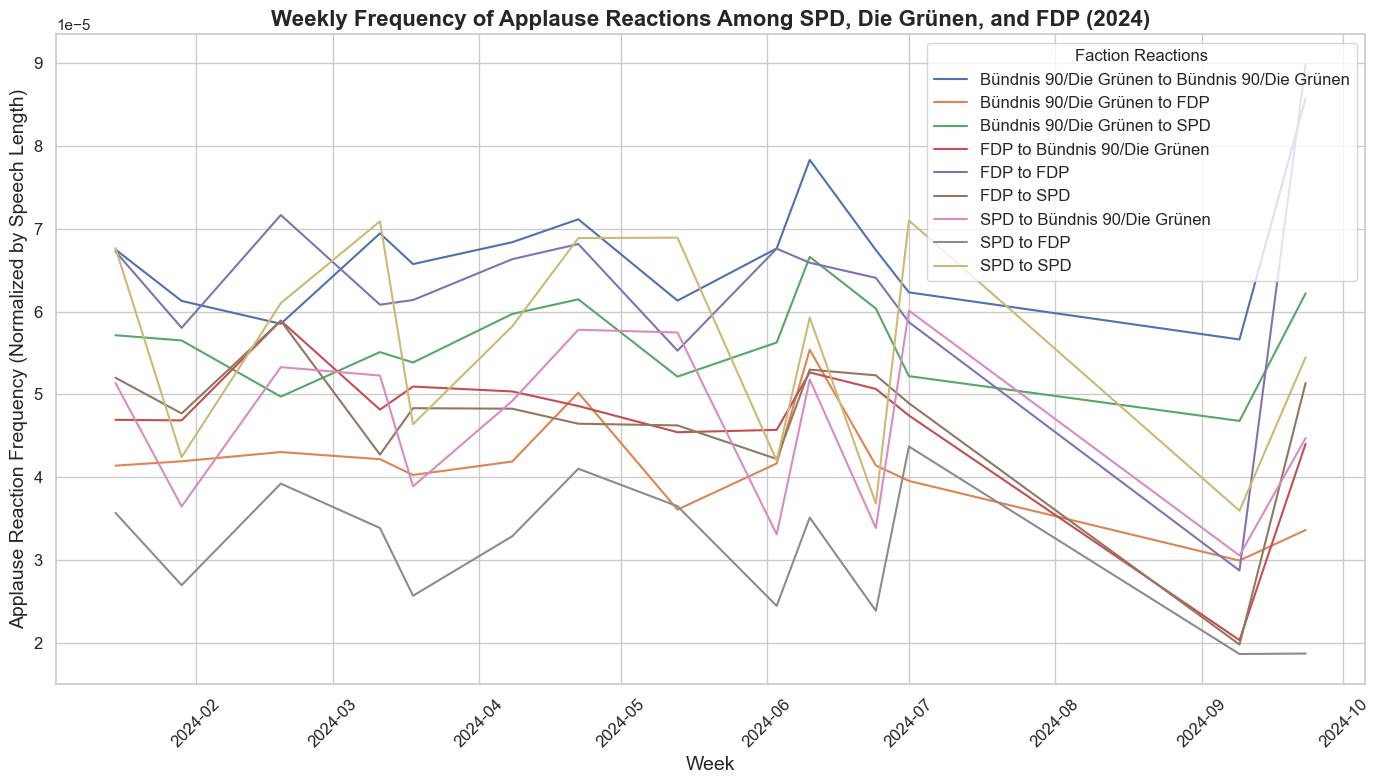

In [278]:
# Filter data for term 20, reaction type "Applause", and year 2024
applause_data = term_20_data[
    (term_20_data['reaction_type'] == 'Applause') &
    (term_20_data['date'].dt.year == 2024)
]

# List of factions to analyze
factions_of_interest = ['SPD', 'Bündnis 90/Die Grünen', 'FDP']

# Filter data for the factions of interest
applause_data_filtered = applause_data[
    (applause_data['faction'].isin(factions_of_interest)) &
    (applause_data['reacting_faction'].isin(factions_of_interest))
]

# Add a 'week' column for aggregation
applause_data_filtered['week'] = applause_data_filtered['date'].dt.to_period('W-SUN').dt.to_timestamp()
term_20_data['week'] = term_20_data['date'].dt.to_period('W-SUN').dt.to_timestamp()

# Calculate total speech length per week and faction
speech_length_by_week = (
    term_20_data[
        term_20_data['date'].dt.year == 2024  # Filter for year 2024
    ].groupby(['week', 'faction'])['speech_length']
    .sum()
    .reset_index()
    .rename(columns={'speech_length': 'total_speech_length'})
)

# Group data by week, faction (reacting), and reacting faction
applause_counts = applause_data_filtered.groupby(
    ['week', 'faction', 'reacting_faction']
).size().reset_index(name='reaction_count')

# Merge applause counts with total speech length to normalize
applause_with_speech_length = applause_counts.merge(
    speech_length_by_week, 
    on=['week', 'faction'], 
    how='left'
)

# Calculate the reaction frequency
applause_with_speech_length['reaction_frequency'] = (
    applause_with_speech_length['reaction_count'] / applause_with_speech_length['total_speech_length']
)

# Pivot data for plotting
pivoted_data = applause_with_speech_length.pivot_table(
    index='week',
    columns=['faction', 'reacting_faction'],
    values='reaction_frequency',
    fill_value=0
)

# Prepare data for line plots (flatten the multi-index columns)
pivoted_data.columns = [' to '.join(col) for col in pivoted_data.columns]
pivoted_data.reset_index(inplace=True)

# Plotting the line chart
plt.figure(figsize=(14, 8))
for column in pivoted_data.columns[1:]:  # Skip 'week'
    sns.lineplot(data=pivoted_data, x='week', y=column, label=column)

# Customize the chart
plt.title('Weekly Frequency of Applause Reactions Among SPD, Die Grünen, and FDP (2024)', fontsize=16, weight='bold')
plt.xlabel('Week', fontsize=14)
plt.ylabel('Applause Reaction Frequency (Normalized by Speech Length)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Faction Reactions', fontsize=12)
plt.tight_layout()

# Show the chart
plt.show()


#### 7.4.2 Reaction Types received per party

Processing reaction type: nan


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


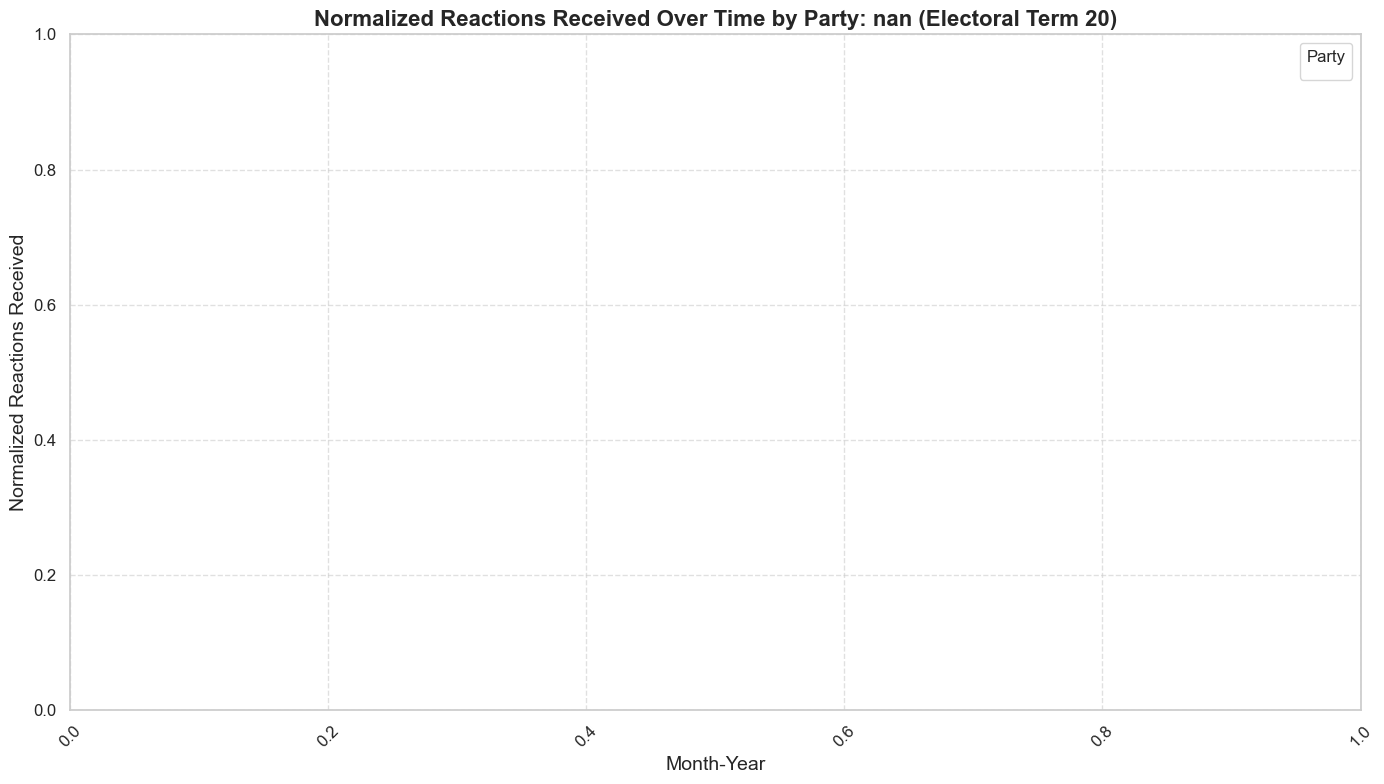

Processing reaction type: Applause


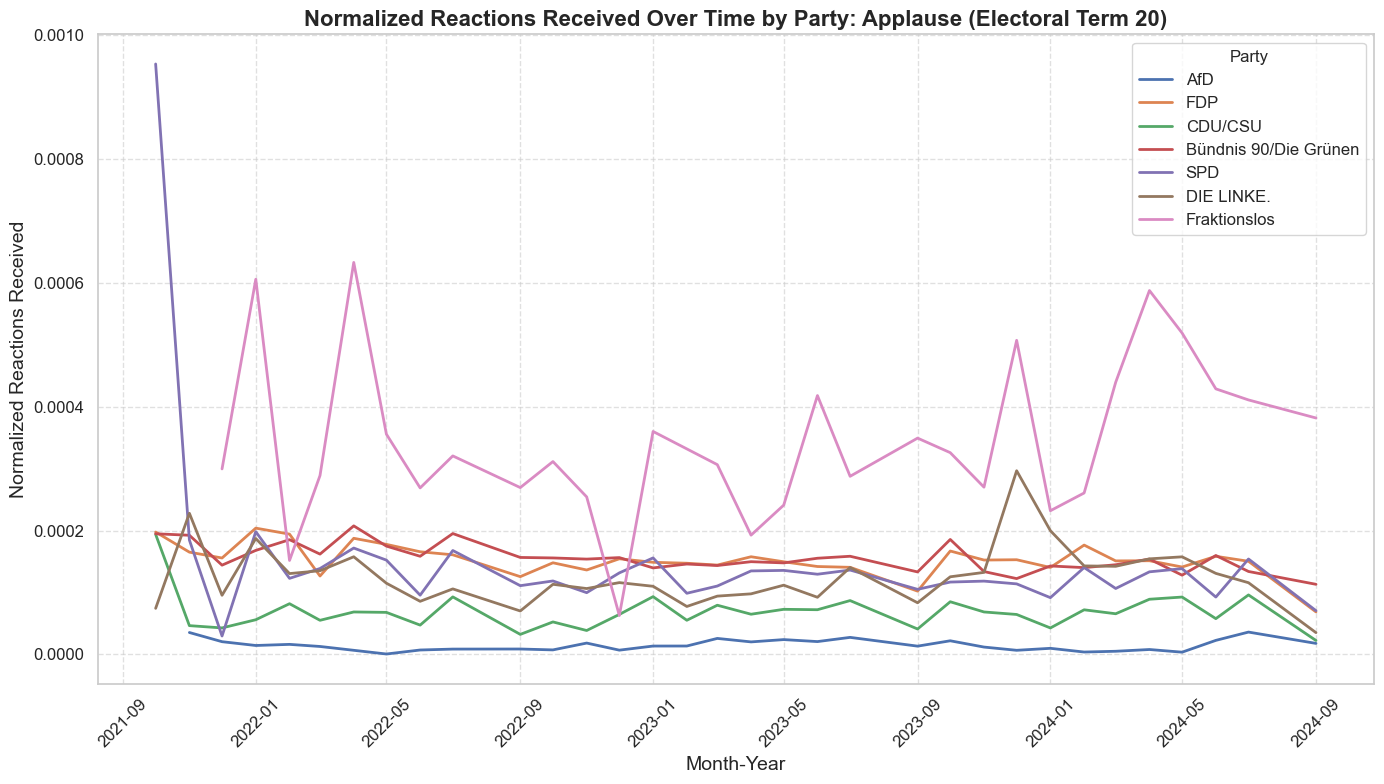

Processing reaction type: Personal Interjection


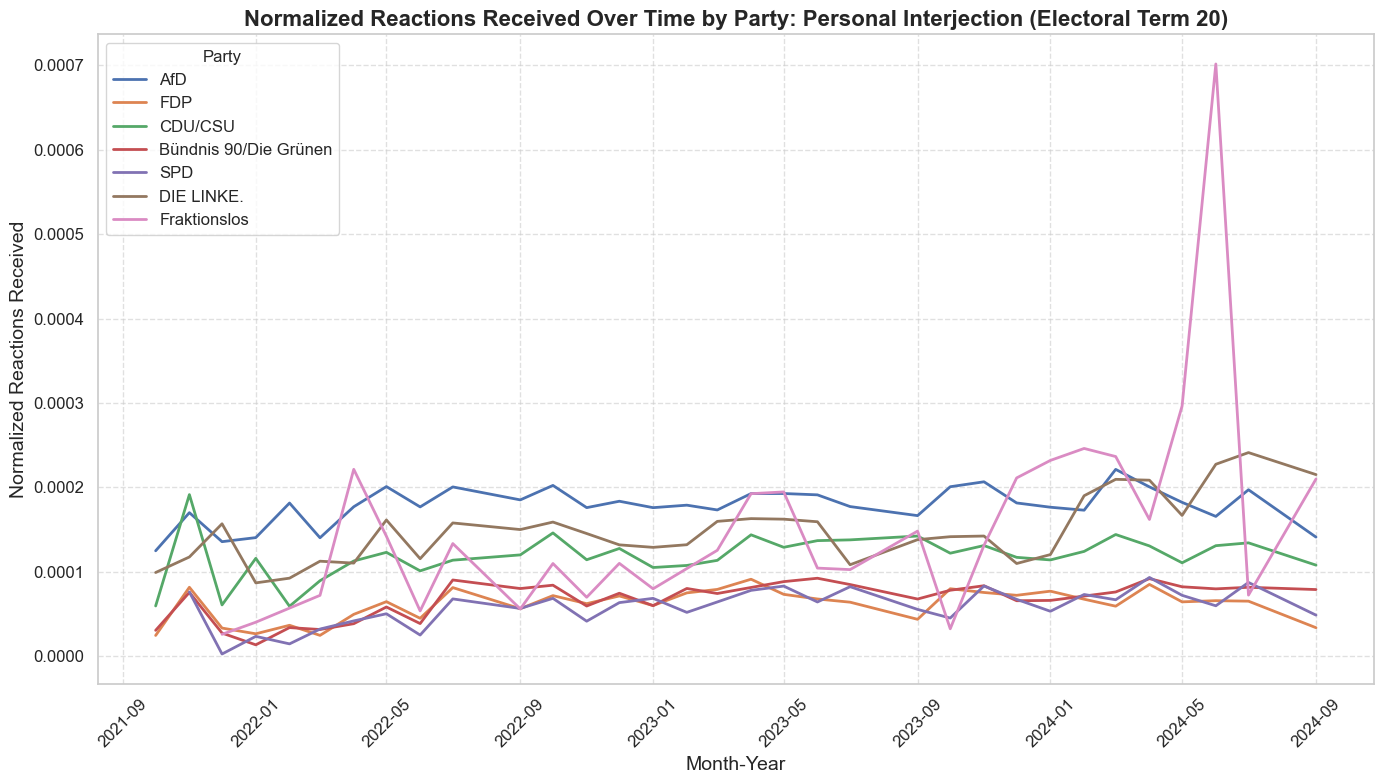

Processing reaction type: Shout


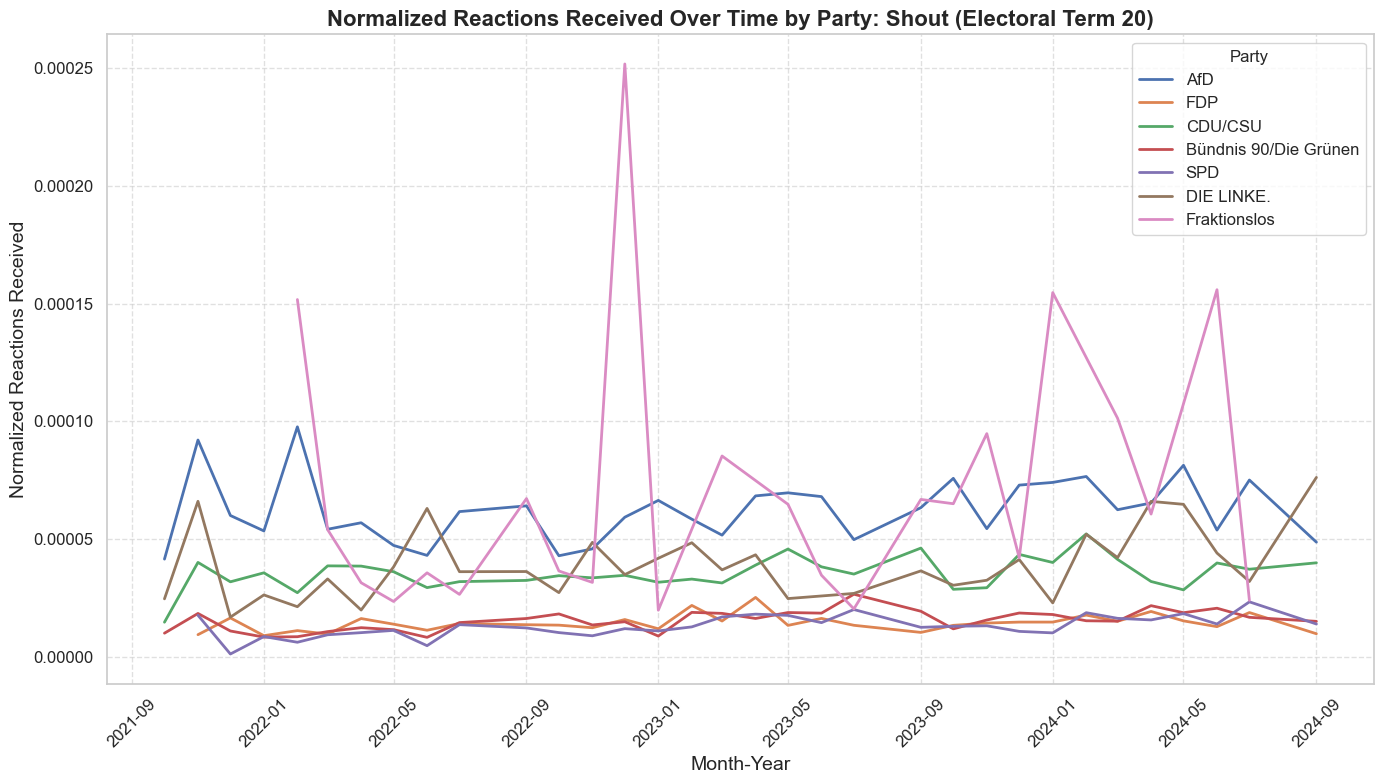

Processing reaction type: Laughter


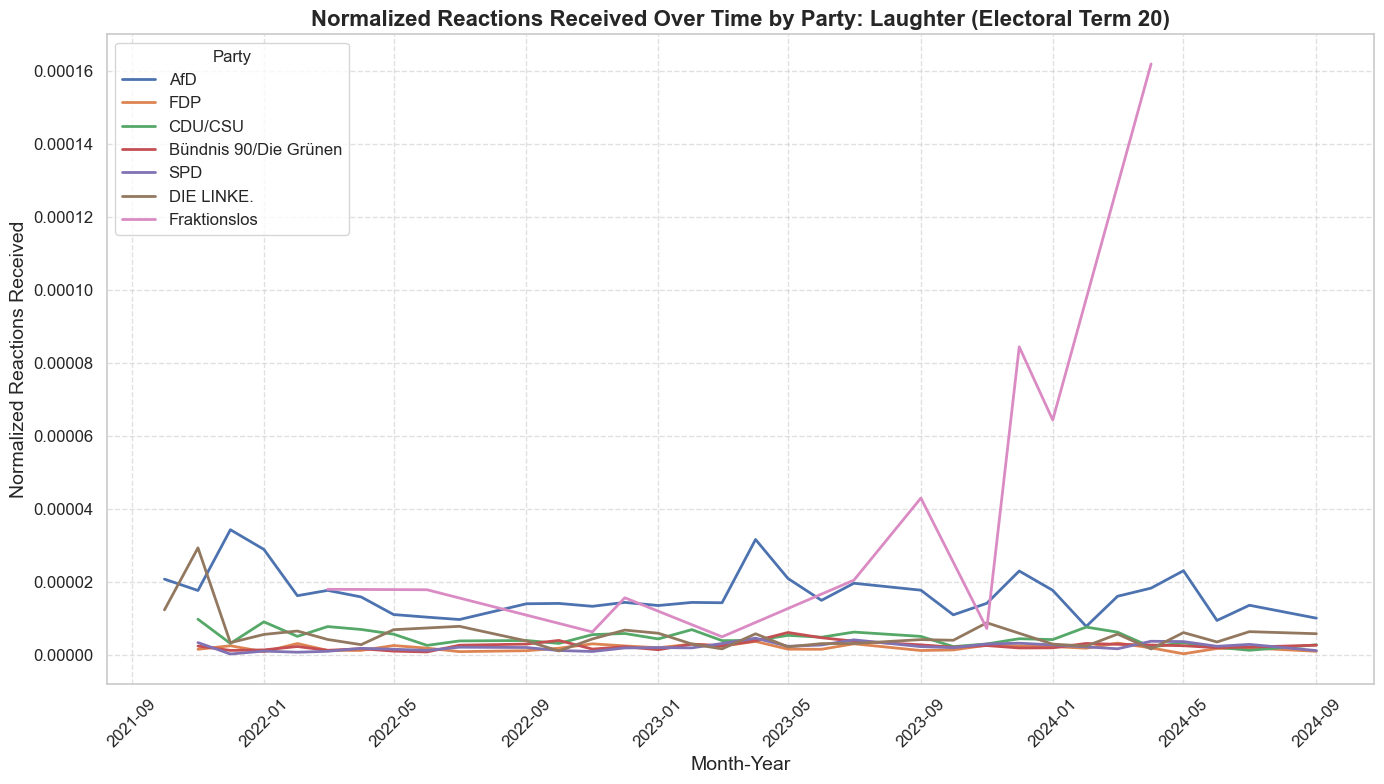

Processing reaction type: Contradiction


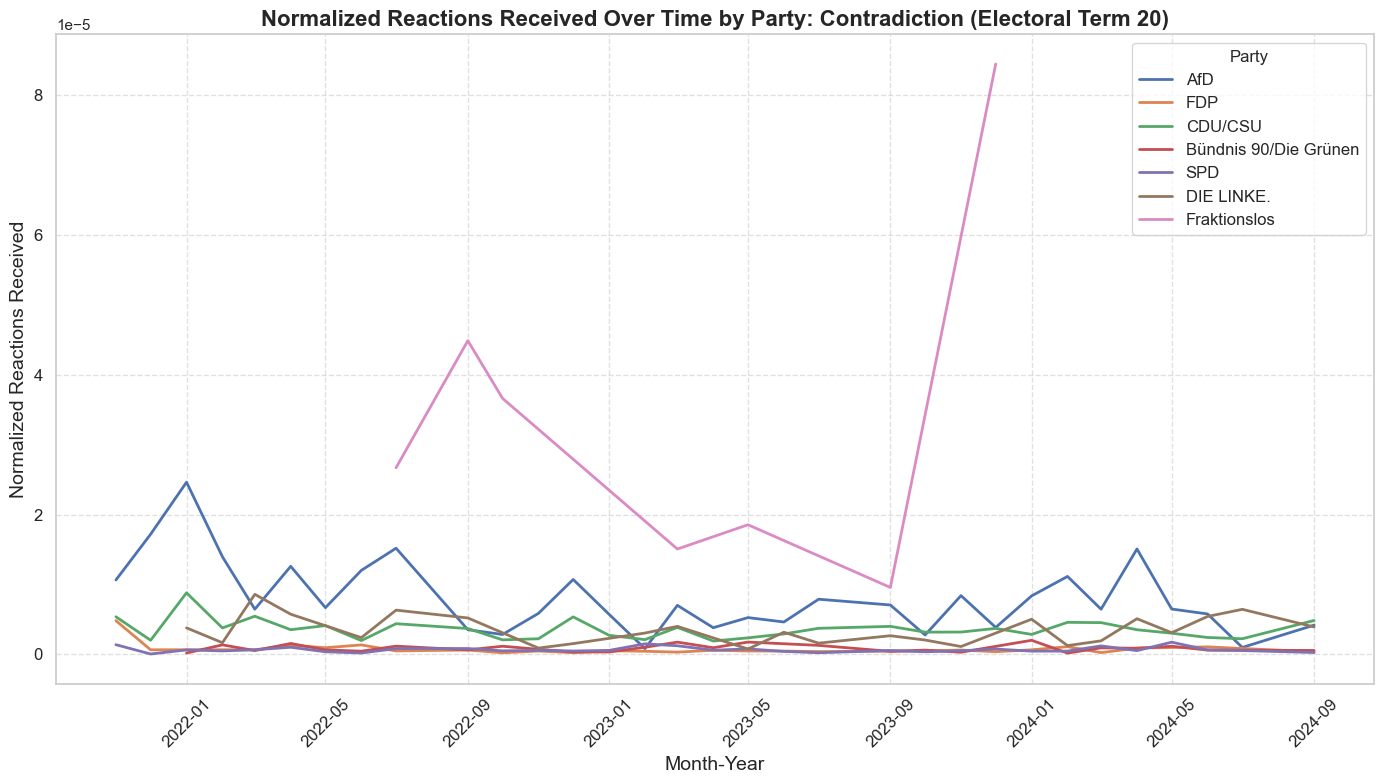

Processing reaction type: Cheerfulness


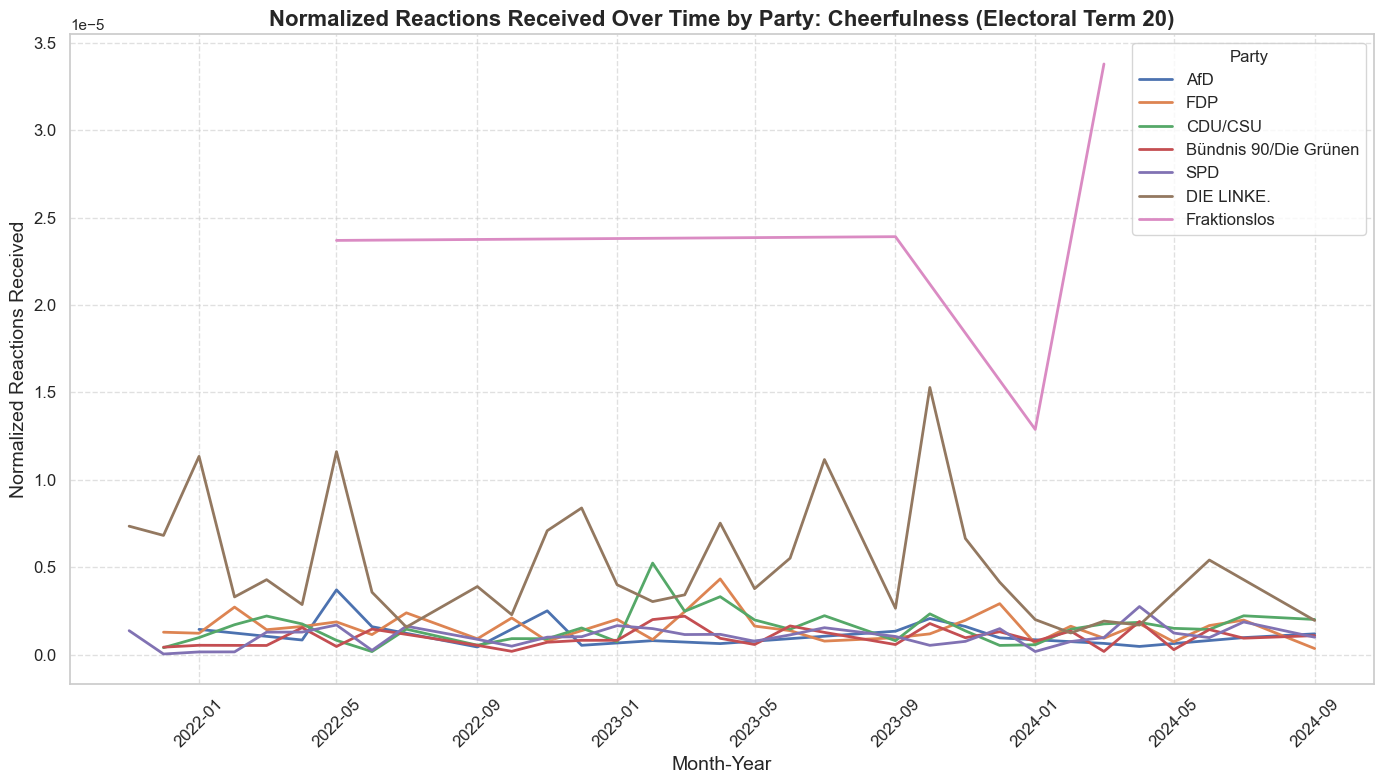

In [298]:

# Apply seaborn style
sns.set_theme(style="whitegrid")

# Define the faction order for sorting
faction_order = ['AfD', 'FDP', 'CDU/CSU', 'Bündnis 90/Die Grünen', 'SPD', 'DIE LINKE.', 'Fraktionslos']

# Filter for electoral term 20
term_20_data = content_subset_with_classification_contribution_extended[
    content_subset_with_classification_contribution_extended['electoral_term'] == 20
]

# Exclude reactions within the same faction
term_20_data = term_20_data[term_20_data['reacting_faction'] != term_20_data['faction']]

# Group speech length data by month_year and faction for normalization
speech_length_by_month = term_20_data.groupby(['month_year', 'faction'])['speech_length'].sum().reset_index()

# Get unique reaction types
reaction_types = term_20_data['reaction_type'].unique()

# Loop through each reaction type to create normalized charts
for reaction in reaction_types:
    print(f"Processing reaction type: {reaction}")
    
    # Filter data for the specific reaction type
    reaction_data = term_20_data[term_20_data['reaction_type'] == reaction]
    
    # Group data by Month-Year and Faction to calculate reactions received
    reactions_over_time = reaction_data.groupby(['month_year', 'faction']).size().reset_index(name='Reactions Received')
    
    # Merge with speech length for normalization
    reactions_over_time = reactions_over_time.merge(
        speech_length_by_month, 
        on=['month_year', 'faction'], 
        how='left'
    )
    
    # Normalize reactions received by speech length
    reactions_over_time['Reactions Normalized'] = (
        reactions_over_time['Reactions Received'] / reactions_over_time['speech_length']
    ).fillna(0)  # Handle missing data by filling with 0
    
    reactions_over_time['month_year']=reactions_over_time['month_year'].dt.to_timestamp()
    # Pivot the data for plotting
    reactions_over_time_pivot = reactions_over_time.pivot(index='month_year', columns='faction', values='Reactions Normalized')
    reactions_over_time_pivot = reactions_over_time_pivot.reindex(columns=faction_order, fill_value=0)  # Enforce faction order
    reactions_over_time_pivot.index = pd.to_datetime(reactions_over_time_pivot.index)  # Ensure datetime format for plotting
    
    # Plot the development of normalized reactions received over time for this reaction type
    plt.figure(figsize=(14, 8))

    # Plot each party's normalized reactions received as a line
    for faction in faction_order:
        if faction in reactions_over_time_pivot.columns:
            sns.lineplot(
                x=reactions_over_time_pivot.index,
                y=reactions_over_time_pivot[faction],
                label=faction,
                linewidth=2
            )
    
    # Customize the plot
    plt.title(f'Normalized Reactions Received Over Time by Party: {reaction} (Electoral Term 20)', fontsize=16, weight='bold')
    plt.xlabel('Month-Year', fontsize=14)
    plt.ylabel('Normalized Reactions Received', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title='Party', fontsize=12)
    plt.grid(visible=True, linestyle='--', alpha=0.6)
    plt.tight_layout()

    # Save the plot as a PNG file
    plt.savefig(f'normalized_reactions_received_over_time_{reaction}.png', format='png', dpi=300)

    # Show the chart
    plt.show()
